### Libraries

In [1]:
install.packages("zoo")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’




In [3]:
install.packages("xts")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("DIMORA")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘minpack.lm’, ‘numDeriv’, ‘reshape2’, ‘deSolve’




In [5]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [6]:
install.packages("gam")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’




In [7]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
install.packages('urca')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
install.packages('fpp2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘expsmooth’, ‘fma’




In [10]:
install.packages("gbm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
library(readxl)
library(zoo)
library(tidyverse)
library(lubridate)
library(forecast)
library(xts)
library(DIMORA)
library(tidyr)
library(MASS)
library(splines)
library(gam)
library(car)
library(corrplot)
library(lmtest)
library(urca)
library(fpp2)
library(gbm)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks l

# Data preprocessing

## Olive oil Price

In [13]:
###read the data
data<- read_excel("prices_spain.xlsx")

Price <- data$Price
time<- 1:NROW(data)
week <- as.Date(data$Period)

df <- data.frame(week, Price)

Convert to monthly data

In [14]:
#create weekly ts using zoo
weekly_ts <- zoo(df$Price, order.by = week)

# Convert to xts
weekly_ts_xts <- as.xts(weekly_ts)

# Convert to daily frequency
daily_ts_xts <- merge(weekly_ts_xts, xts(,seq(start(weekly_ts_xts),end(weekly_ts_xts),"days")))
daily_ts_xts <- na.locf(daily_ts_xts)

# aggregate by month
monthly_ts_xts = aggregate(daily_ts_xts, as.yearmon, mean)

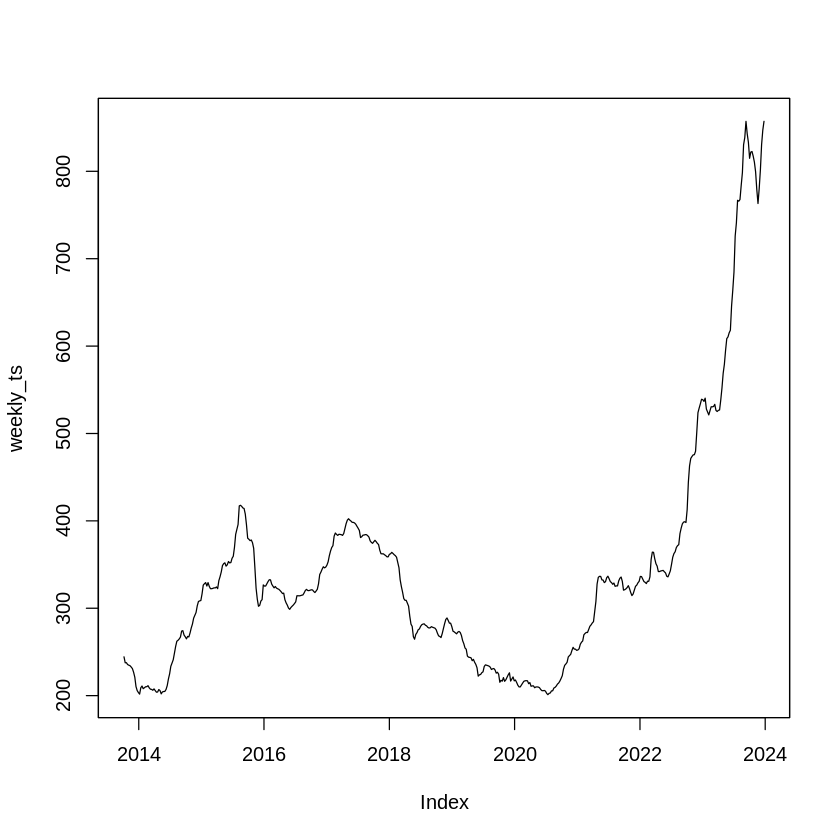

In [15]:
plot(weekly_ts)

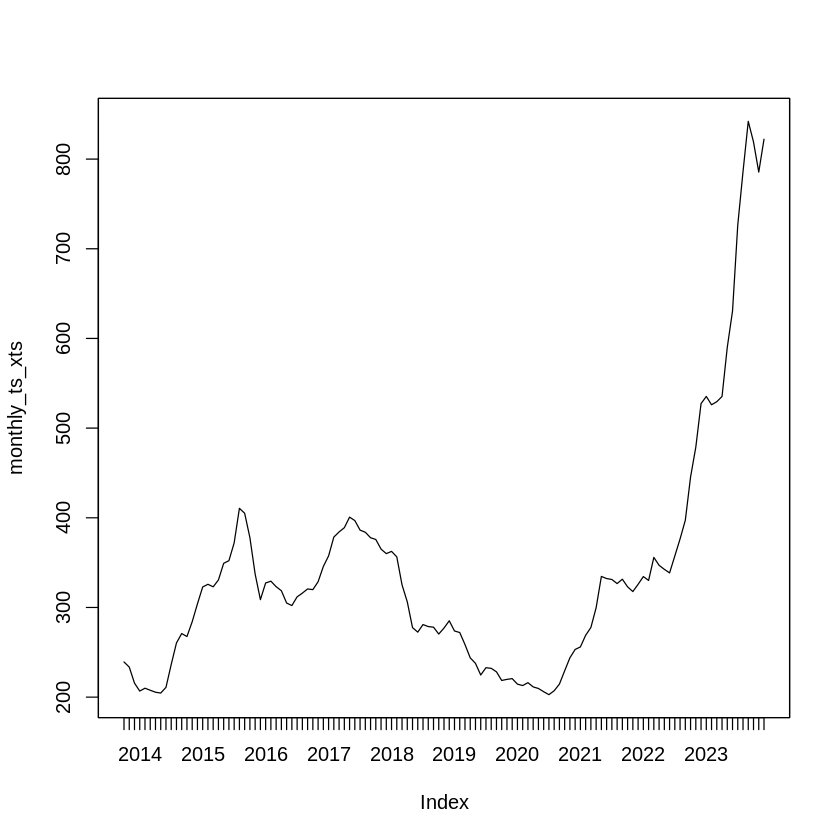

In [16]:
plot(monthly_ts_xts)

Transfrom xts to ts

In [17]:
monthly_ts <- as.ts(monthly_ts_xts, frequency = 12)

price_ts <- window(monthly_ts, start=c(2013,10), end=c(2023,09))
price <- as.numeric(price_ts)

In [18]:
price_ts

Jan      Feb      Mar      Apr      May      Jun      Jul      Aug     
2013                                                                        
2014 206.7748 209.9646 207.6734 205.4914 204.5412 210.9054 236.3946 260.4204
2015 322.8689 325.8221 323.0178 330.6593 349.2110 352.2080 372.0511 410.5674
2016 327.3158 329.3148 323.1769 318.6403 304.9472 302.1268 311.8450 316.0032
2017 357.5192 378.5029 384.2371 388.9276 400.7384 396.9032 386.2812 383.8599
2018 362.5448 356.4360 325.2282 306.2229 277.5177 272.4863 280.9422 278.6943
2019 273.7804 272.0430 258.6317 243.8068 237.6697 224.6821 232.8216 232.1251
2020 214.4880 212.9094 216.1258 211.4166 209.6566 206.0473 202.7522 207.1297
2021 255.9972 268.9425 277.6863 299.7367 334.6228 332.2314 331.2008 326.6415
2022 334.4418 330.1524 355.8378 347.0250 342.5226 338.5267 357.4315 376.4337
2023 535.3333 526.0208 529.4516 535.2778 590.1398 630.5917 726.5457 785.9839
     Sep      Oct      Nov      Dec     
2013          239.2256 233.5117 215.6319
2014 270.9074 267.5895 284.1029 304.0380
2015 405.0469 377.8158 337.2299 308.7229
2016 320.6419 319.8794 328.6993 345.7099
2017 377.7544 375.8137 365.0686 360.0296
2018 278.0146 270.3498 277.0479 285.1386
2019 228.2097 218.5912 219.8036 220.6543
2020 214.5151 229.3472 243.8786 253.1803
2021 331.5152 322.9737 317.7287 325.8022
2022 397.2017 445.4420 478.7389 527.3495
2023 842.1250

## Production quantity

In [19]:
###read the data
data_prod_year<- read_excel("prod_year_extended.xlsx")

prod <- data_prod_year$'Year Production Qty'
stock <- data_prod_year$'Ending stock Qty'
year <- data_prod_year$Year
month <- data_prod_year$Month

df_prod_year <- data.frame(year, month, prod, stock)

In [20]:
production_ts <- ts(df_prod_year$prod, start=c(2013,10), frequency=12)
stock_ts <- ts(df_prod_year$stock, start=c(2013,10), frequency=12)

production <- as.numeric(production_ts)
stock <- as.numeric(stock_ts)

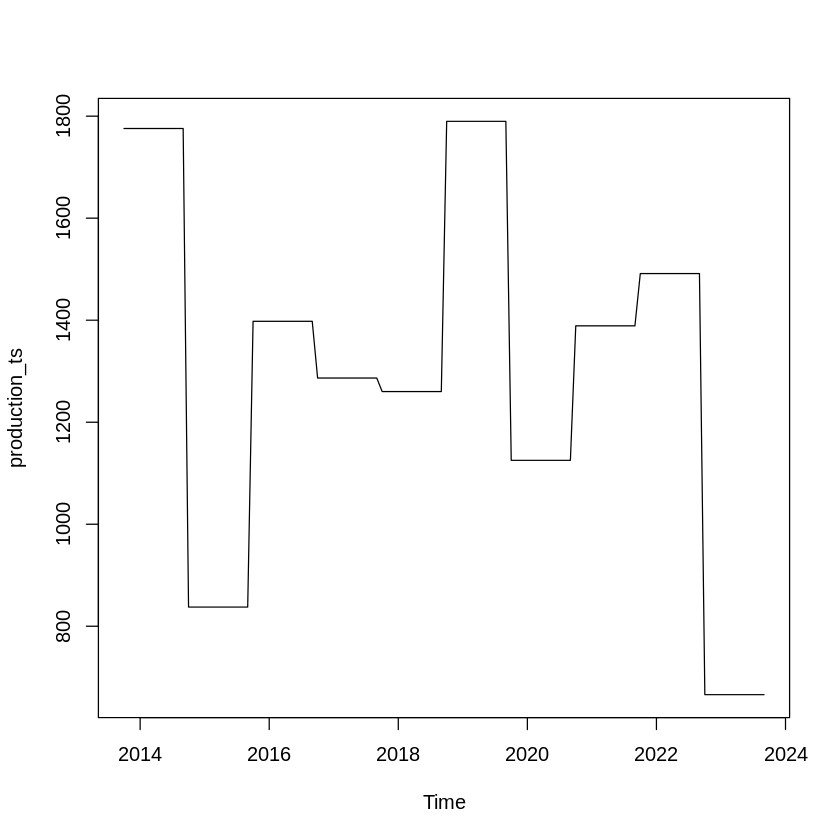

In [21]:
plot(production_ts)

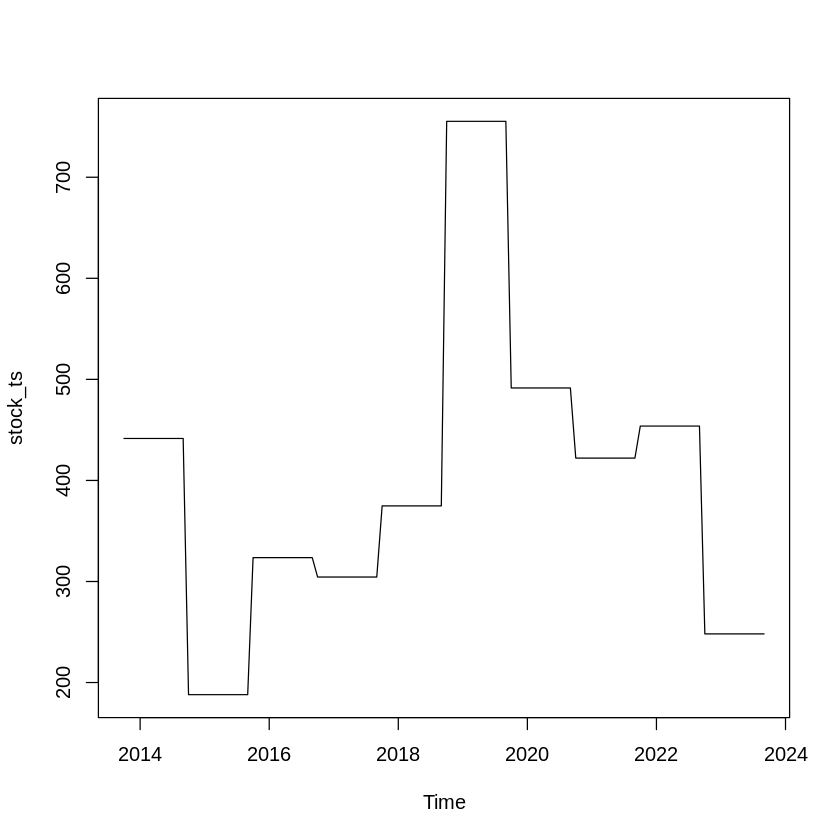

In [22]:
plot(stock_ts)

## Inflation rate

In [23]:
#read data
data <- read.csv("/content/Inflation_ES.csv")
data <- data[,-2]
colnames(data) <- c('Month','Value')
data$Month <- as.Date(data$Month, "%Y - %m - %d")

data <- data[data$Month >= as.Date("2013-09-01"), ]

In [24]:
year <- year(as.POSIXlt(data$Month, format="%Y/%m/%d"))
month <- month(as.POSIXlt(data$Month, format="%Y/%m/%d"))
value <-data$Value

df_inflation <- data.frame(year, month, value)

In [25]:
inflation_ts <- ts(df_inflation$value, start=c(2013,10), end=c(2023,09), frequency=12)
inflation <- as.numeric(inflation_ts)

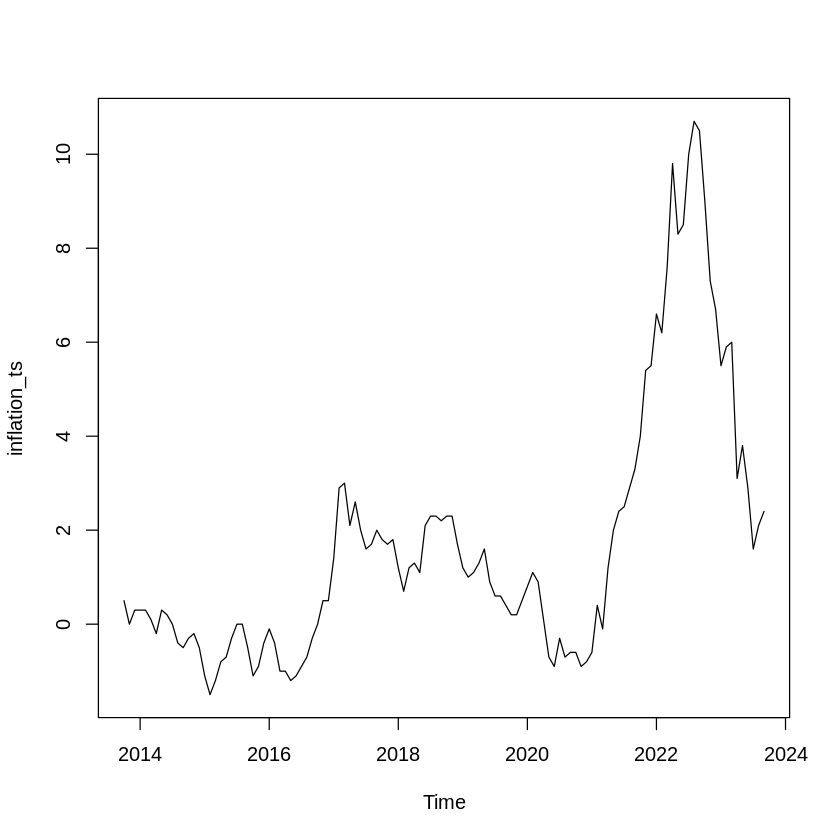

In [26]:
plot(inflation_ts)

## Fertilizers price

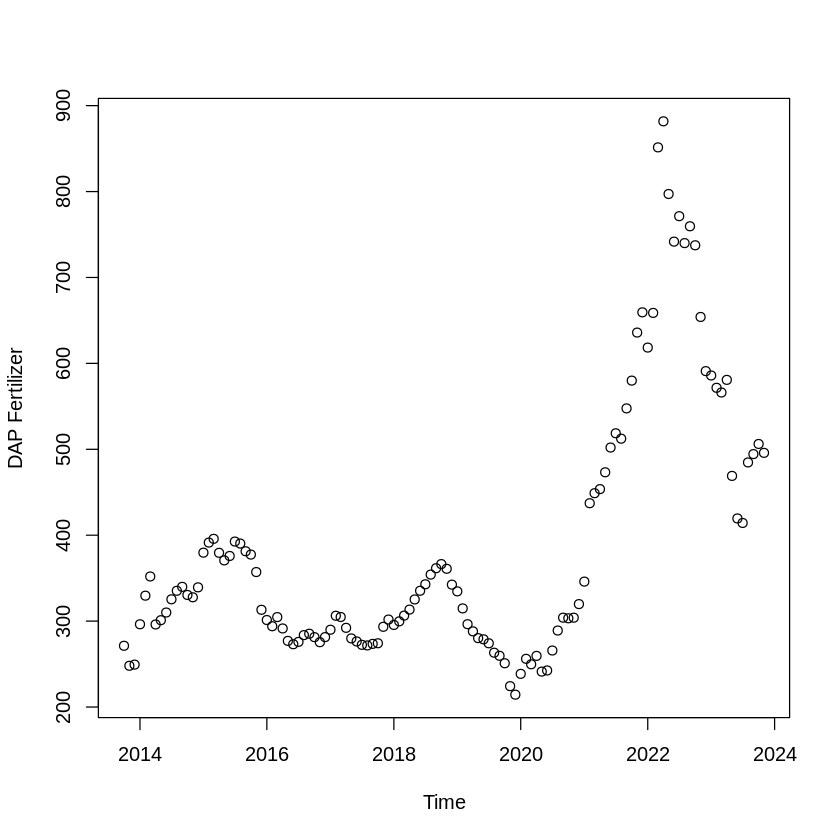

In [27]:
# DAP Fertilizer Data
dap <- read.csv("dap-fertilizer-180.csv", sep=';')
dap <- dap[,-3]
colnames(dap) <- c('Month','Price')

# Pulizia preliminare dei dati
dap$Month <- gsub("feb", "Feb", dap$Month)
dap$Month <- gsub("mar", "Mar", dap$Month)
dap$Month <- gsub("apr", "Apr", dap$Month)
dap$Month <- gsub("nov", "Nov", dap$Month)

# Uniforma la rappresentazione dell'anno
dap$Month <- gsub("-([0-9]{2})", "-20\\1", dap$Month)

# Converti la colonna delle date in tipo 'Date'
dap$Month <- parse_date_time(dap$Month, orders = c("%b %Y", "%b-%Y", "%b-%y"))

# Filtro mese/anno
dap <- dap[dap$Month > "2013-09-01", ]

dap_price <- dap$Price
time<- 1:NROW(dap)
dap_month <- as.Date(dap$Month)

plot(dap_month, dap_price, xlab="Time", ylab="DAP Fertilizer")

In [28]:
year <- year(as.POSIXlt(dap$Month, format="%Y/%m/%d"))
month <- month(as.POSIXlt(dap$Month, format="%Y/%m/%d"))

df_dap <- data.frame(year, month, dap_price)

dap_ts <- ts(df_dap$dap_price, start=c(2013,10), end=c(2023,09), frequency=12)
dap <- as.numeric(dap_ts)

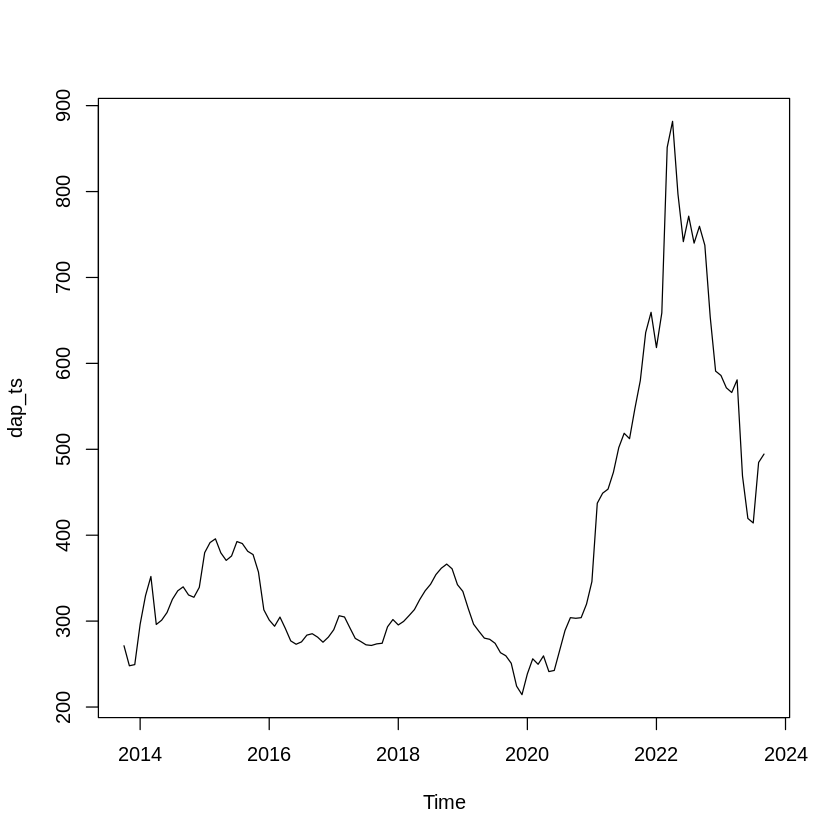

In [29]:
plot(dap_ts)

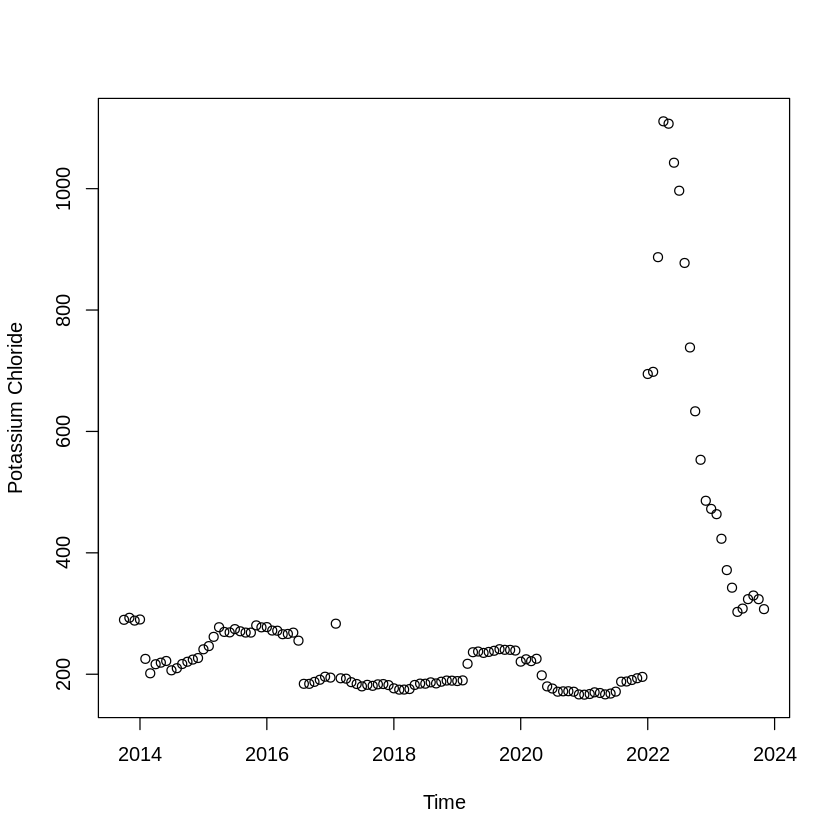

In [30]:
# Potassium Chloride Data
Pot <- read.csv("potassium-chloride-180.csv", sep=';')
Pot <- Pot[,-3]
colnames(Pot) <- c('Month','Price')

# Pulizia preliminare dei dati
Pot$Month <- gsub("feb", "Feb", Pot$Month)
Pot$Month <- gsub("mar", "Mar", Pot$Month)
Pot$Month <- gsub("apr", "Apr", Pot$Month)
Pot$Month <- gsub("nov", "Nov", Pot$Month)

# Uniforma la rappresentazione dell'anno
Pot$Month <- gsub("-([0-9]{2})", "-20\\1", Pot$Month)
Pot$Price <- gsub(",", "", Pot$Price)

# Converti la colonna delle date in tipo 'Date'
Pot$Month <- parse_date_time(Pot$Month, orders = c("%b %Y", "%b-%Y", "%b-%y"))

# Filtro mese/anno
Pot <- Pot[Pot$Month > "2013-09-01", ]

Pot_price <- as.numeric(Pot$Price)
time <- 1:NROW(Pot)
Pot_month <- as.Date(Pot$Month)

plot(Pot_month, Pot_price, xlab="Time", ylab="Potassium Chloride")

In [31]:
typeof(as.numeric(Pot$Price))

[1] "double"

In [32]:
year <- year(as.POSIXlt(Pot$Month, format="%Y/%m/%d"))
month <- month(as.POSIXlt(Pot$Month, format="%Y/%m/%d"))

df_pot <- data.frame(year, month, Pot_price)

pot_ts <- ts(df_pot$Pot_price, start=c(2013,10), end=c(2023,09), frequency=12)
pot <- as.numeric(pot_ts)

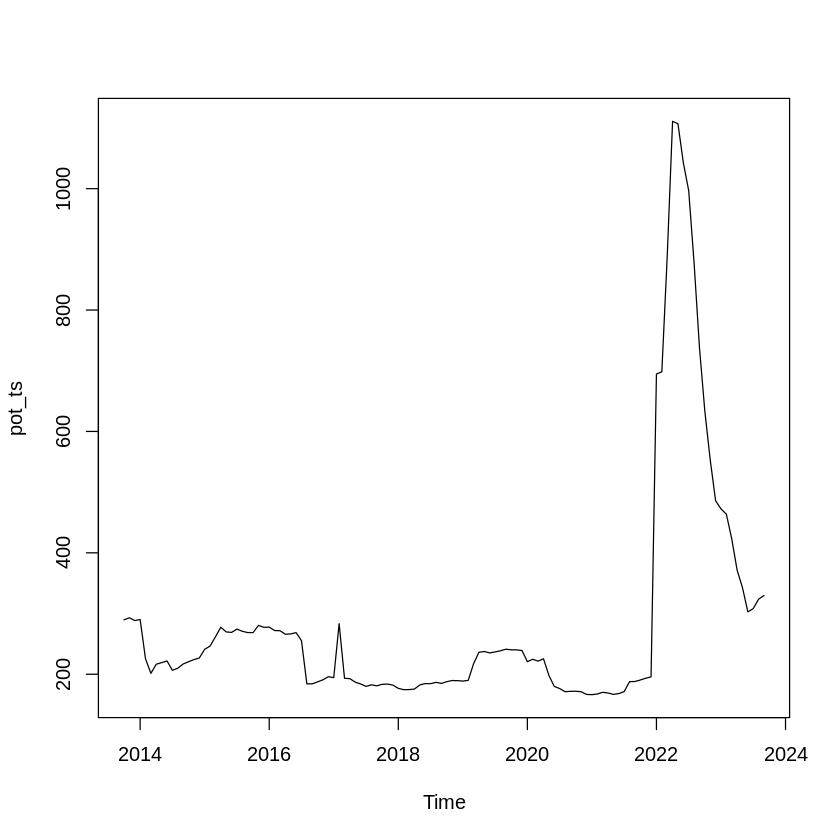

In [33]:
plot(pot_ts)

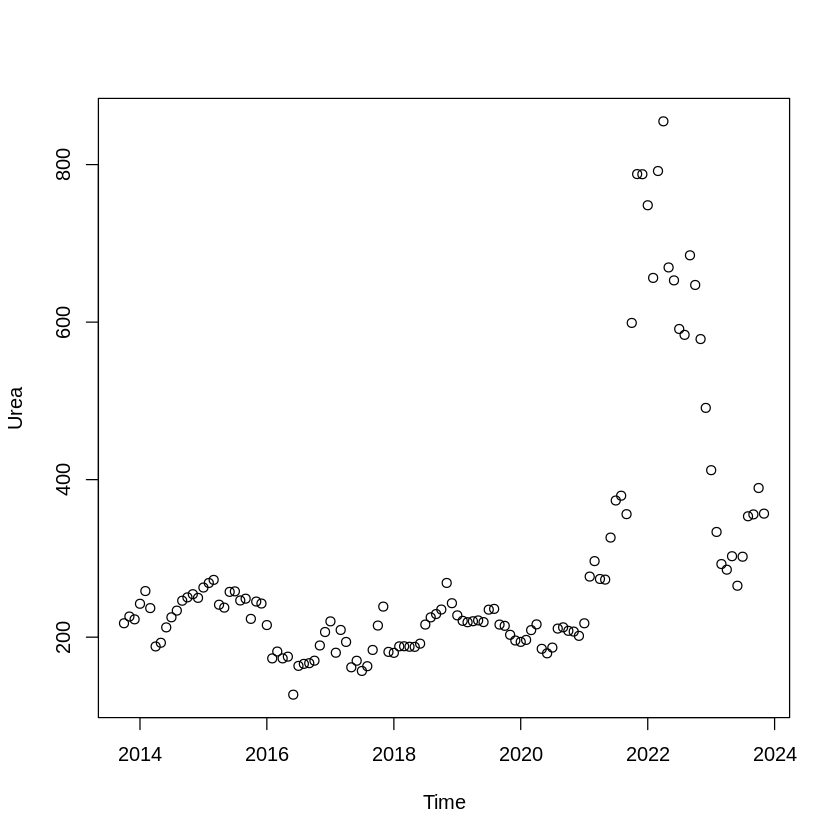

In [34]:
# Urea Data
urea <- read.csv("urea-180.csv", sep=';')
urea <- urea[,-3]
colnames(urea) <- c('Month','Price')

# Pulizia preliminare dei dati
urea$Month <- gsub("feb", "Feb", urea$Month)
urea$Month <- gsub("mar", "Mar", urea$Month)
urea$Month <- gsub("apr", "Apr", urea$Month)
urea$Month <- gsub("nov", "Nov", urea$Month)

# Uniforma la rappresentazione dell'anno
urea$Month <- gsub("-([0-9]{2})", "-20\\1", urea$Month)

# Converti la colonna delle date in tipo 'Date'
urea$Month <- parse_date_time(urea$Month, orders = c("%b %Y", "%b-%Y", "%b-%y"))

# Filtro mese/anno
urea <- urea[urea$Month > "2013-09-01", ]

urea_price <- urea$Price
time1 <- 1:NROW(urea)
urea_month <- as.Date(urea$Month)

plot(urea_month, urea_price, xlab="Time", ylab="Urea")

In [35]:
year <- year(as.POSIXlt(urea$Month, format="%Y/%m/%d"))
month <- month(as.POSIXlt(urea$Month, format="%Y/%m/%d"))

df_urea <- data.frame(year, month, urea_price)

urea_ts <- ts(df_urea$urea_price, start=c(2013,10), end=c(2023,09), frequency=12)
urea <- as.numeric(urea_ts)

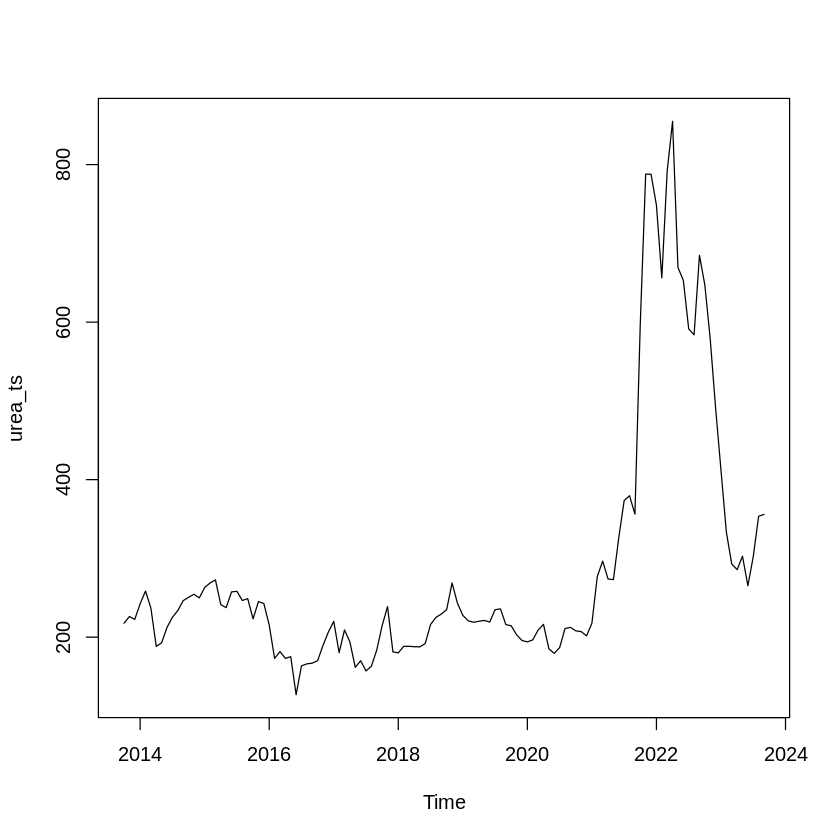

In [36]:
plot(urea_ts)

## Import/Export

In [37]:
ex <- read_xlsx("/content/Export.xlsx")
ex <- ex[,-2:-3]
ex[,-1] <- lapply(ex[,-1], function(x) gsub("-", "0", x))
ex[, -1] <- lapply(ex[, -1], as.numeric)

# Supponendo che 'df' sia il tuo dataframe
ex <- pivot_longer(ex, cols = c('Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'), names_to = "Month", values_to = "Value")

ex$Month <- match(tolower(ex$Month), tolower(month.abb))

# Assuming 'ex' is your dataframe
split_years <- strsplit(ex$'Marketing Year', "/")

# Extract the year based on the value of Month
ex$Year <- ifelse(ex$Month >= 10, as.numeric(sapply(split_years, function(x) substring(x[1], 1, 4))), as.numeric(sapply(split_years, function(x) substring(x[2], 1, 4))))

# Combine Month and Year into a new Date column
ex$Date <- as.Date(paste(ex$Year, ex$Month, "01", sep="-"), format="%Y-%m-%d")

# Remove the first column
ex <- ex[, -1]

# Remove Month and Year columns
ex <- subset(ex, select = -c(Month, Year))

# Sort dataframe by Date
ex <- ex[order(ex$Date),]

# Reverse the order of remaining columns
ex <- ex[, rev(seq_along(ex))]

# Filtro mese/anno
ex <- ex[ex$Date > "2013-09-01" & ex$Date < "2023-09-01" , ]

ex_price <- ex$Value
time1 <- 1:NROW(ex)
ex_month <- as.Date(ex$Date)

In [38]:
year <- year(as.POSIXlt(ex$Date, format="%Y/%m/%d"))
month <- month(as.POSIXlt(ex$Date, format="%Y/%m/%d"))
value <- ex$Value

df_ex <- data.frame(year, month, value)

export_ts <- ts(df_ex$value, start=c(2013,10), end=c(2023,09), frequency=12)
export <- as.numeric(export_ts)

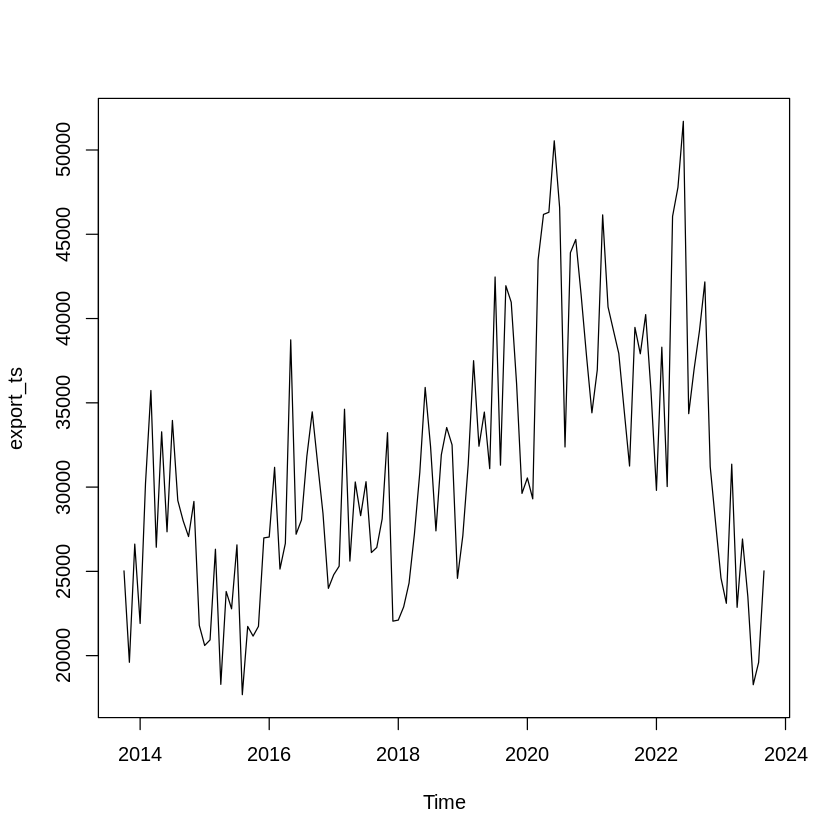

In [39]:
plot(export_ts)

In [40]:
imp <- read_xlsx("Import.xlsx")
imp <- imp[,-2:-3]
imp[,-1] <- lapply(imp[,-1], function(x) gsub("-", "0", x))
imp[, -1] <- lapply(imp[, -1], as.numeric)

# Supponendo che 'df' sia il tuo dataframe
imp <- pivot_longer(imp, cols = c('Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'), names_to = "Month", values_to = "Value")

imp$Month <- match(tolower(imp$Month), tolower(month.abb))

# Assuming 'imp' is your dataframe
split_years <- strsplit(imp$'Marketing Year', "/")

# imptract the year based on the value of Month
imp$Year <- ifelse(imp$Month >= 10, as.numeric(sapply(split_years, function(x) substring(x[1], 1, 4))), as.numeric(sapply(split_years, function(x) substring(x[2], 1, 4))))

# Combine Month and Year into a new Date column
imp$Date <- as.Date(paste(imp$Year, imp$Month, "01", sep="-"), format="%Y-%m-%d")

# Remove the first column
imp <- imp[, -1]

# Remove Month and Year columns
imp <- subset(imp, select = -c(Month, Year))

# Sort dataframe by Date
imp <- imp[order(imp$Date),]

# Reverse the order of remaining columns
imp <- imp[, rev(seq_along(imp))]

# Filtro mese/anno
imp <- imp[imp$Date > "2013-09-01" & imp$Date < "2023-09-01" , ]

imp_price <- imp$Value
time1 <- 1:NROW(imp)
imp_month <- as.Date(imp$Date)

In [41]:
year <- year(as.POSIXlt(imp$Date, format="%Y/%m/%d"))
month <- month(as.POSIXlt(imp$Date, format="%Y/%m/%d"))
value <- imp$Value

df_imp <- data.frame(year, month, value)

import_ts <- ts(df_imp$value, start=c(2013,10), end=c(2023,09), frequency=12)
import <- as.numeric(import_ts)

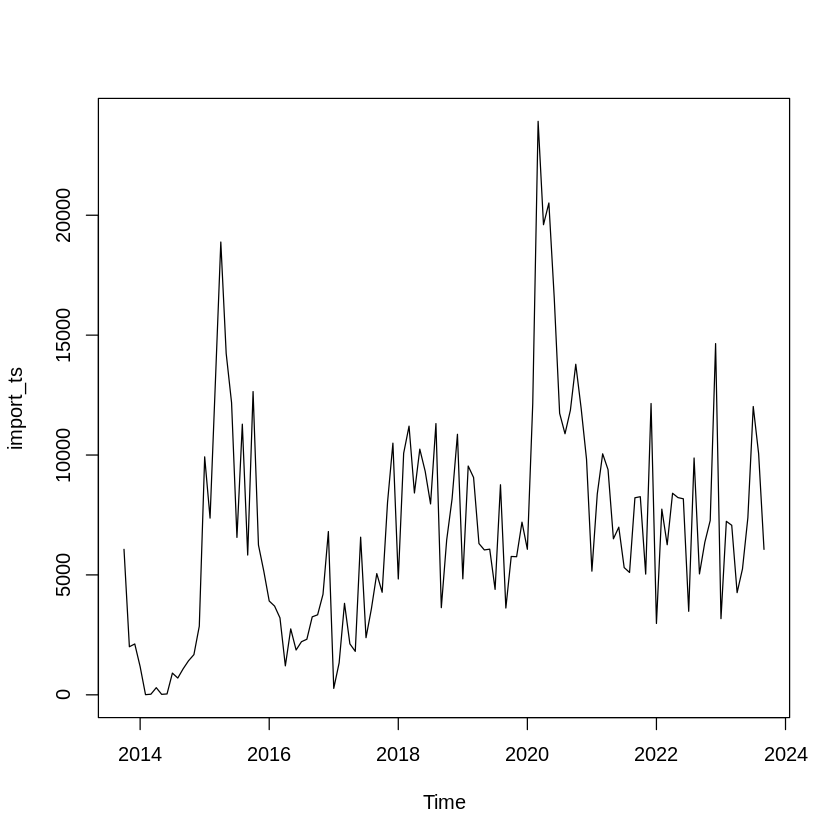

In [42]:
plot(import_ts)

# Exploratory analysis

## Correlation matrix and collinearity problem

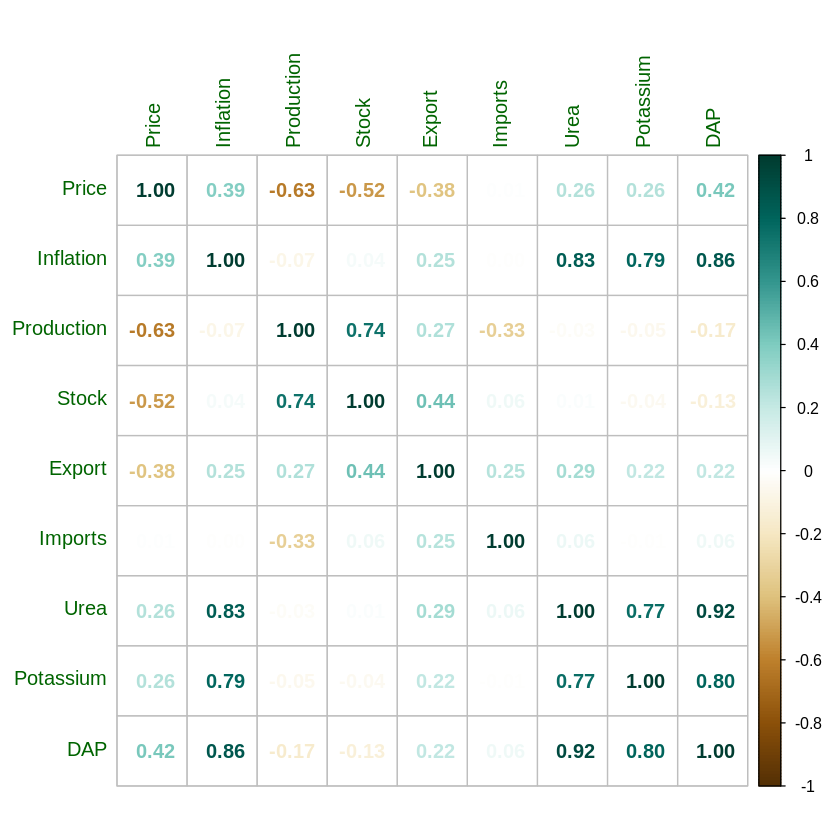

In [43]:
# Combine time series into a data frame
combined_data <- data.frame(
  Price = coredata(price),
  Inflation = coredata(inflation),
  Production = coredata(production),
  Stock = coredata(stock),
  Export = coredata(export),
  Imports = coredata(import),
  Urea = coredata(urea),
  Potassium = coredata(pot),
  DAP = coredata(dap)
)

res <- cor(combined_data)


corrplot(res, col=COL2('BrBG', 200), method = "number", tl.col='darkgreen') # method = "circle"


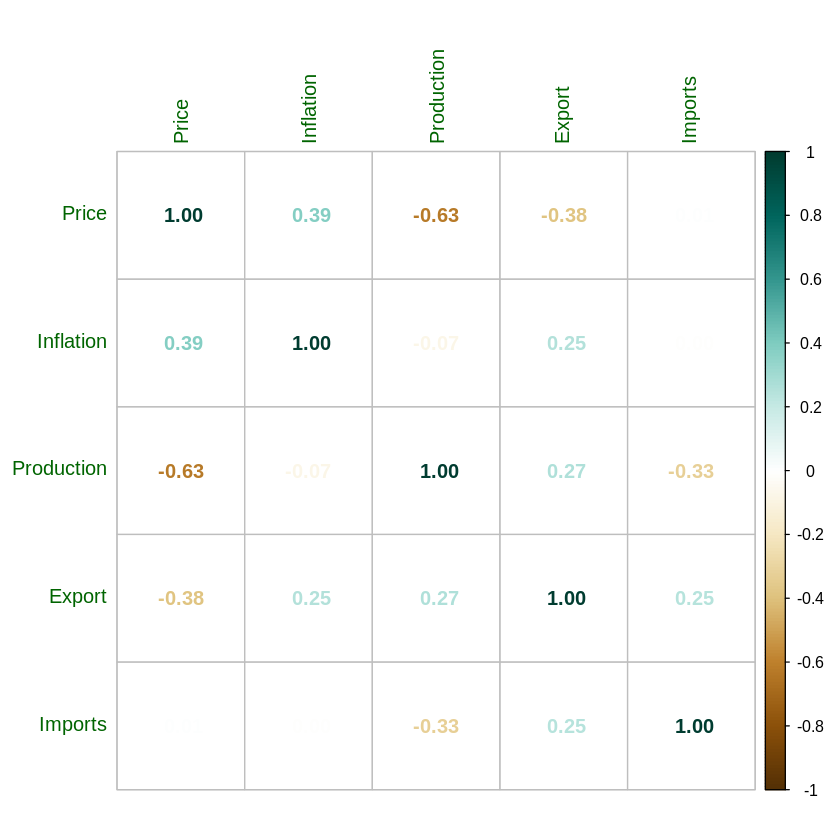

In [44]:
#After eliminationg some predictors
combined_data <- data.frame(
  Price = coredata(price),
  Inflation = coredata(inflation),
  Production = coredata(production),
  Export = coredata(export),
  Imports = coredata(import)
)

res <- cor(combined_data)

corrplot(res, col=COL2('BrBG', 200), method = "number", tl.col='darkgreen')

Step AIC

In [45]:
fit <- lm(price ~ production + inflation + export + import + stock + urea)

m <- stepAIC(fit, direction="both")
summary(m)

Start:  AIC=1029.77
price ~ production + inflation + export + import + stock + urea

             Df Sum of Sq    RSS    AIC
- stock       1       222 569561 1027.8
- urea        1       946 570285 1028.0
- import      1      6900 576239 1029.2
<none>                    569339 1029.8
- inflation   1     92358 661696 1045.8
- export      1    111682 681021 1049.3
- production  1    130286 699624 1052.5

Step:  AIC=1027.82
price ~ production + inflation + export + import + urea

             Df Sum of Sq    RSS    AIC
- urea        1      1246 570807 1026.1
- import      1      7181 576742 1027.3
<none>                    569561 1027.8
+ stock       1       222 569339 1029.8
- inflation   1    100931 670491 1045.4
- export      1    115869 685430 1048.0
- production  1    313528 883088 1078.4

Step:  AIC=1026.08
price ~ production + inflation + export + import

             Df Sum of Sq    RSS    AIC
- import      1      7866 578673 1025.7
<none>                    570807 1026.1
+ urea  


Call:
lm(formula = price ~ production + inflation + export)

Residuals:
    Min      1Q  Median      3Q     Max 
-143.61  -39.13    0.12   29.71  364.41 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.777e+02  3.273e+01  20.706  < 2e-16 ***
production  -1.634e-01  1.980e-02  -8.251 2.81e-13 ***
inflation    1.786e+01  2.424e+00   7.371 2.71e-11 ***
export      -5.358e-03  9.163e-04  -5.848 4.69e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 70.63 on 116 degrees of freedom
Multiple R-squared:  0.6194,	Adjusted R-squared:  0.6096 
F-statistic: 62.94 on 3 and 116 DF,  p-value: < 2.2e-16


### VIF

All parameters

[1] "mean VIF = 4.67605430223679"


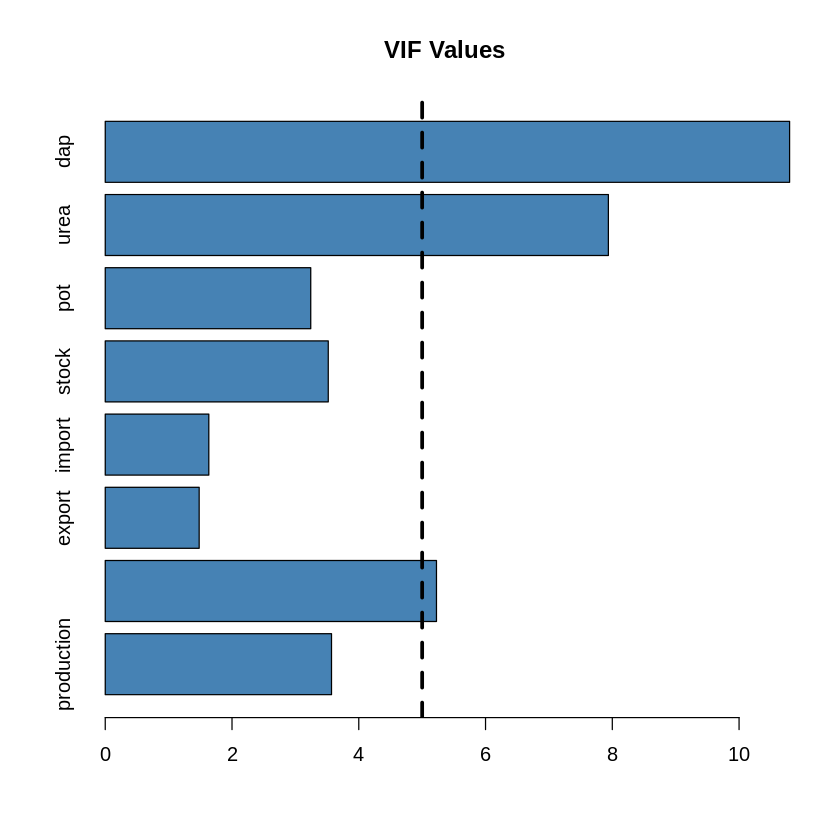

In [46]:
fit <- lm(price ~ production + inflation + export + import + stock + pot + urea + dap)

vif_values <- vif(fit)          #create vector of VIF values
print(paste("mean VIF =", mean(vif_values)))

barplot(vif_values, main = "VIF Values", horiz = TRUE, col = "steelblue") #create horizontal bar chart to display each VIF value

abline(v = 5, lwd = 3, lty = 2)    #add vertical line at 5 as after 5 there is severe correlation

Only selected parameters

[1] "mean VIF = 1.29739550547757"


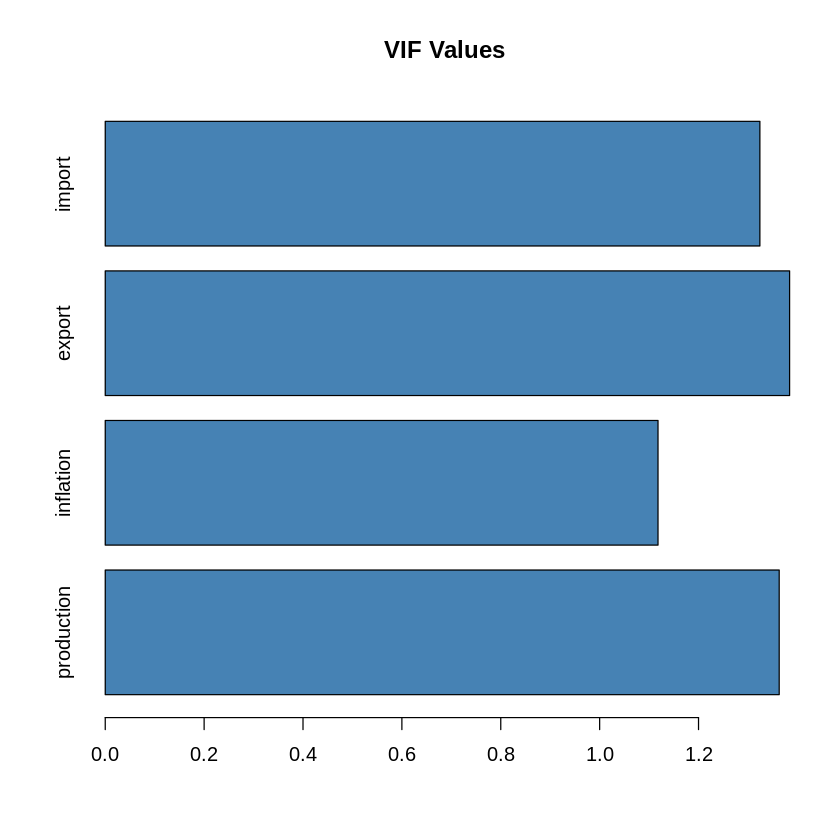

In [47]:
fit <- lm(price ~ production + inflation + export + import)

vif_values <- vif(fit)          #create vector of VIF values
print(paste("mean VIF =", mean(vif_values)))

barplot(vif_values, main = "VIF Values", horiz = TRUE, col = "steelblue") #create horizontal bar chart to display each VIF value

abline(v = 5, lwd = 3, lty = 2)    #add vertical line at 5 as after 5 there is severe correlation

## Time series autocrrelation

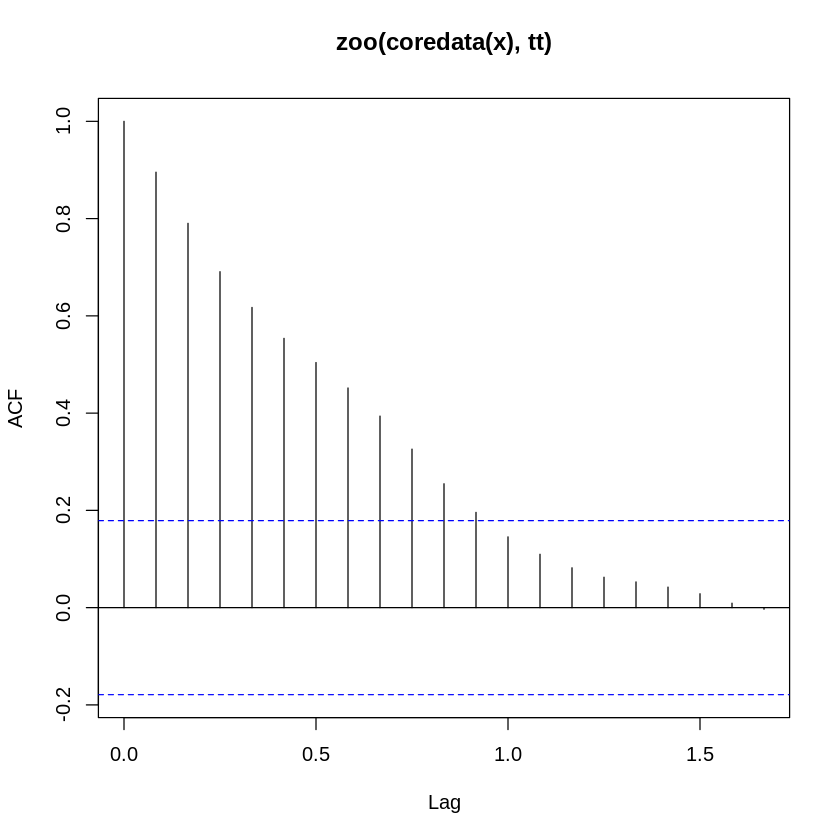

In [48]:
acf(price_ts)

In [49]:
tt<- (1:length(price)) #trend
seas = factor(rep(c(10,11,12,1,2,3,4,5,6,7,8,9),length(price)/12)) #seasonality

# Multiple Linear Regression

No trend, no seasonality


Call:
tslm(formula = price_ts ~ production_ts + inflation_ts + export_ts + 
    import_ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-138.53  -38.75    0.05   27.80  358.50 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6.930e+02  3.482e+01  19.899  < 2e-16 ***
production_ts -1.755e-01  2.196e-02  -7.988 1.16e-12 ***
inflation_ts   1.740e+01  2.445e+00   7.116 1.02e-10 ***
export_ts     -4.867e-03  9.936e-04  -4.899 3.19e-06 ***
import_ts     -2.053e-03  1.631e-03  -1.259    0.211    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 70.45 on 115 degrees of freedom
Multiple R-squared:  0.6246,	Adjusted R-squared:  0.6116 
F-statistic: 47.84 on 4 and 115 DF,  p-value: < 2.2e-16


[1] "AIC =  1368.62298320929"
[1] "residuals mean =  -2.08768187922222e-15"


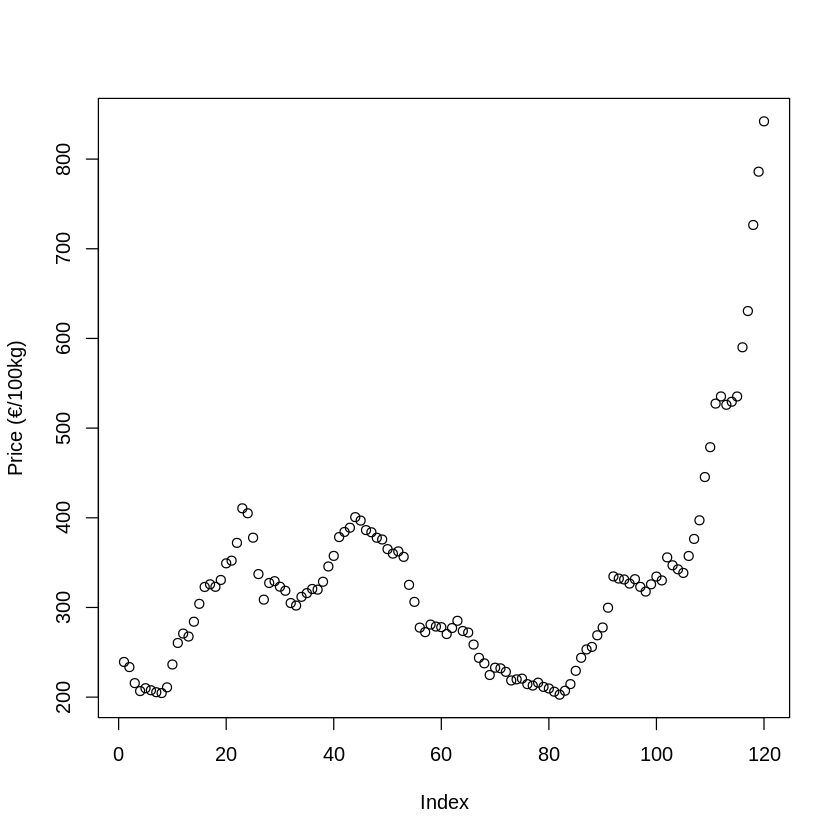

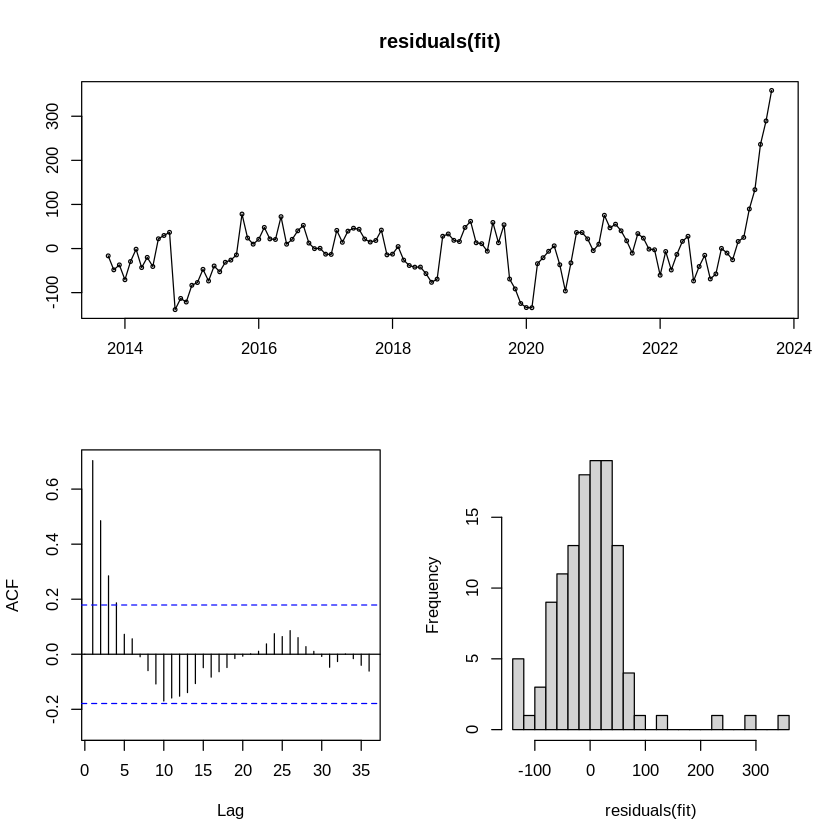


	Ljung-Box test

data:  Residuals from Linear regression model
Q* = 125.58, df = 24, p-value = 9.992e-16

Model df: 0.   Total lags used: 24




	Durbin-Watson test

data:  fit
DW = 0.36757, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


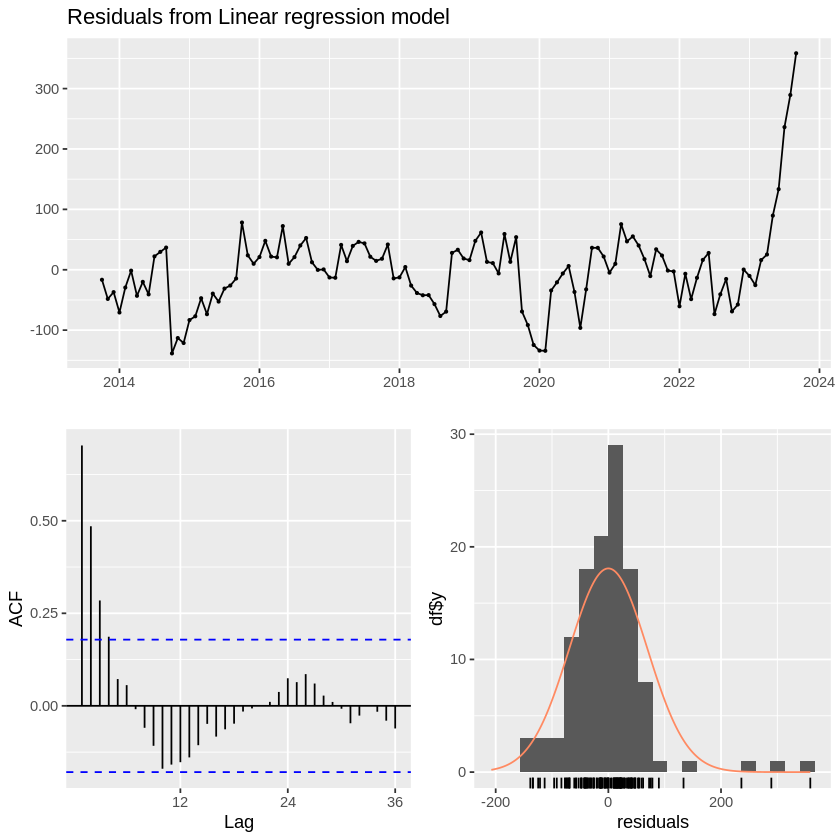

In [50]:
fit <- tslm(price_ts ~ production_ts + inflation_ts + export_ts + import_ts)
summary(fit)

plot(price, ylab="Price (€/100kg)")
lines(fitted(fit), col=2)

print(paste("AIC = ", AIC(fit)))
print(paste("residuals mean = ", mean(residuals(fit))))

tsdisplay(residuals(fit), plot.type='histogram')
checkresiduals(fit, test="LB")
dwtest(fit)

With trend and seasonality


Call:
tslm(formula = price_ts ~ production + inflation + export + import + 
    trend + season)

Residuals:
     Min       1Q   Median       3Q      Max 
-137.163  -28.961    1.851   30.273  232.934 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 613.694255  33.670333  18.227  < 2e-16 ***
production   -0.119975   0.020188  -5.943 3.85e-08 ***
inflation     6.216400   2.740917   2.268 0.025416 *  
export       -0.008778   0.001013  -8.663 6.83e-14 ***
import       -0.004313   0.001511  -2.855 0.005200 ** 
trend         1.745474   0.267793   6.518 2.68e-09 ***
season2      33.486269  26.835502   1.248 0.214921    
season3      78.506454  27.897794   2.814 0.005861 ** 
season4      52.546645  27.246966   1.929 0.056542 .  
season5      90.189538  27.930440   3.229 0.001667 ** 
season6      76.451842  27.505453   2.780 0.006472 ** 
season7      75.891246  27.129877   2.797 0.006150 ** 
season8      56.298793  26.873915   2.095 0.038631 *  
season9      9

[1] "AIC =  1338.02502579369"
[1] "residuals mean =  -1.73911810878261e-15"


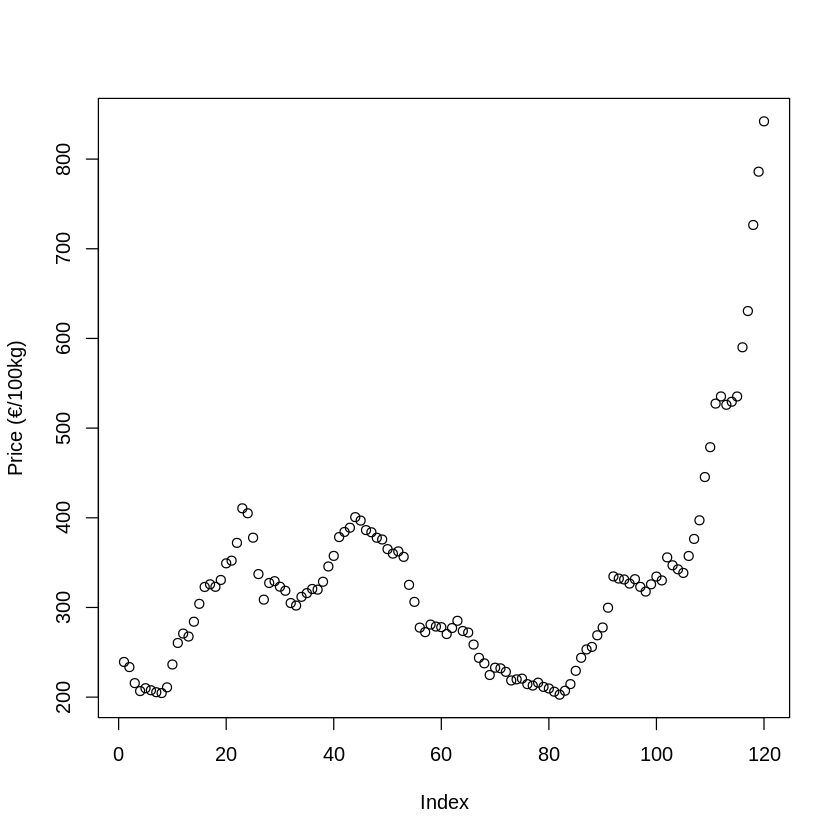

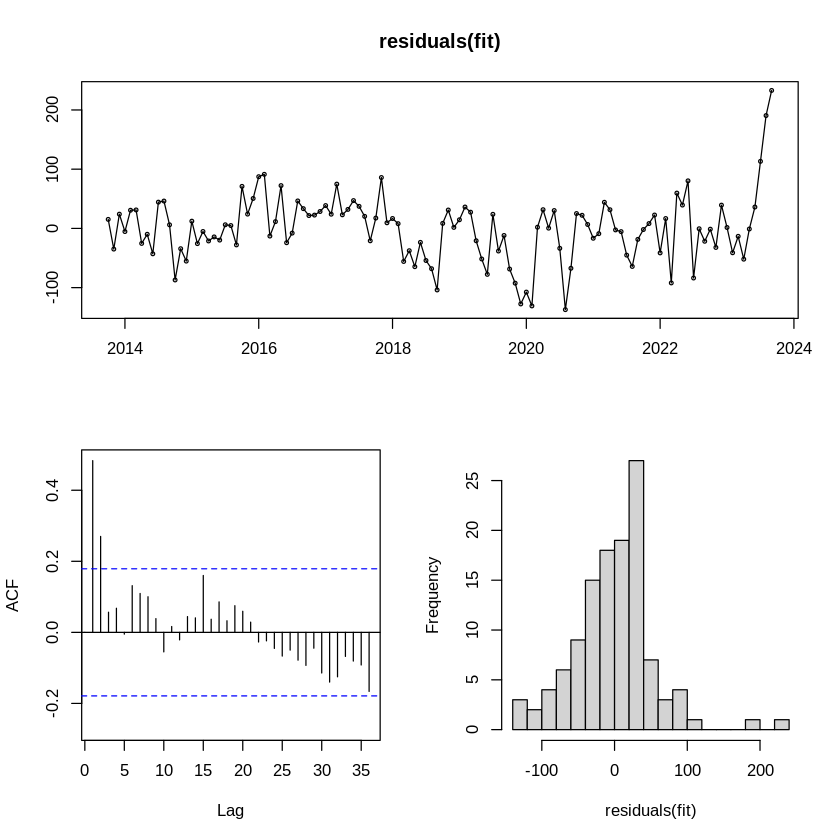


	Ljung-Box test

data:  Residuals from Linear regression model
Q* = 51.972, df = 24, p-value = 0.000789

Model df: 0.   Total lags used: 24




	Durbin-Watson test

data:  fit
DW = 0.88278, p-value = 2.703e-10
alternative hypothesis: true autocorrelation is greater than 0


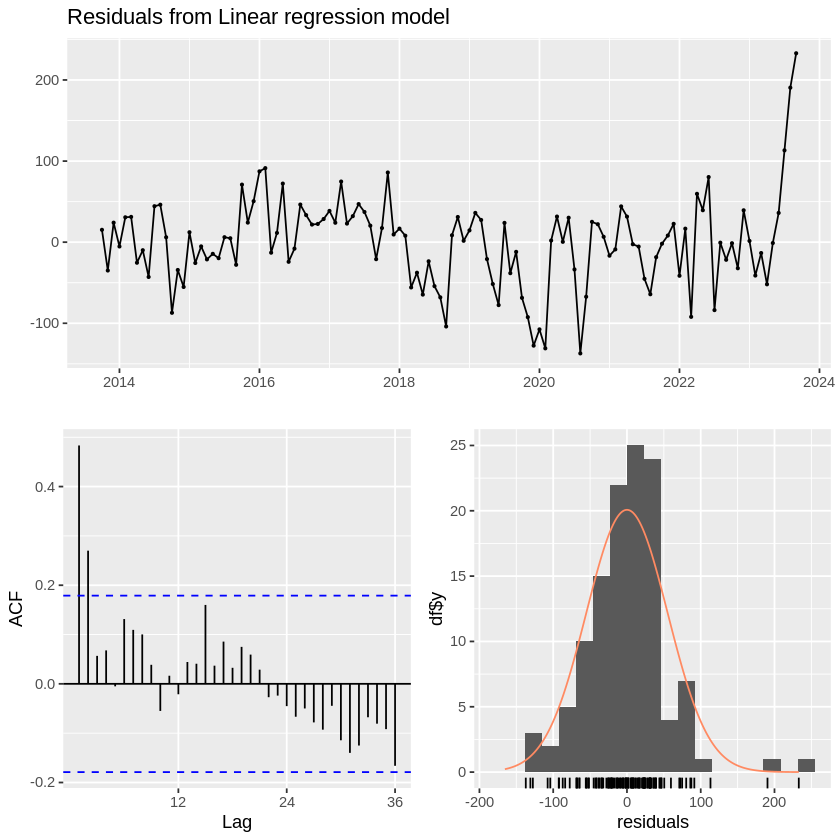

In [51]:
fit <- tslm(price_ts ~ production + inflation + export + import + trend + season)
summary(fit)

plot(price, ylab="Price (€/100kg)")
lines(fitted(fit), col=2)

print(paste("AIC = ", AIC(fit)))
print(paste("residuals mean = ", mean(residuals(fit))))

tsdisplay(residuals(fit), plot.type='histogram')
checkresiduals(fit, test="LB")
dwtest(fit)

With trend, no seasonality


Call:
tslm(formula = price_ts ~ production + inflation + export + import + 
    trend)

Residuals:
     Min       1Q   Median       3Q      Max 
-164.306  -31.804    5.119   23.541  281.758 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.500e+02  3.152e+01  20.620  < 2e-16 ***
production  -1.344e-01  2.057e-02  -6.537 1.84e-09 ***
inflation    6.537e+00  2.841e+00   2.301  0.02322 *  
export      -7.162e-03  9.585e-04  -7.472 1.73e-11 ***
import      -4.454e-03  1.493e-03  -2.983  0.00349 ** 
trend        1.587e+00  2.708e-01   5.860 4.58e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 62.03 on 114 degrees of freedom
Multiple R-squared:  0.7115,	Adjusted R-squared:  0.6989 
F-statistic: 56.23 on 5 and 114 DF,  p-value: < 2.2e-16


[1] "AIC =  1339.02802417736"
[1] "residuals mean =  -3.01518069771115e-15"


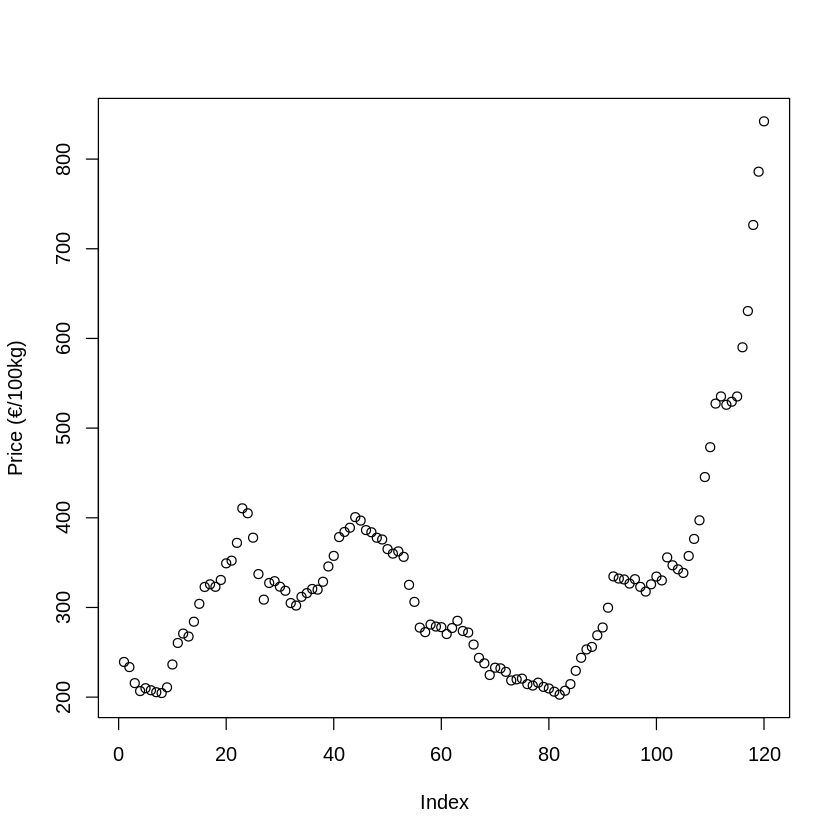

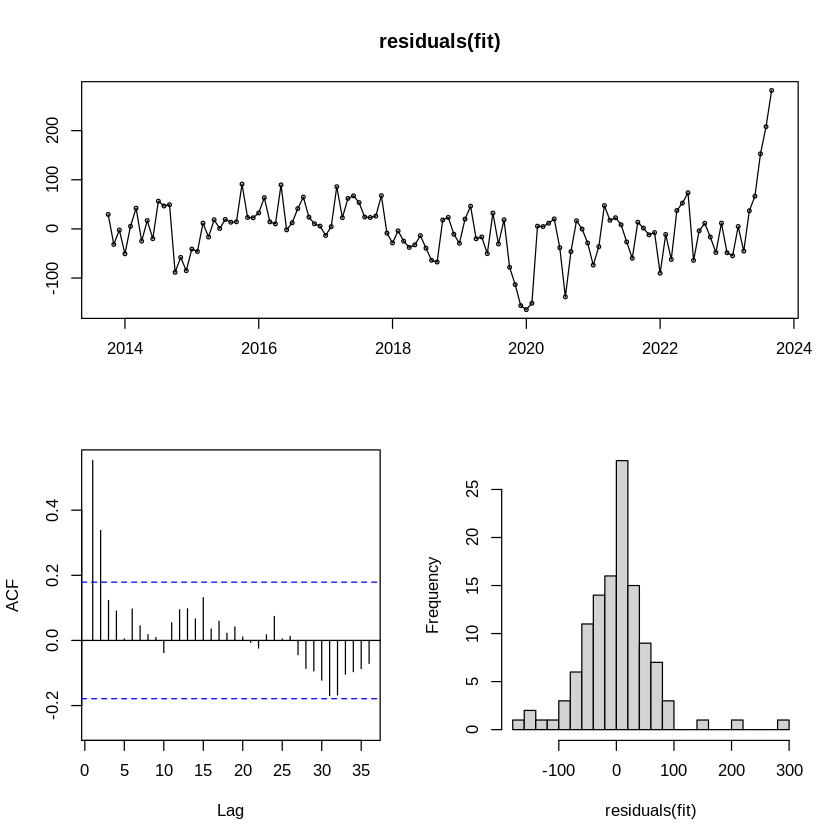


	Ljung-Box test

data:  Residuals from Linear regression model
Q* = 64.118, df = 24, p-value = 1.638e-05

Model df: 0.   Total lags used: 24




	Durbin-Watson test

data:  fit
DW = 0.71294, p-value = 2.773e-14
alternative hypothesis: true autocorrelation is greater than 0


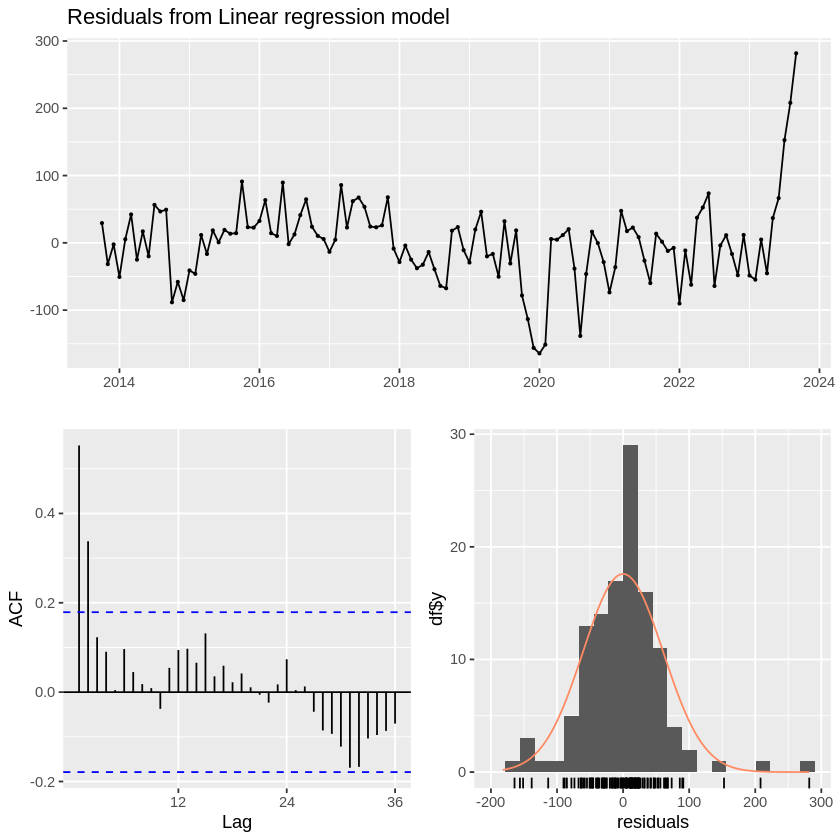

In [52]:
fit <- tslm(price_ts ~ production + inflation + export + import + trend)
summary(fit)

plot(price, ylab="Price (€/100kg)")
lines(fitted(fit), col=2)

print(paste("AIC = ", AIC(fit)))
print(paste("residuals mean = ", mean(residuals(fit))))

tsdisplay(residuals(fit), plot.type='histogram')
checkresiduals(fit, test="LB")
dwtest(fit)

## Dynamic regression with ARIMA errors

ARIMA(1,1,0)

Series: price 
Regression with ARIMA(1,1,0) errors 

Coefficients:
         ar1  production  inflation  export  import
      0.6972     -0.0034     2.2097  -2e-04   3e-04
s.e.  0.0697      0.0075     1.7513   2e-04   3e-04

sigma^2 = 212.6:  log likelihood = -485.53
AIC=983.06   AICc=983.81   BIC=999.73

Training set error measures:
                   ME    RMSE      MAE       MPE     MAPE      MASE        ACF1
Training set 1.850108 14.2129 10.24449 0.4061267 3.066516 0.7967031 -0.08476904

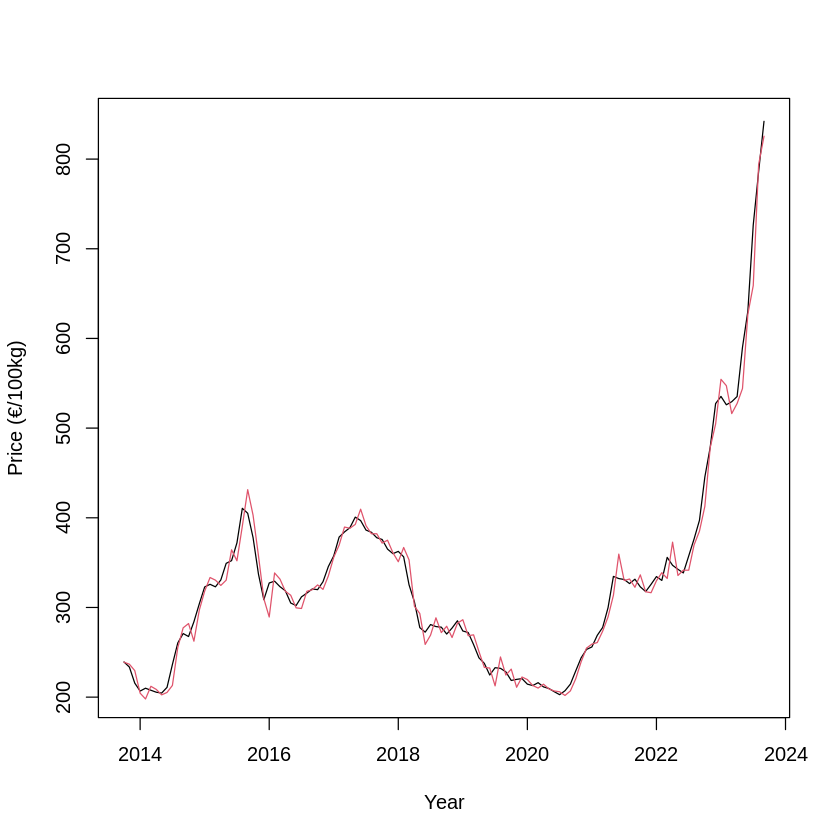

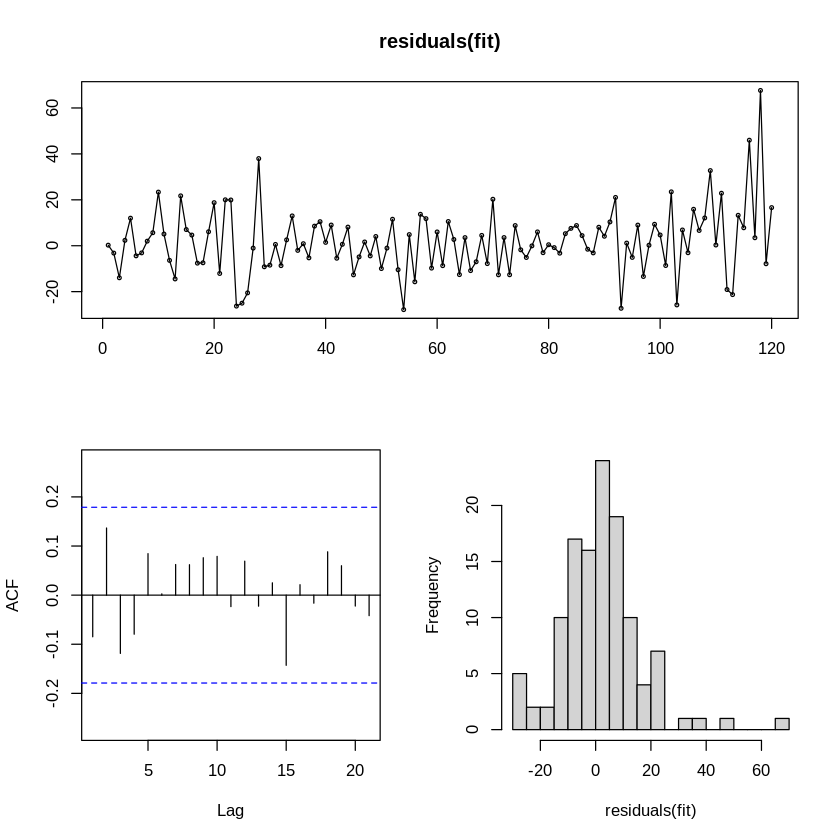


	Ljung-Box test

data:  Residuals from Regression with ARIMA(1,1,0) errors
Q* = 9.2672, df = 9, p-value = 0.413

Model df: 1.   Total lags used: 10



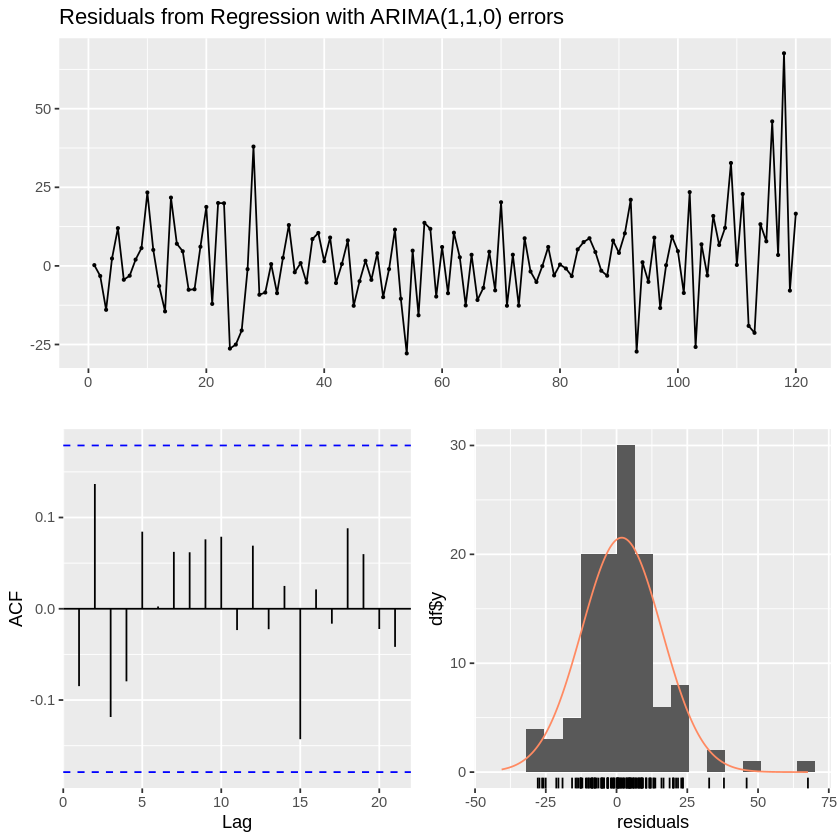

In [53]:
xreg <- cbind(production, inflation, export, import)

fit <- Arima(price, order = c(1,1,0), xreg = xreg)
summary(fit)


plot(price_ts, type='l', ylab="Price (€/100kg)", xlab='Year')
lines(as.yearmon(time(price_ts)), fitted(fit), col=2)

tsdisplay(residuals(fit), plot.type='histogram')
checkresiduals(fit)

ARIMA(0,2,3)

Series: price 
Regression with ARIMA(0,2,3) errors 

Coefficients:
          ma1     ma2      ma3  production  inflation  export  import
      -0.4263  0.0203  -0.3634     -0.0033     1.7078  -3e-04   4e-04
s.e.   0.0878  0.1100   0.0966      0.0071     1.5557   2e-04   3e-04

sigma^2 = 198.7:  log likelihood = -476.46
AIC=968.93   AICc=970.25   BIC=991.09

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 1.456792 13.55568 9.902572 0.4133479 3.021596 0.7701124
                    ACF1
Training set 0.005088698

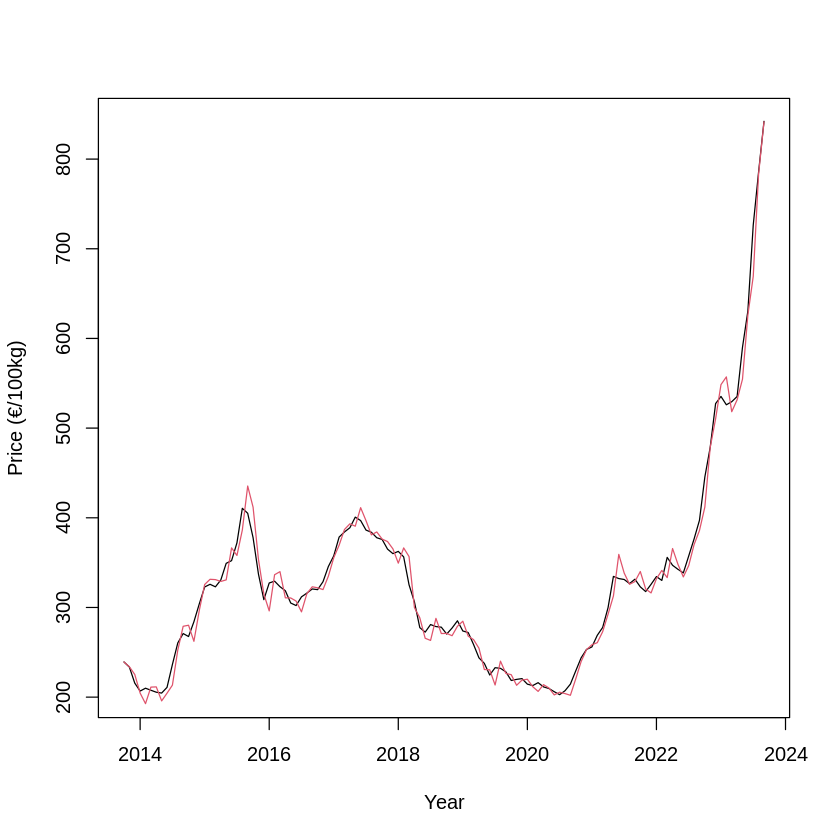

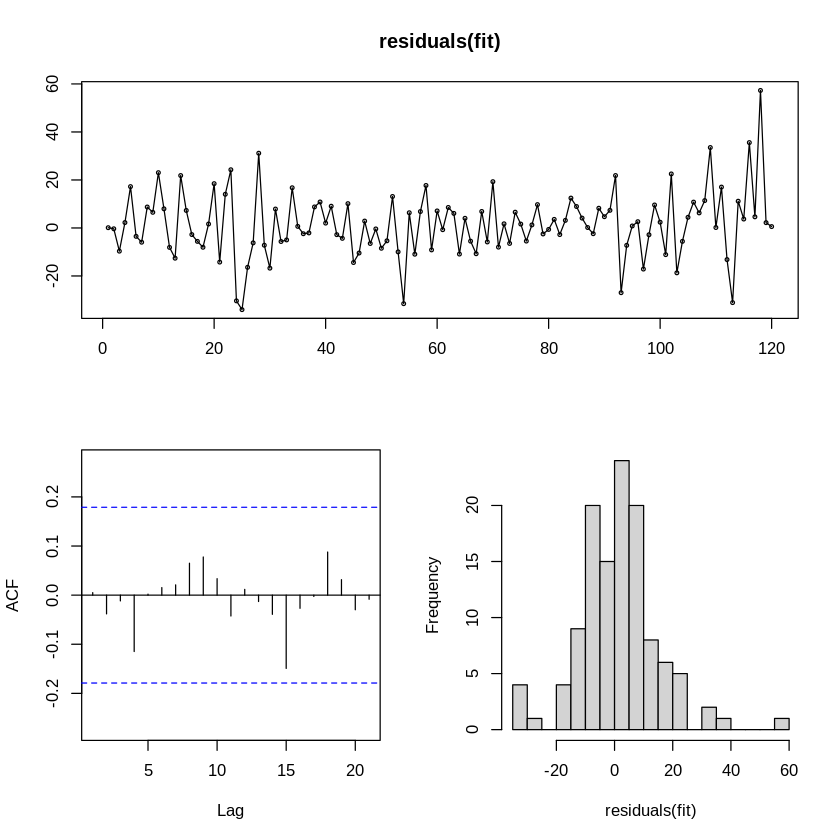


	Ljung-Box test

data:  Residuals from Regression with ARIMA(0,2,3) errors
Q* = 3.4469, df = 7, p-value = 0.8408

Model df: 3.   Total lags used: 10



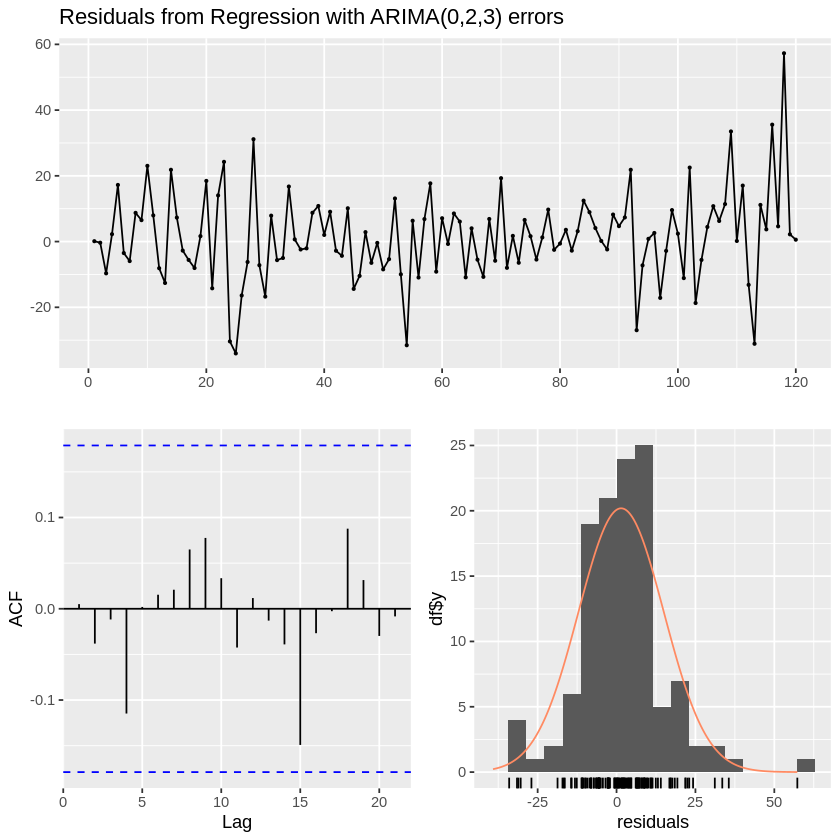

In [54]:
xreg <- cbind(production, inflation, export, import)

fit <- Arima(price, order = c(0,2,3), xreg = xreg)
summary(fit)

plot(price_ts, type='l', ylab="Price (€/100kg)", xlab='Year')
lines(as.yearmon(time(price_ts)), fitted(fit), col=2)

tsdisplay(residuals(fit), plot.type='histogram')
checkresiduals(fit)

auto ARIMA

In [55]:
auto.ar<- auto.arima(price, xreg = xreg, seasonal=FALSE, stepwise = FALSE, approximation = FALSE)
auto.ar

Series: price 
Regression with ARIMA(0,0,5) errors 

Coefficients:
         ma1     ma2     ma3     ma4     ma5  intercept  production  inflation
      1.9268  2.5706  2.3071  1.3798  0.5089   339.1544     -0.0034     4.3535
s.e.  0.0844  0.1494  0.1776  0.1534  0.1025    23.5723      0.0100     1.7950
      export  import
      -2e-04   0e+00
s.e.   2e-04   4e-04

sigma^2 = 413.9:  log likelihood = -529.56
AIC=1081.12   AICc=1083.57   BIC=1111.79

# GAM

Loess

Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“lo.wam convergence not obtained in  30  iterations”



Call: gam(formula = price ~ lo(production) + lo(inflation) + lo(export) + 
    lo(import) + lo(tt))
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-97.789 -18.472  -1.343  13.356 182.053 

(Dispersion Parameter for gaussian family taken to be 1238.219)

    Null Deviance: 1520579 on 119 degrees of freedom
Residual Deviance: 121460.7 on 98.093 degrees of freedom
AIC: 1216.742 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
                   Df Sum Sq Mean Sq  F value    Pr(>F)    
lo(production)  1.000 367032  367032 296.4193 < 2.2e-16 ***
lo(inflation)   1.000  18620   18620  15.0378 0.0001907 ***
lo(export)      1.000   5966    5966   4.8185 0.0305143 *  
lo(import)      1.000   1160    1160   0.9368 0.3354812    
lo(tt)          1.000  75375   75375  60.8740 6.656e-12 ***
Residuals      98.093 121461    1238                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
               

[1] "AIC =  1216.74169913887"
[1] "residuals mean =  6.82121026329696e-14"


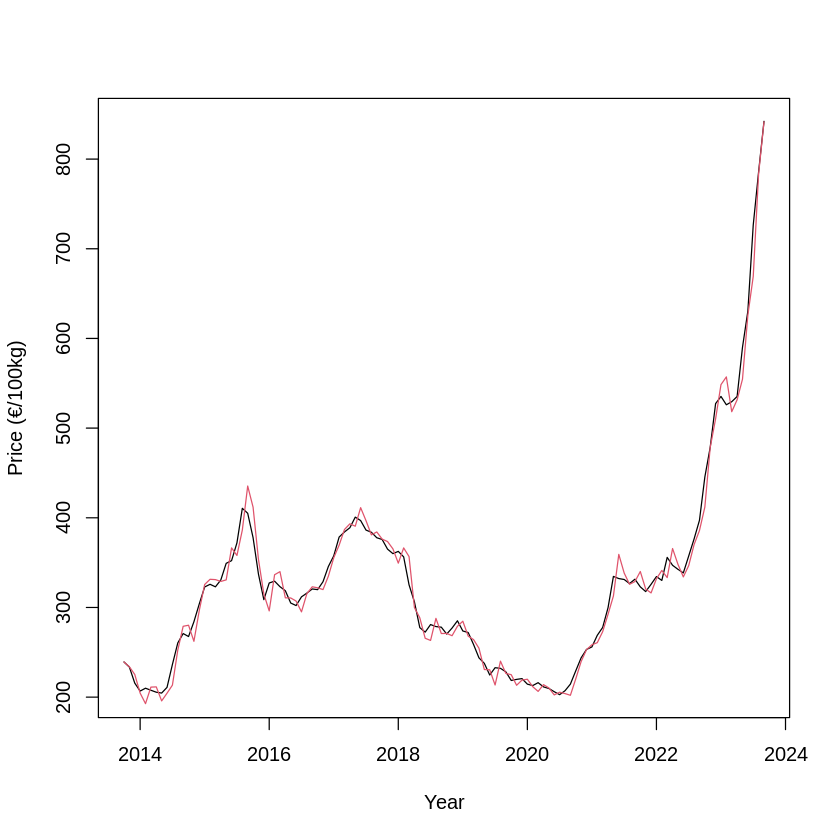

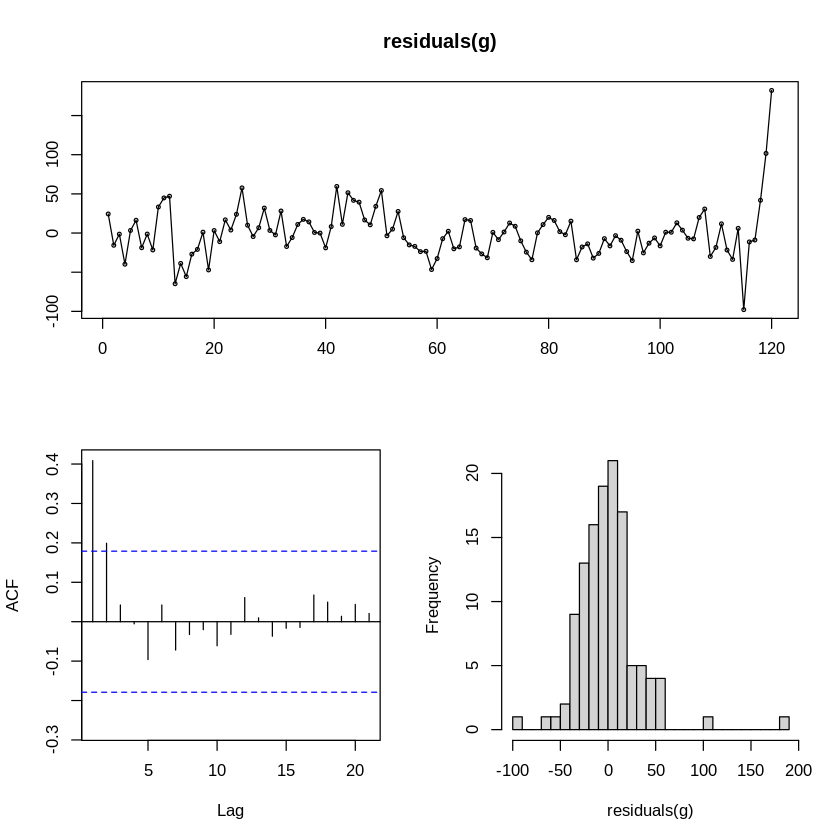


	Ljung-Box test

data:  Residuals from glm.fit
Q* = 28.453, df = 10, p-value = 0.001527

Model df: 0.   Total lags used: 10




	Durbin-Watson test

data:  g
DW = 0.71294, p-value = 2.773e-14
alternative hypothesis: true autocorrelation is greater than 0


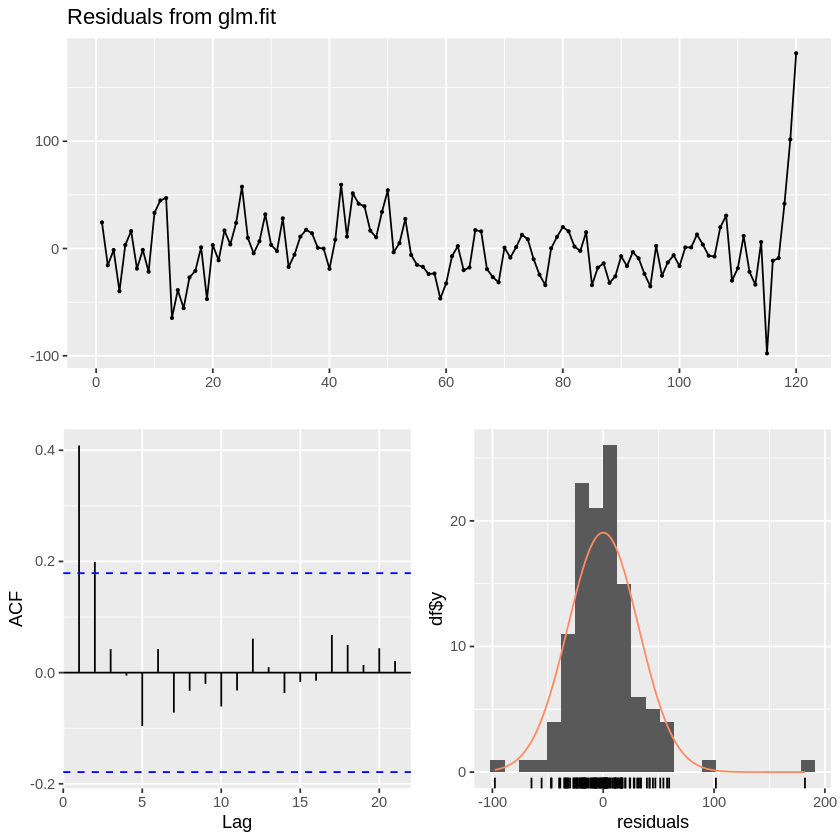

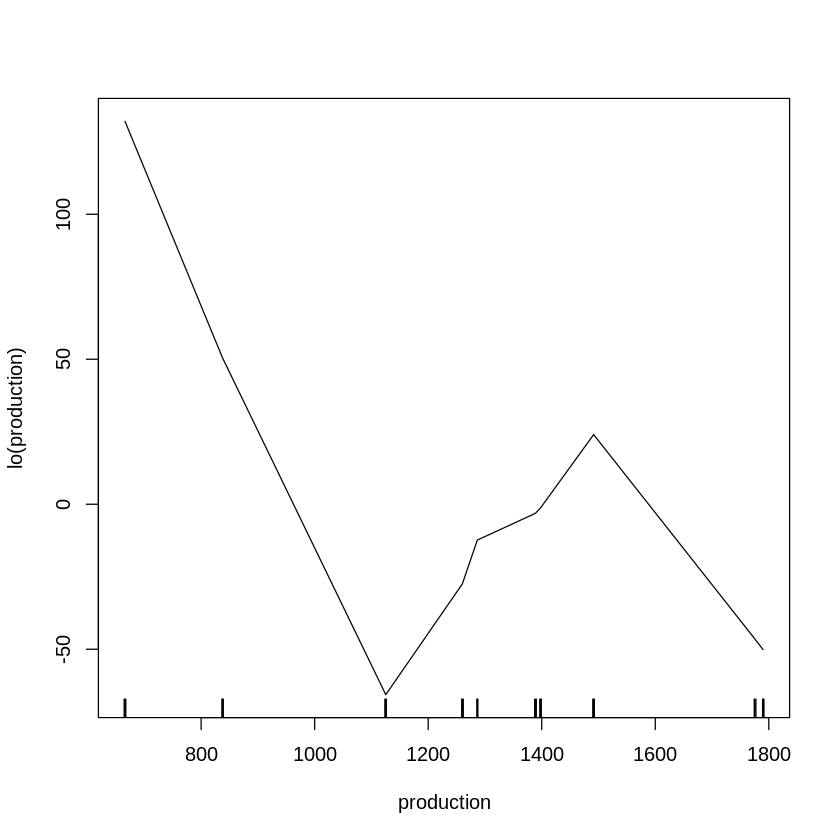

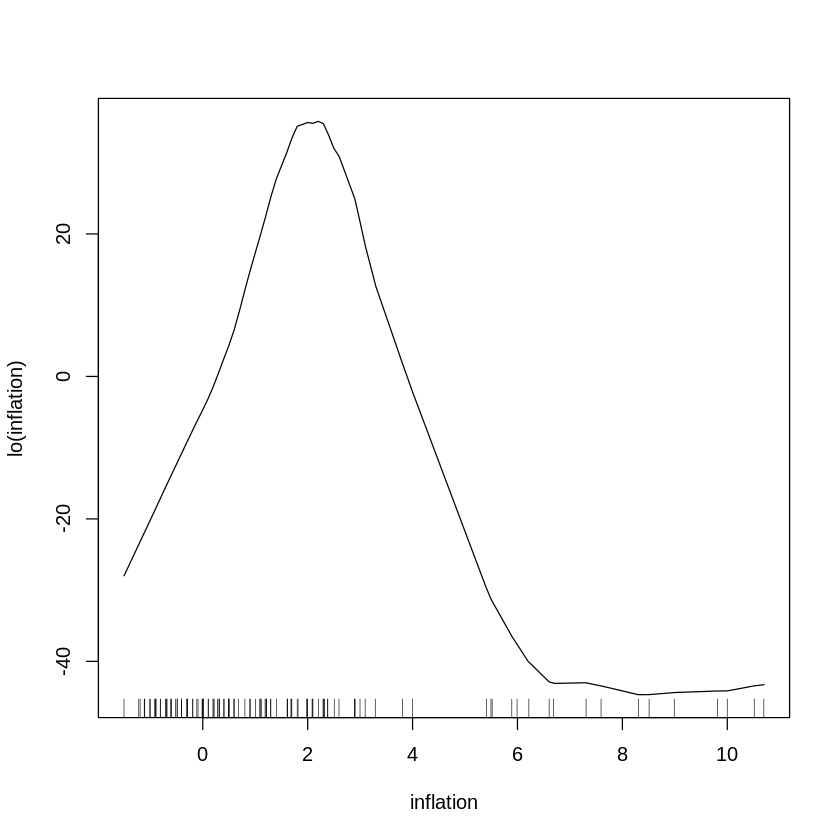

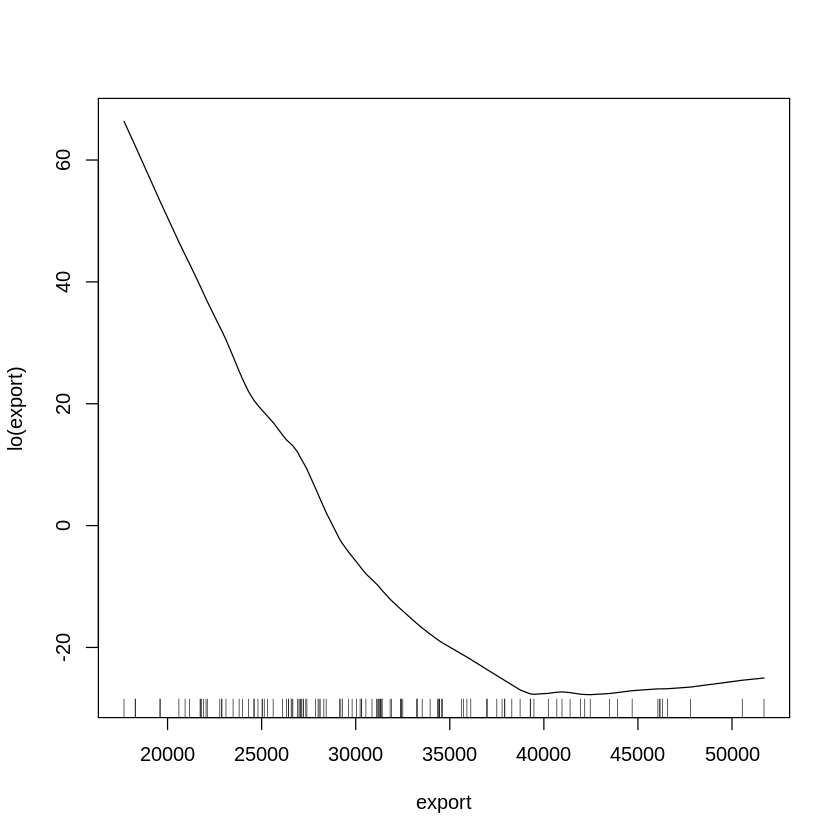

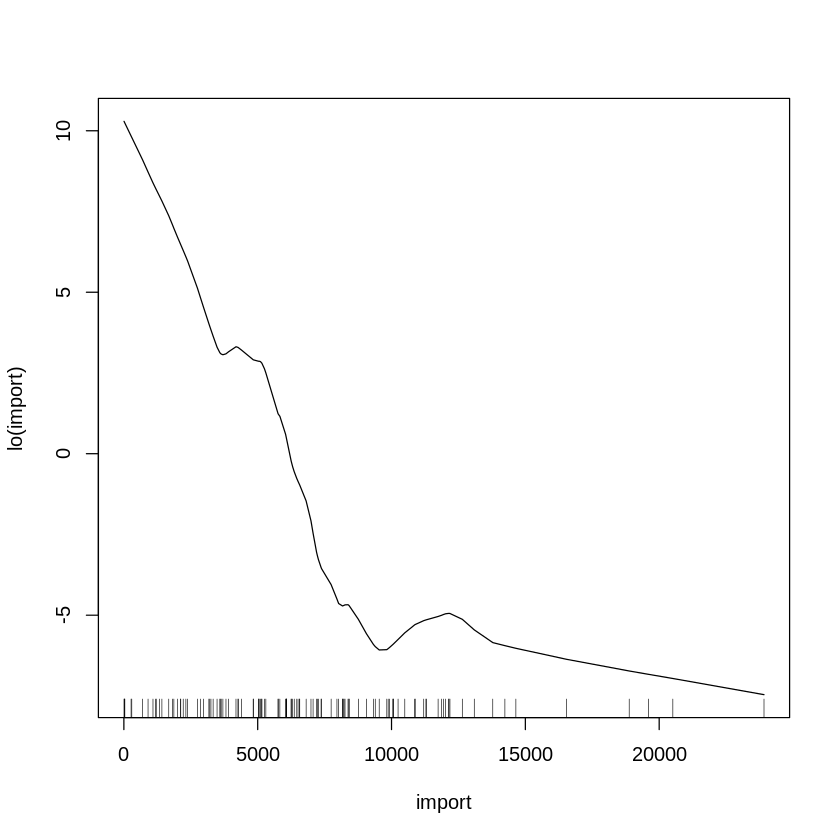

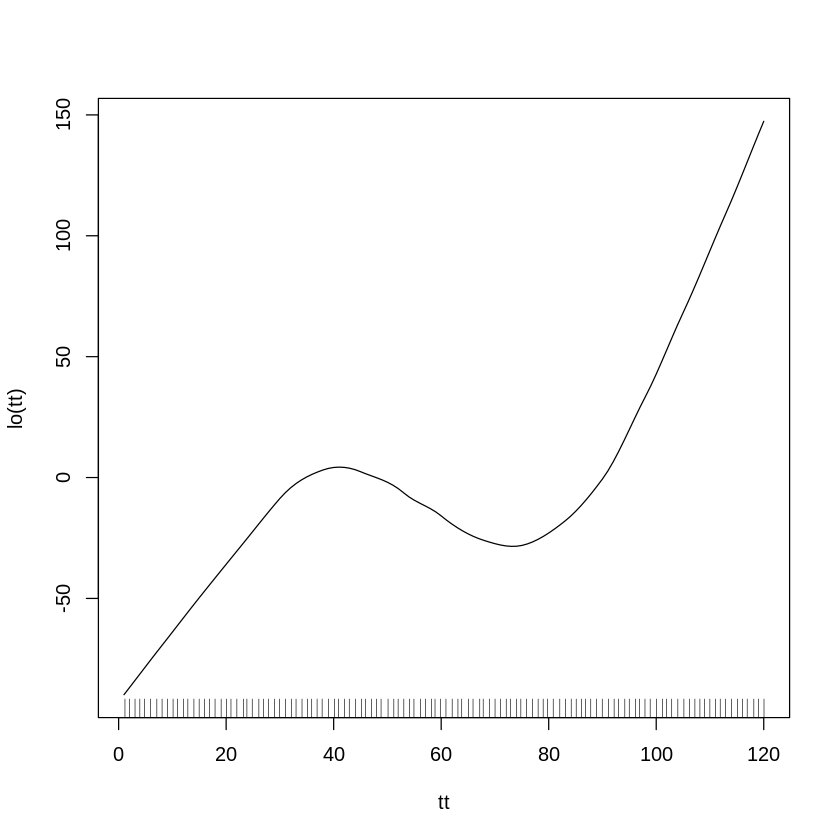

In [56]:
g <- gam(price ~ lo(production) + lo(inflation) + lo(export) + lo(import) + lo(tt))
summary(g)

print(paste("AIC = ", AIC(g)))
print(paste("residuals mean = ", mean(residuals(g))))

plot(price_ts, type='l', ylab="Price (€/100kg)", xlab='Year')
lines(as.yearmon(time(price_ts)), fitted(fit), col=2)

tsdisplay(residuals(g), plot.type='histogram')
checkresiduals(g, test="LB")
dwtest(g)

plot(g)

Splines

The gam function from the gam library does not estimate the smoothing splines parameters, instead it sets them at the default values if not specified.

That is why for the gam with smoothing splines we'll use the mgcv library.
Remember to remove this library and restart the run time if you want to use the gam library (issues may arise because both libraries have functions with same name)

In [57]:
library(mgcv)

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:forecast’:

    getResponse


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.


Attaching package: ‘mgcv’


The following objects are masked from ‘package:gam’:

    gam, gam.control, gam.fit, s





Family: gaussian 
Link function: identity 

Formula:
price ~ s(production) + s(inflation) + s(export) + s(import) + 
    s(tt)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   327.41       1.91   171.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                edf Ref.df      F  p-value    
s(production) 1.967  2.308  2.629 0.072504 .  
s(inflation)  5.348  6.483  4.851 0.000171 ***
s(export)     3.142  3.963  5.632 0.000480 ***
s(import)     4.248  5.265  2.211 0.057389 .  
s(tt)         8.871  8.983 69.377  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.966   Deviance explained = 97.3%
GCV = 550.59  Scale est. = 437.83    n = 120

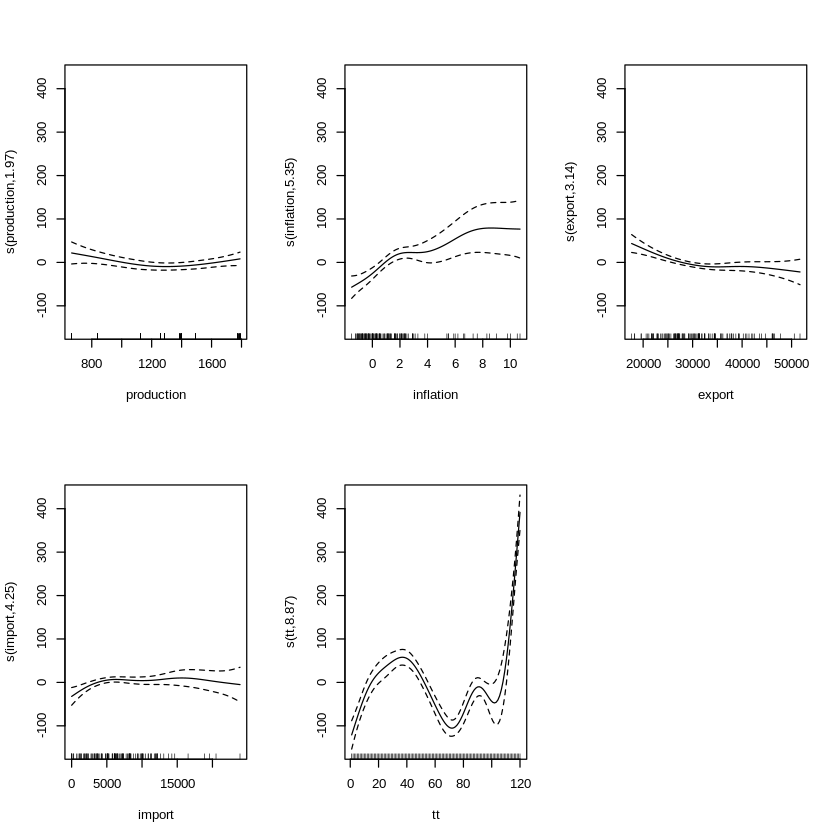

[1] "AIC =  1094.01819729749"
[1] "residuals mean =  4.99748419729995e-13"


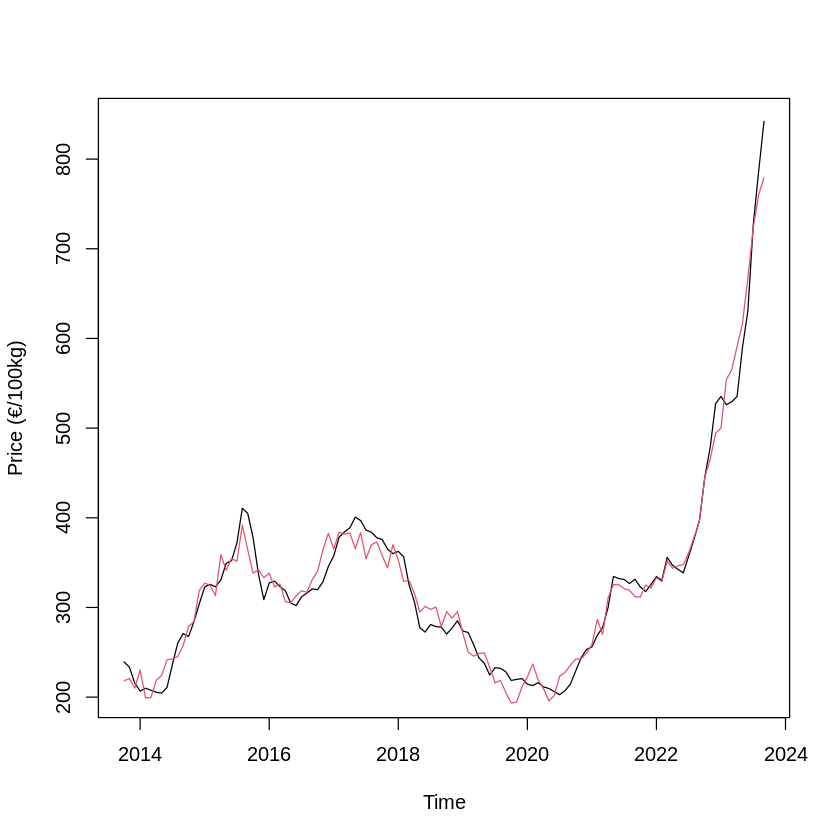

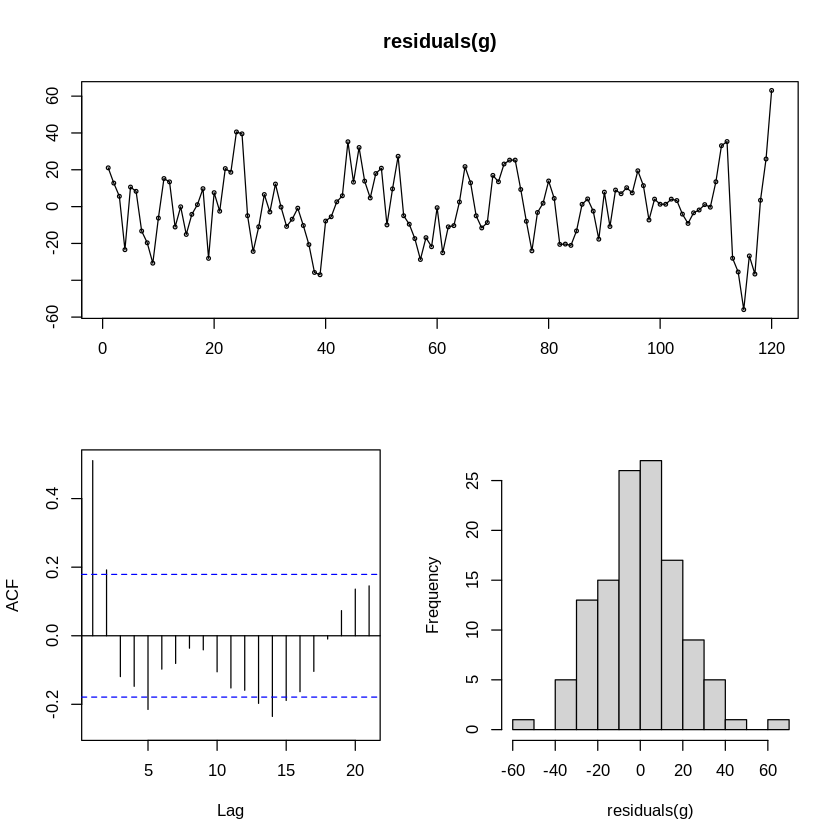


	Ljung-Box test

data:  Residuals from GCV
Q* = 50.988, df = 10, p-value = 1.755e-07

Model df: 0.   Total lags used: 10




	Durbin-Watson test

data:  g
DW = 0.71294, p-value = 2.773e-14
alternative hypothesis: true autocorrelation is greater than 0


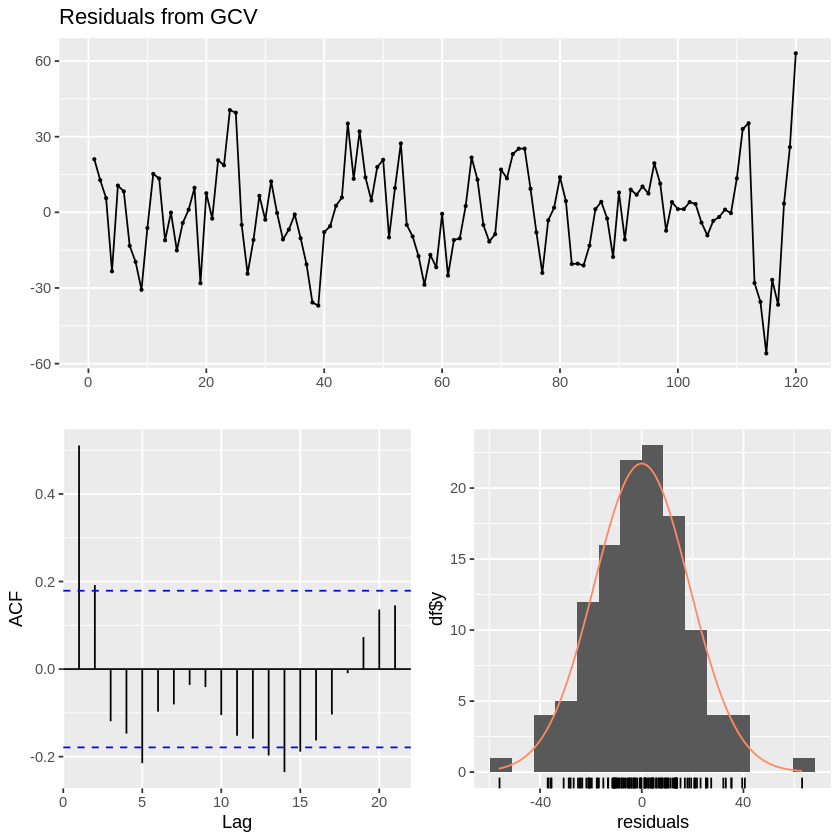

In [58]:
g <- gam(price ~ s(production) + s(inflation) + s(export) + s(import) + s(tt))
summary(g)
plot(g, pages=1, all.terms = TRUE)

plot(price_ts, type="l", ylab="Price (€/100kg)")
lines(as.yearmon(time(price_ts)), fitted(g),col=2)

print(paste("AIC = ", AIC(g)))
print(paste("residuals mean = ", mean(residuals(g))))

tsdisplay(residuals(g), plot.type='histogram')
checkresiduals(g, test="LB")
dwtest(g)


Family: gaussian 
Link function: identity 

Formula:
price ~ production + s(inflation) + s(export) + s(import) + s(tt)

Parametric coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 330.789471  16.778034  19.716   <2e-16 ***
production   -0.002598   0.012799  -0.203     0.84    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
               edf Ref.df      F  p-value    
s(inflation) 5.356  6.493  4.580 0.000294 ***
s(export)    3.401  4.278  5.272 0.000541 ***
s(import)    4.628  5.699  2.435 0.035254 *  
s(tt)        8.842  8.980 96.848  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.964   Deviance explained = 97.1%
GCV = 577.87  Scale est. = 461.2     n = 120

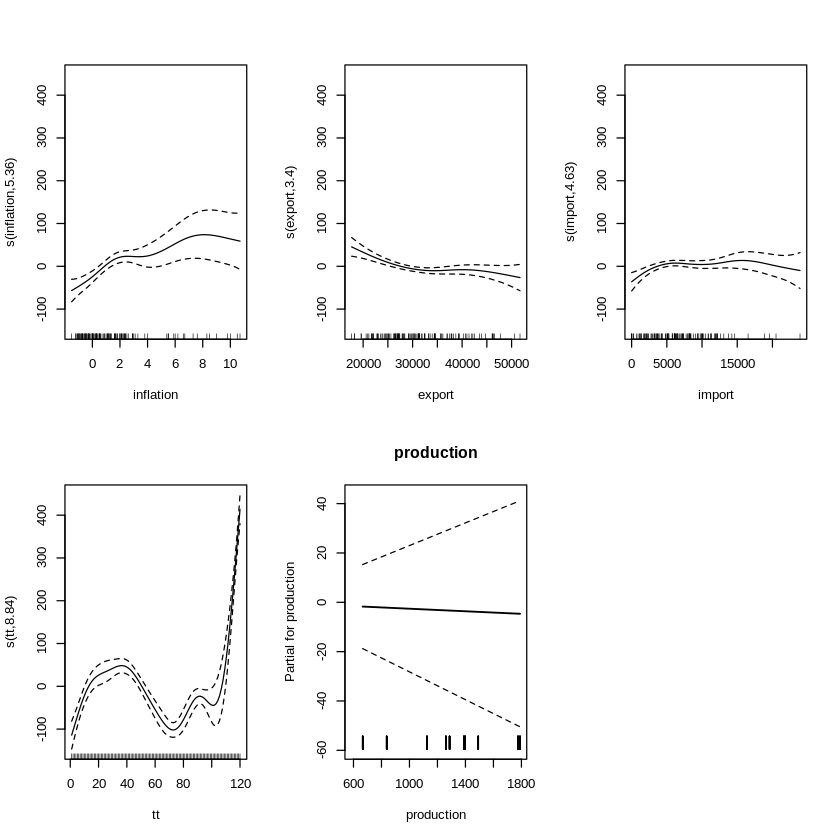

[1] "AIC =  1099.99764909616"
[1] "residuals mean =  4.57279251501556e-11"


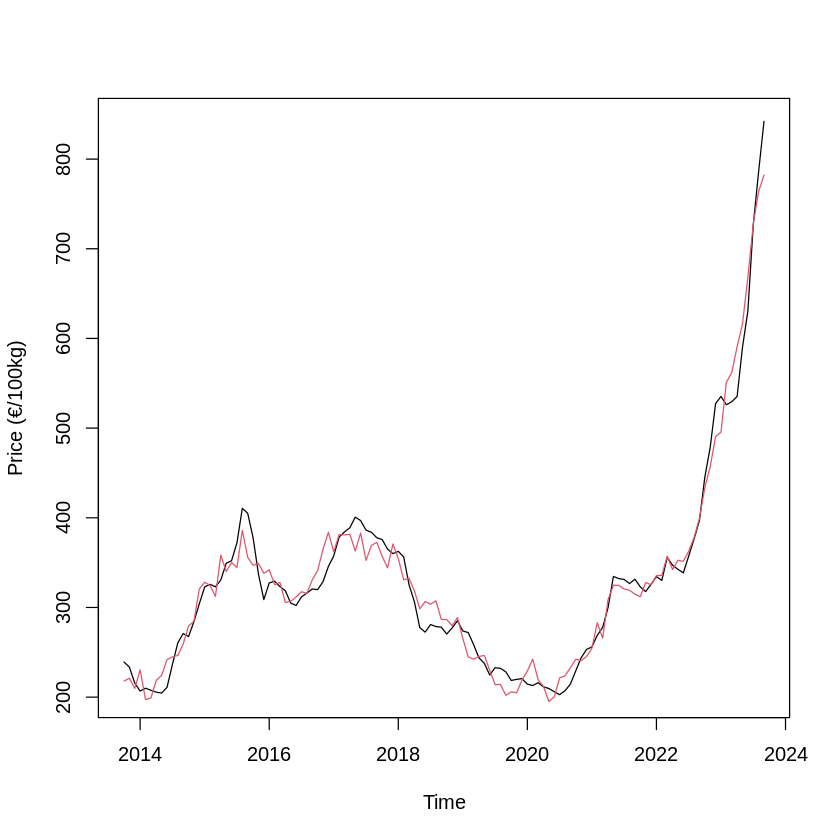

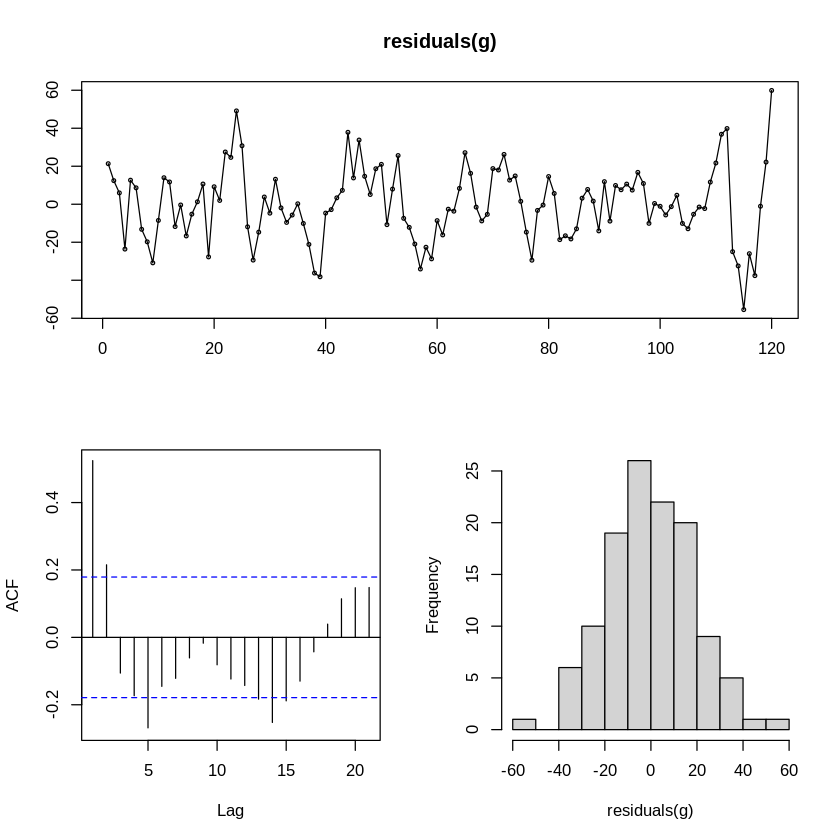


	Ljung-Box test

data:  Residuals from GCV
Q* = 59.972, df = 10, p-value = 3.669e-09

Model df: 0.   Total lags used: 10




	Durbin-Watson test

data:  g
DW = 0.71294, p-value = 2.773e-14
alternative hypothesis: true autocorrelation is greater than 0


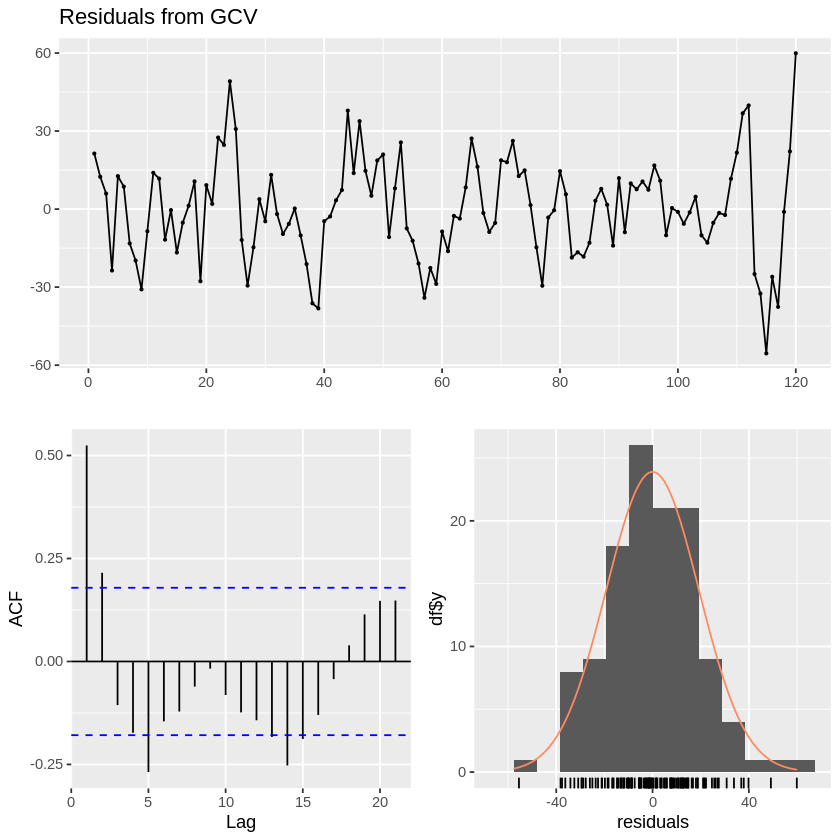

In [59]:
g <- gam(price ~ production + s(inflation) + s(export) + s(import) + s(tt))
summary(g)
plot(g, pages=1, all.terms = TRUE)

plot(price_ts, type="l", ylab="Price (€/100kg)")
lines(as.yearmon(time(price_ts)), fitted(g),col=2)

print(paste("AIC = ", AIC(g)))
print(paste("residuals mean = ", mean(residuals(g))))

tsdisplay(residuals(g), plot.type='histogram')
checkresiduals(g, test="LB")
dwtest(g)


Family: gaussian 
Link function: identity 

Formula:
price ~ production + s(inflation) + export + import + s(tt)

Parametric coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.941e+02  2.258e+01  17.455  < 2e-16 ***
production  -1.505e-02  1.369e-02  -1.099 0.274215    
export      -1.858e-03  4.961e-04  -3.745 0.000298 ***
import       1.612e-03  7.094e-04   2.272 0.025176 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
               edf Ref.df      F p-value    
s(inflation) 4.814  5.932  3.557 0.00308 ** 
s(tt)        8.781  8.971 85.313 < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.955   Deviance explained = 96.1%
GCV = 676.57  Scale est. = 577.37    n = 120

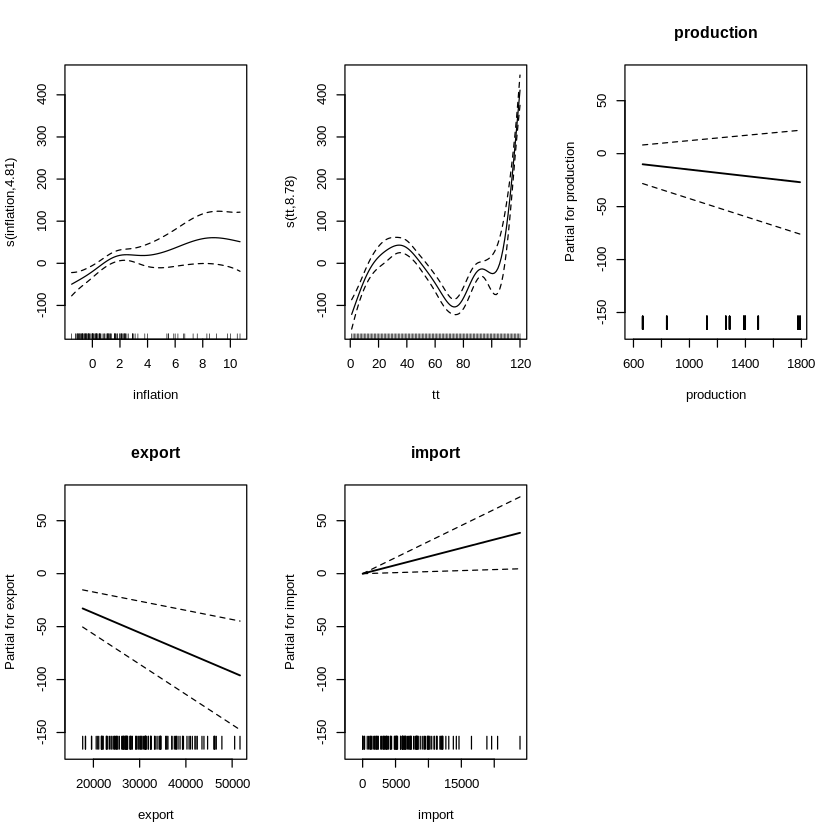

[1] "AIC =  1121.7259469853"
[1] "residuals mean =  3.24954473052141e-13"


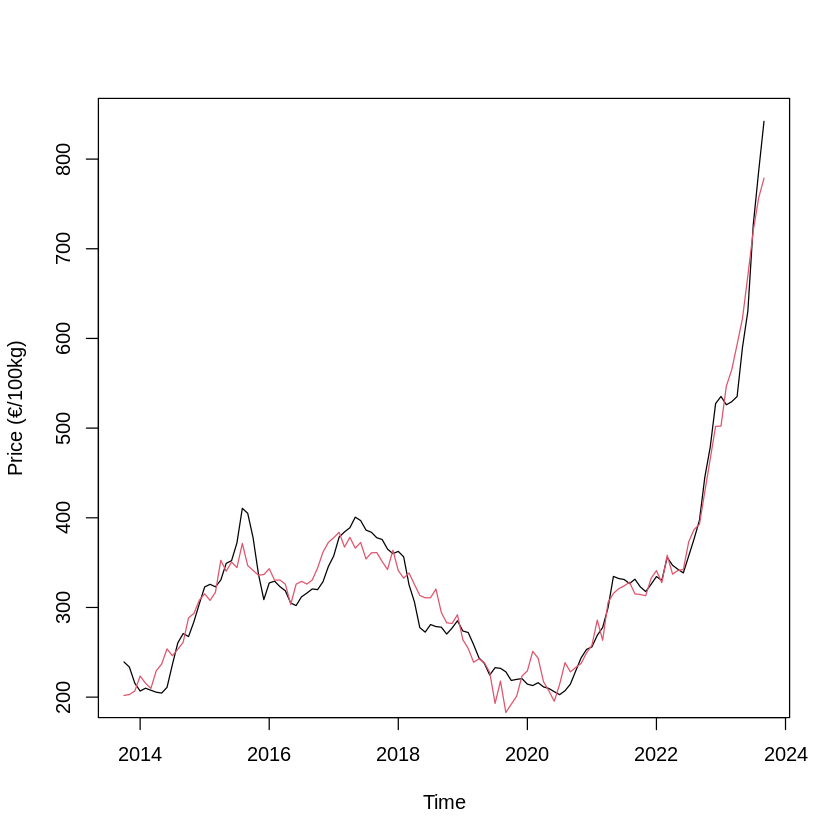

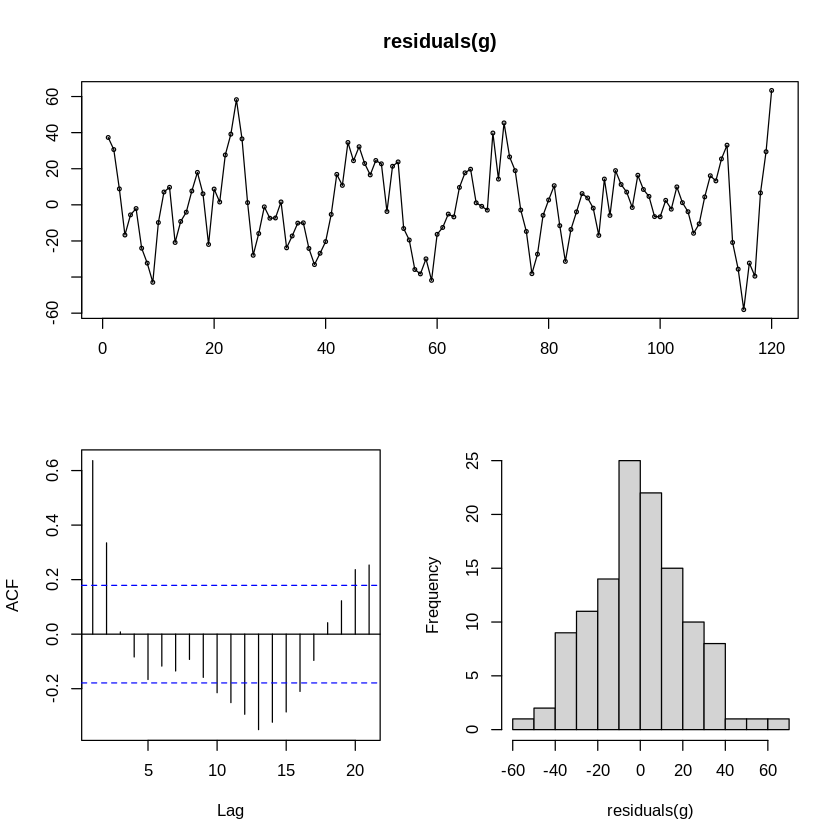


	Ljung-Box test

data:  Residuals from GCV
Q* = 82.821, df = 10, p-value = 1.402e-13

Model df: 0.   Total lags used: 10




	Durbin-Watson test

data:  g
DW = 0.71294, p-value = 2.773e-14
alternative hypothesis: true autocorrelation is greater than 0


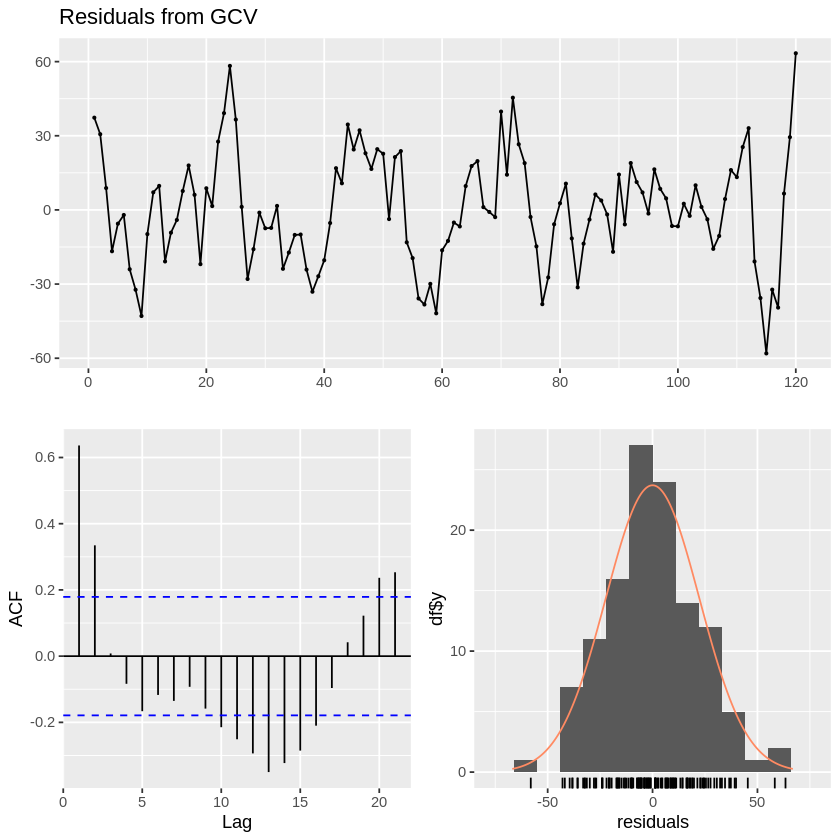

In [60]:
g <- gam(price ~ production + s(inflation) + export + import + s(tt))
summary(g)
plot(g, pages=1, all.terms = TRUE)

plot(price_ts, type="l", ylab="Price (€/100kg)")
lines(as.yearmon(time(price_ts)), fitted(g),col=2)

print(paste("AIC = ", AIC(g)))
print(paste("residuals mean = ", mean(residuals(g))))

tsdisplay(residuals(g), plot.type='histogram')
checkresiduals(g, test="LB")
dwtest(g)


Family: gaussian 
Link function: identity 

Formula:
price ~ s(production) + s(inflation) + export + import + s(tt)

Parametric coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.705e+02  1.528e+01  24.257  < 2e-16 ***
export      -1.662e-03  4.722e-04  -3.520 0.000653 ***
import       1.292e-03  6.930e-04   1.865 0.065190 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                edf Ref.df      F p-value    
s(production) 3.836  4.517  3.560 0.02964 *  
s(inflation)  5.038  6.163  3.713 0.00205 ** 
s(tt)         8.673  8.938 32.748 < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Rank: 29/30
R-sq.(adj) =   0.96   Deviance explained = 96.7%
GCV = 615.69  Scale est. = 510.27    n = 120

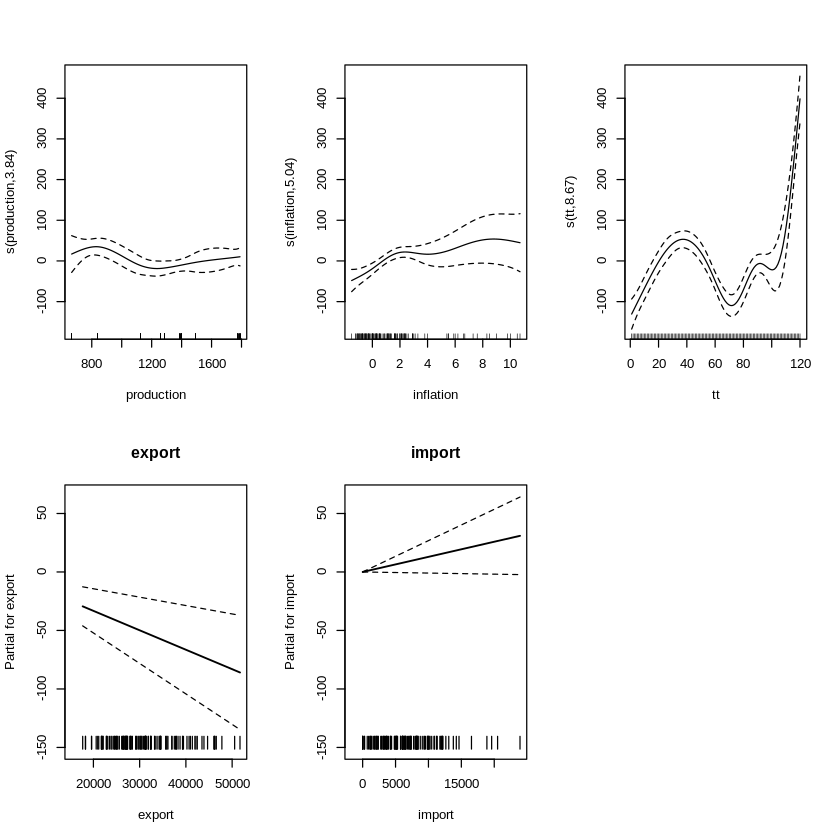

[1] "AIC =  1109.29464344161"
[1] "residuals mean =  -3.24791456461175e-11"


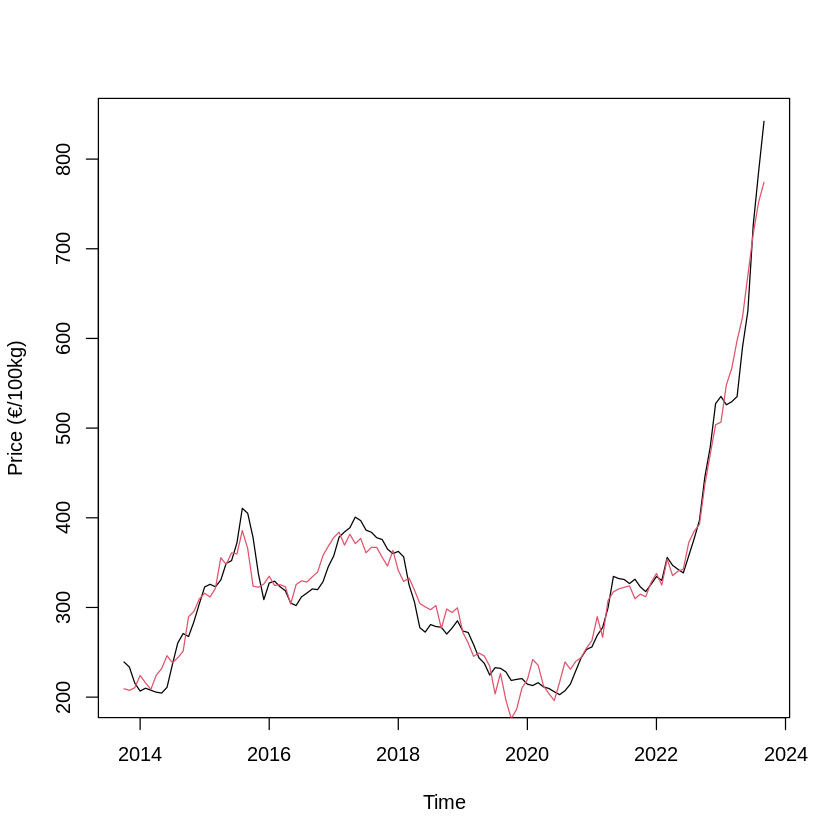

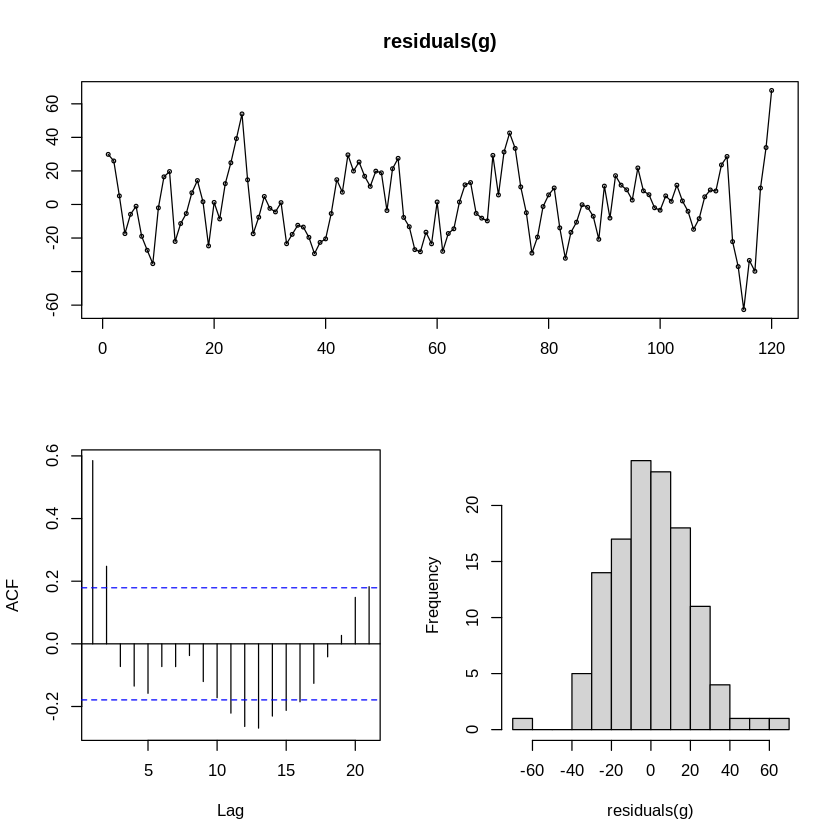


	Ljung-Box test

data:  Residuals from GCV
Q* = 63.171, df = 10, p-value = 9.059e-10

Model df: 0.   Total lags used: 10




	Durbin-Watson test

data:  g
DW = 0.71294, p-value = 2.773e-14
alternative hypothesis: true autocorrelation is greater than 0


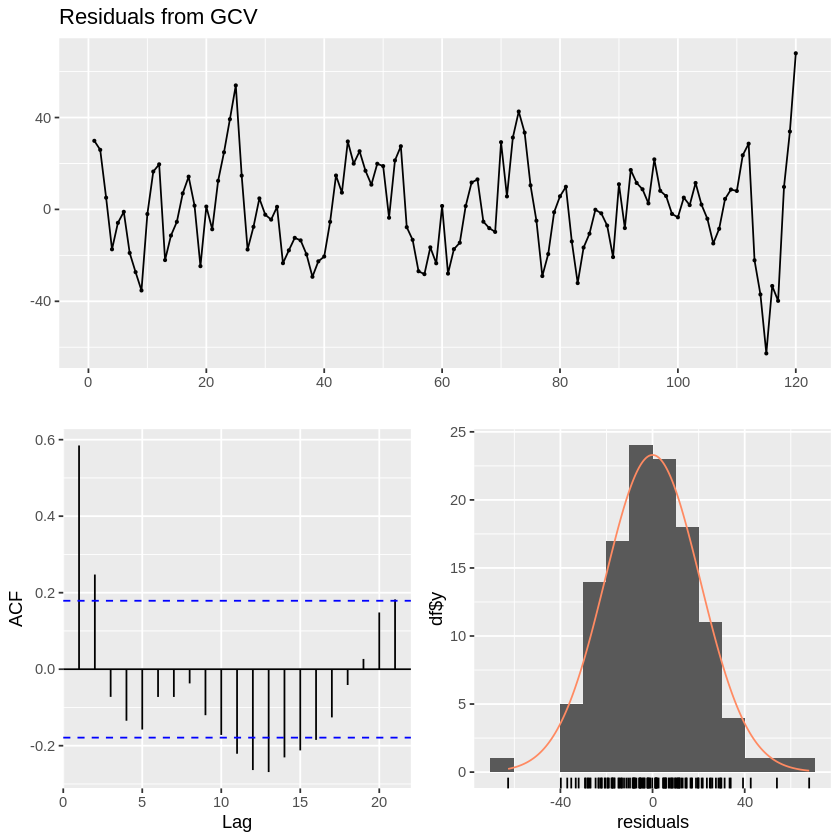

In [61]:
g <- gam(price ~ s(production) + s(inflation) + export + import + s(tt))
summary(g)
plot(g, pages=1, all.terms = TRUE)

plot(price_ts, type="l", ylab="Price (€/100kg)")
lines(as.yearmon(time(price_ts)), fitted(g),col=2)

print(paste("AIC = ", AIC(g)))
print(paste("residuals mean = ", mean(residuals(g))))

tsdisplay(residuals(g), plot.type='histogram')
checkresiduals(g, test="LB")
dwtest(g)

In [62]:
#gam.check(g)

# ARIMA

In [64]:
# value.ts
# weekly_ts
# monthly_ts

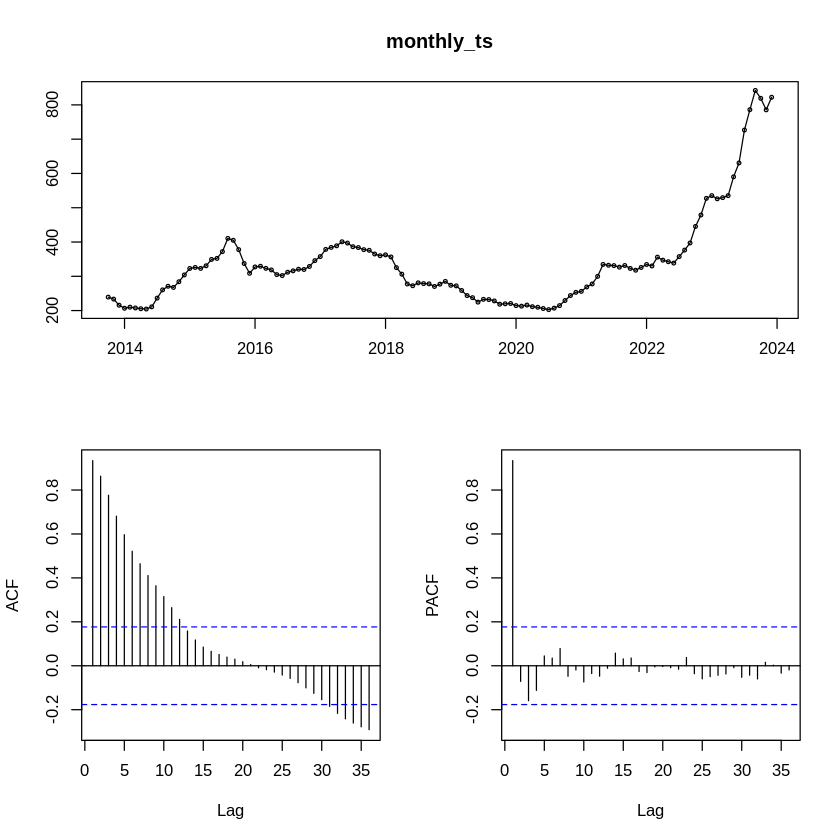

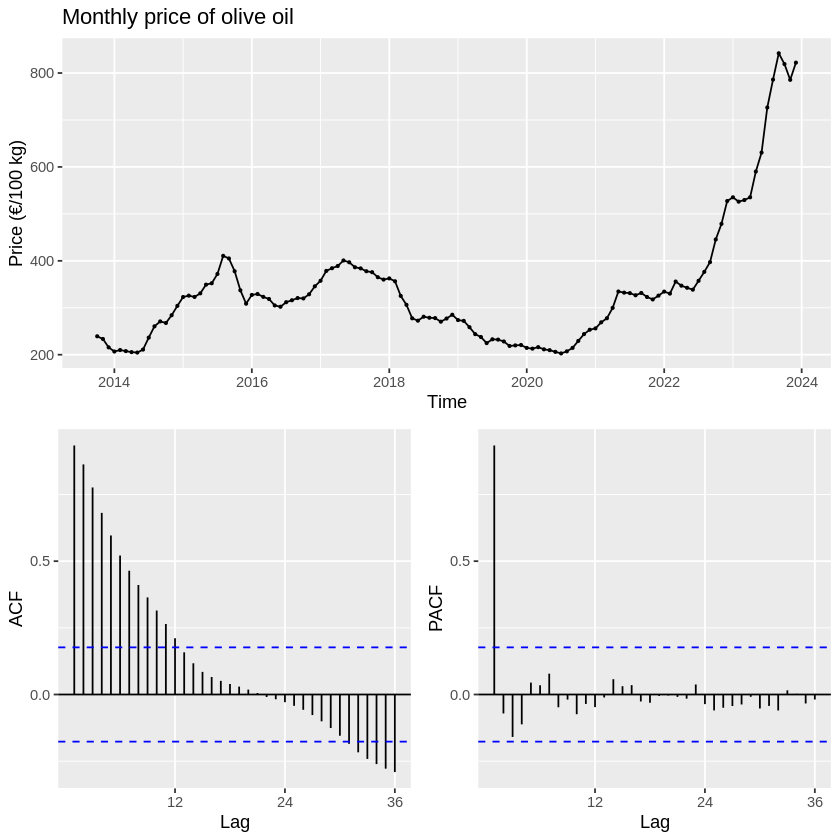

In [65]:
# plot(cons)
# Acf(cons)
# Pacf(cons)
m_data <- tsdisplay(monthly_ts)
ggtsdisplay(monthly_ts, xlab = "Time", ylab = "Price (€/100 kg)", main = "Monthly price of olive oil")

In [66]:
# Uniroot test for differenciate
summary(ur.kpss(monthly_ts))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 0.7562 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [67]:
# number of firts differentuatuin
ndiffs(monthly_ts)

[1] 2

In [68]:
# number seasonal differentuatuin
nsdiffs(monthly_ts)

[1] 0

**General indication:** if the ACF is exponentially decaying or sinusoidal and there is a significant spike at lag p in PACF and nothing else, it may be an ARMA(p,d,0).

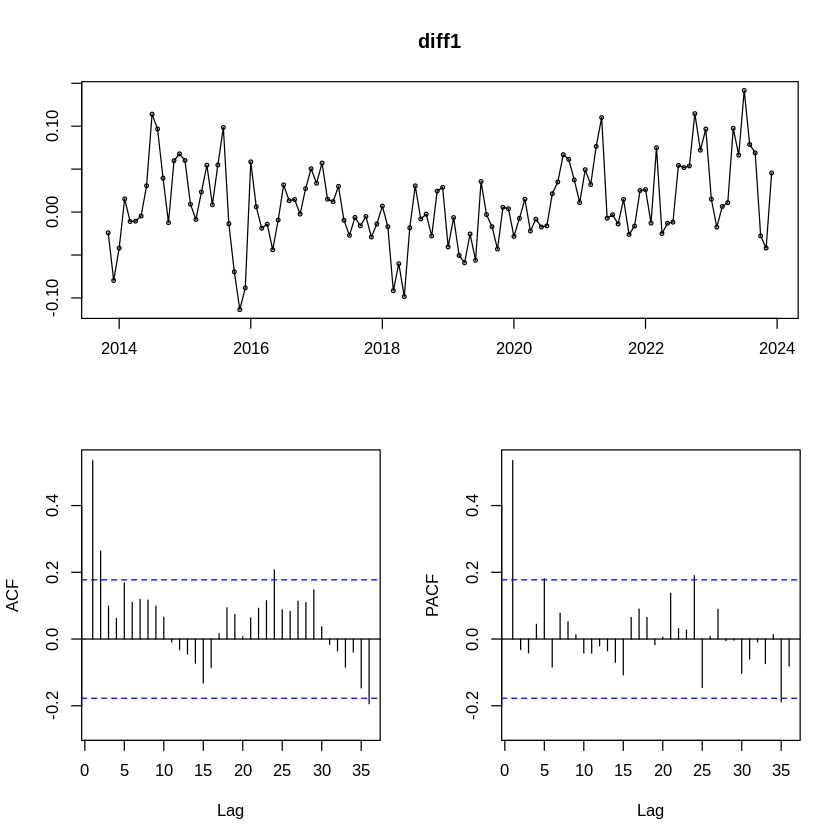

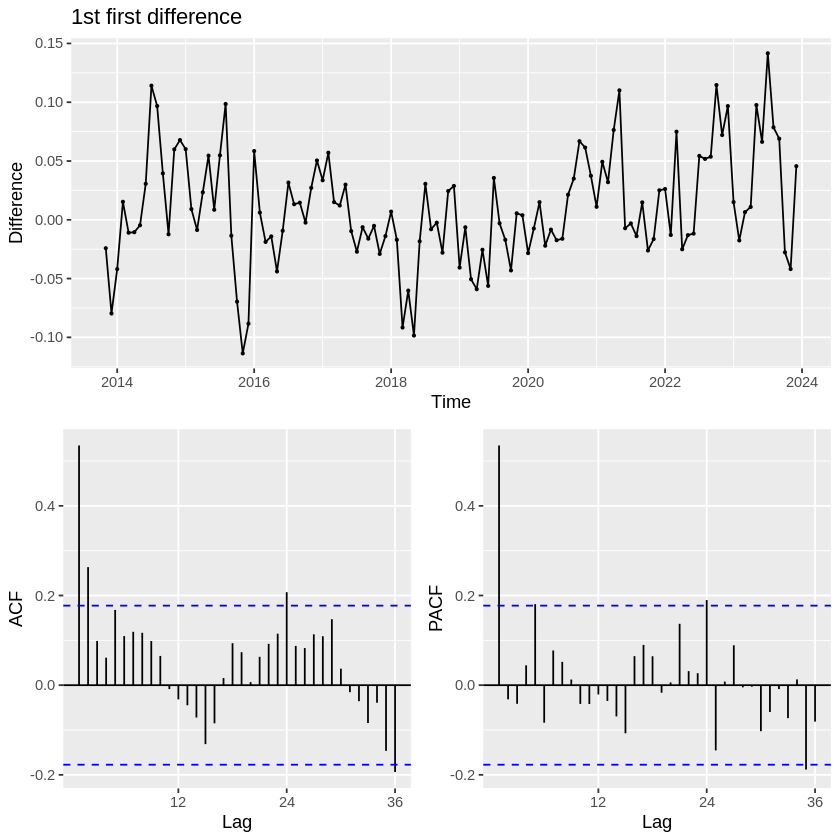


	Ljung-Box test

data:  Residuals
Q* = 74.277, df = 24, p-value = 4.831e-07

Model df: 0.   Total lags used: 24



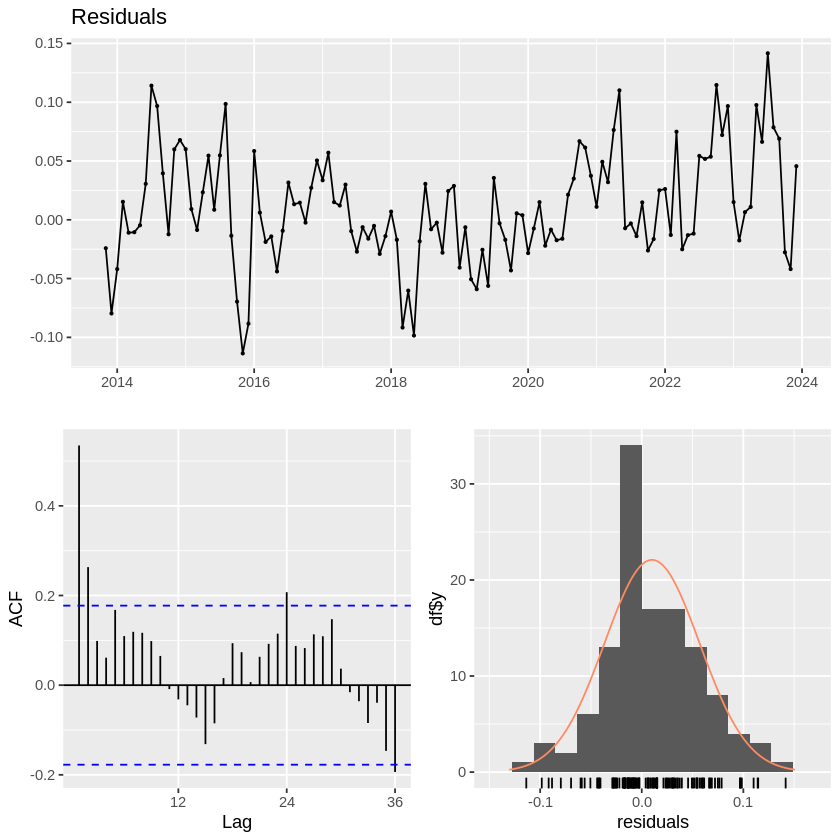

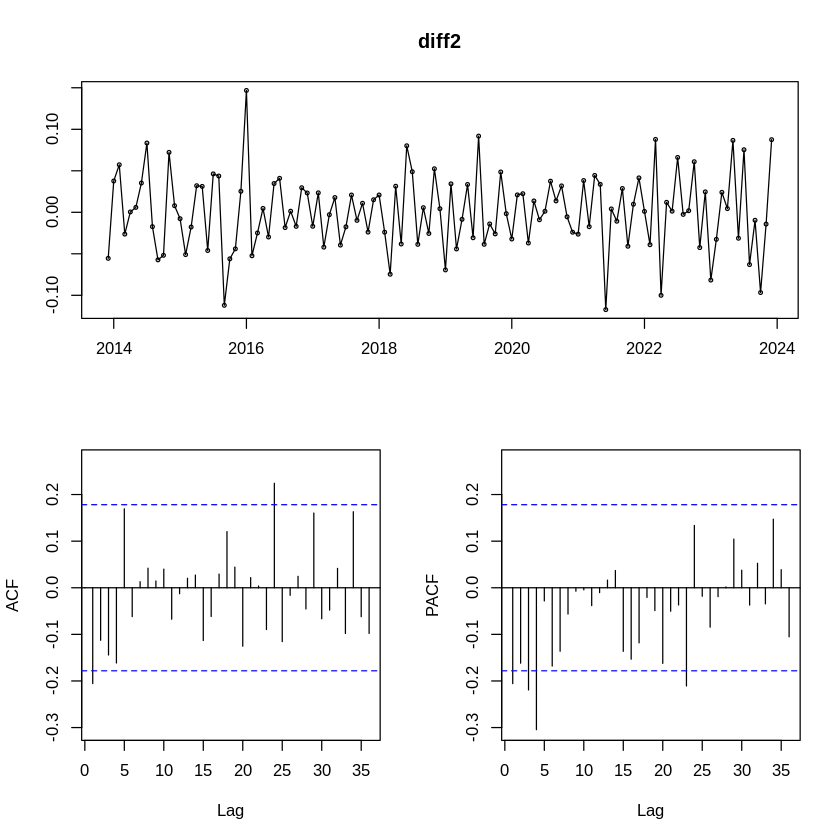

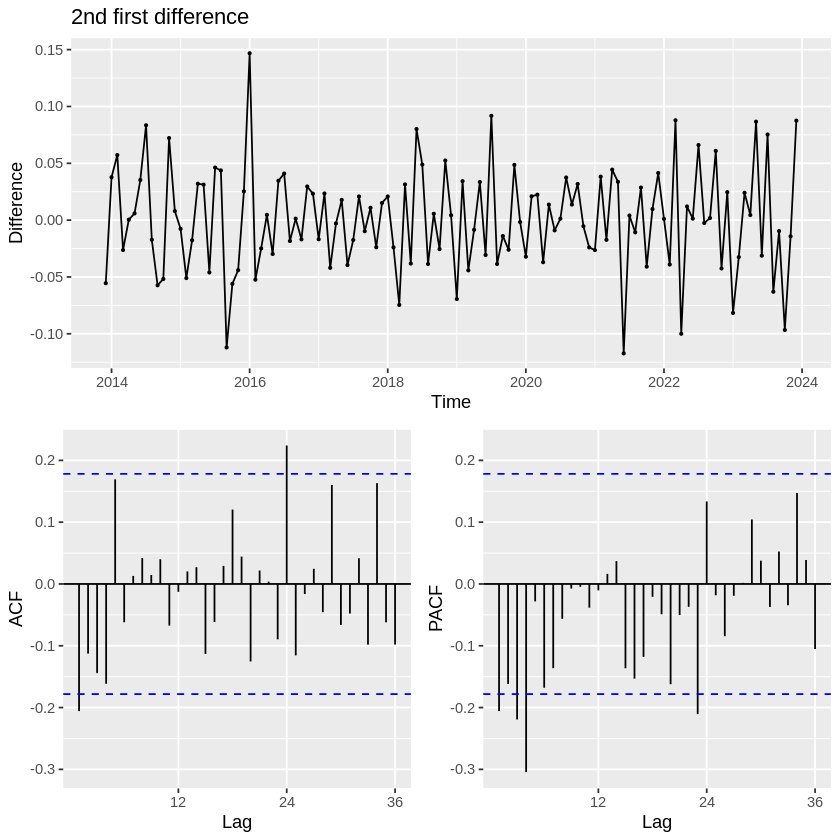


	Ljung-Box test

data:  Residuals
Q* = 34.402, df = 24, p-value = 0.07778

Model df: 0.   Total lags used: 24



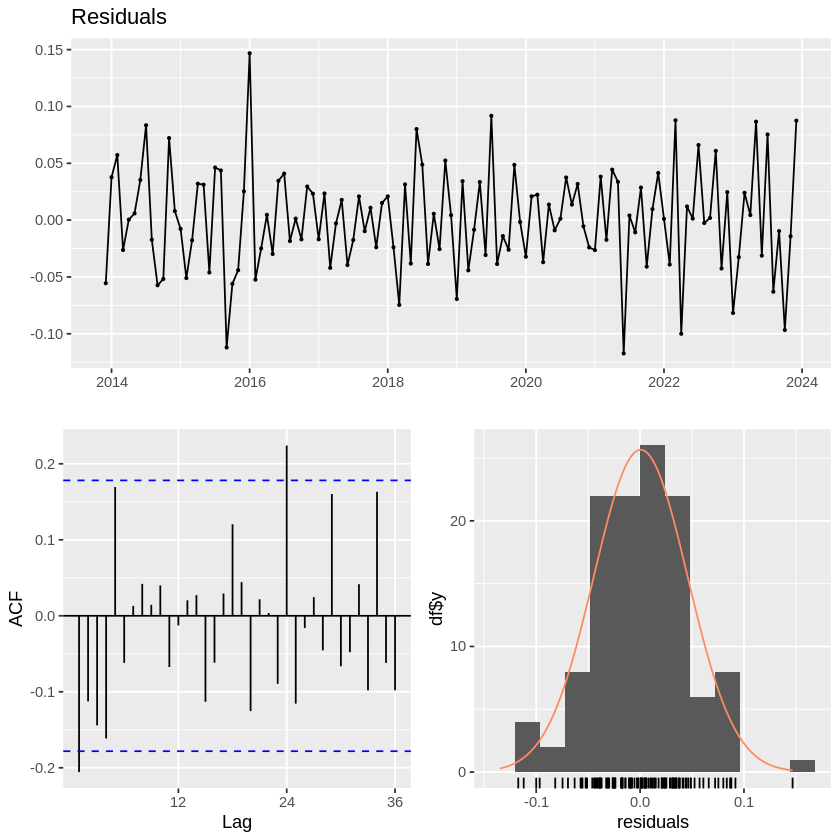

In [69]:
##first difference
diff1<- diff(log(monthly_ts))
tsdisplay(diff1)
ggtsdisplay(diff1, xlab = "Time", ylab = "Difference", main = "1st first difference")
checkresiduals(diff1)

diff2 <- diff(diff1)
tsdisplay(diff2)
ggtsdisplay(diff2, xlab = "Time", ylab = "Difference", main = "2nd first difference")
checkresiduals(diff2)

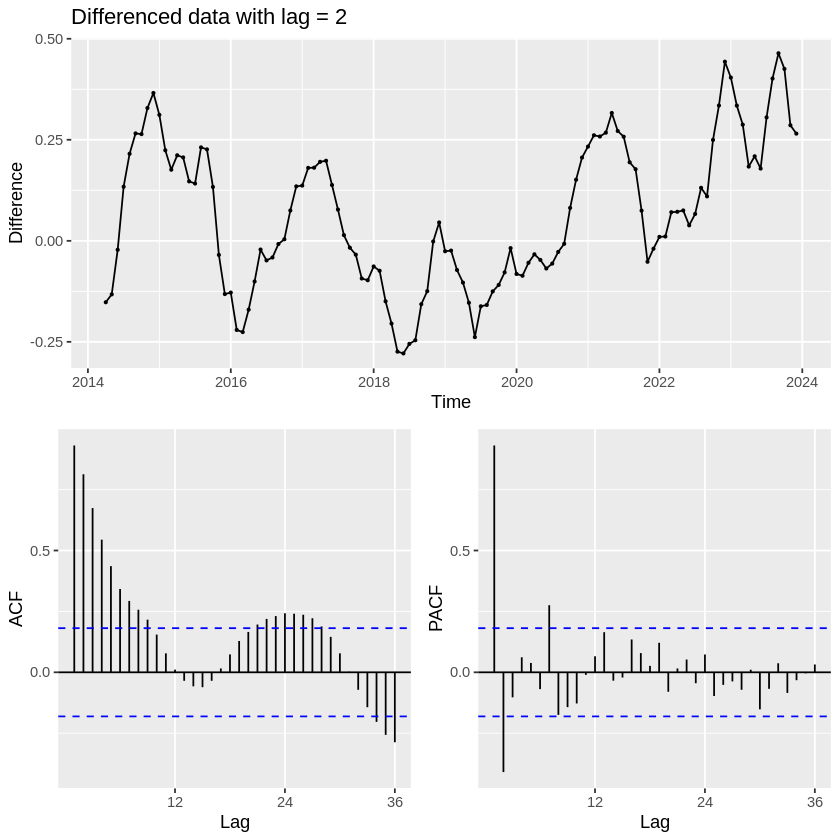


	Ljung-Box test

data:  Residuals
Q* = 372.47, df = 23, p-value < 2.2e-16

Model df: 0.   Total lags used: 23



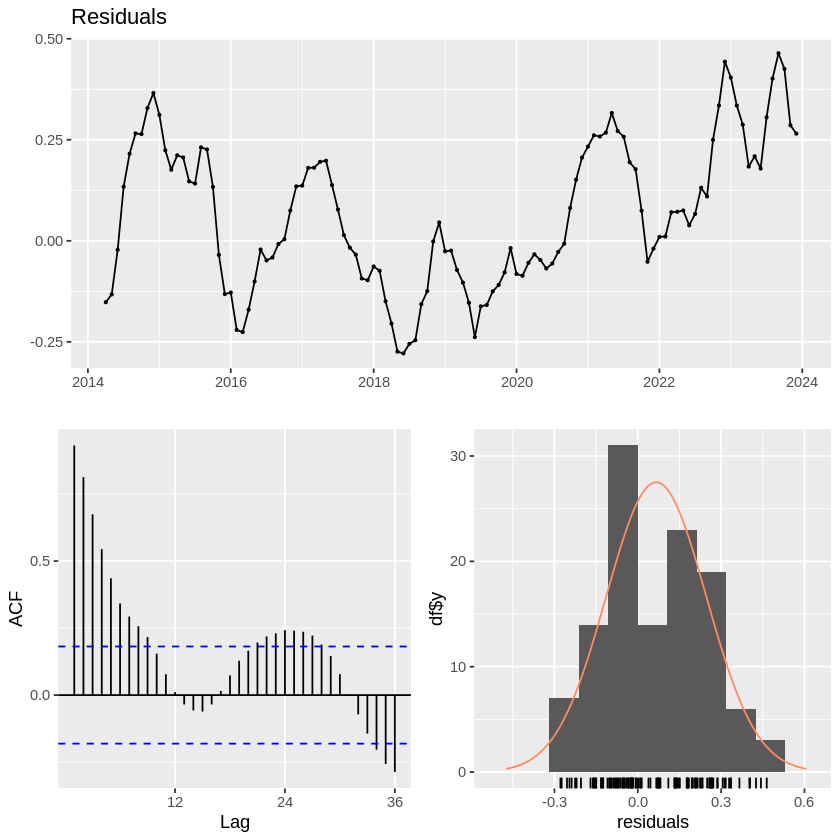

In [70]:
# ##first difference
# diff1<- diff(monthly_ts)
# tsdisplay(diff1)

##seasonal difference
m_log <- log(monthly_ts)
diff2 <- diff(m_log, lag=6)
# tsdisplay(m_log)
ggtsdisplay(diff2, xlab = "Time", ylab = "Difference", main = "Differenced data with lag = 2")
checkresiduals(diff2)

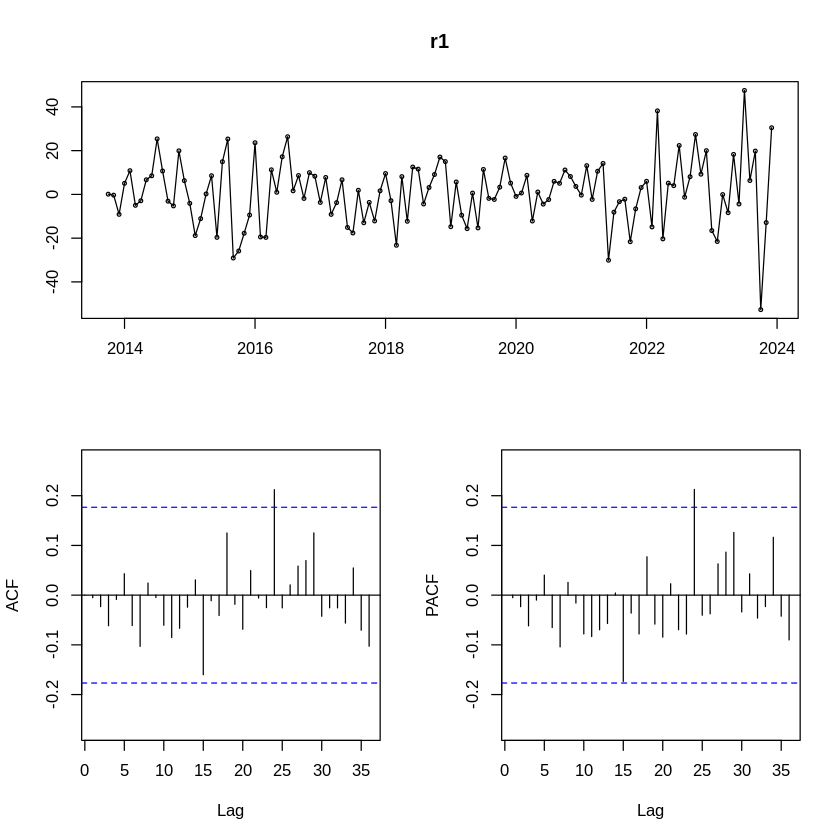


	Ljung-Box test

data:  Residuals from ARIMA(4,2,5)
Q* = 19.506, df = 15, p-value = 0.1917

Model df: 9.   Total lags used: 24



[1] 1018.02

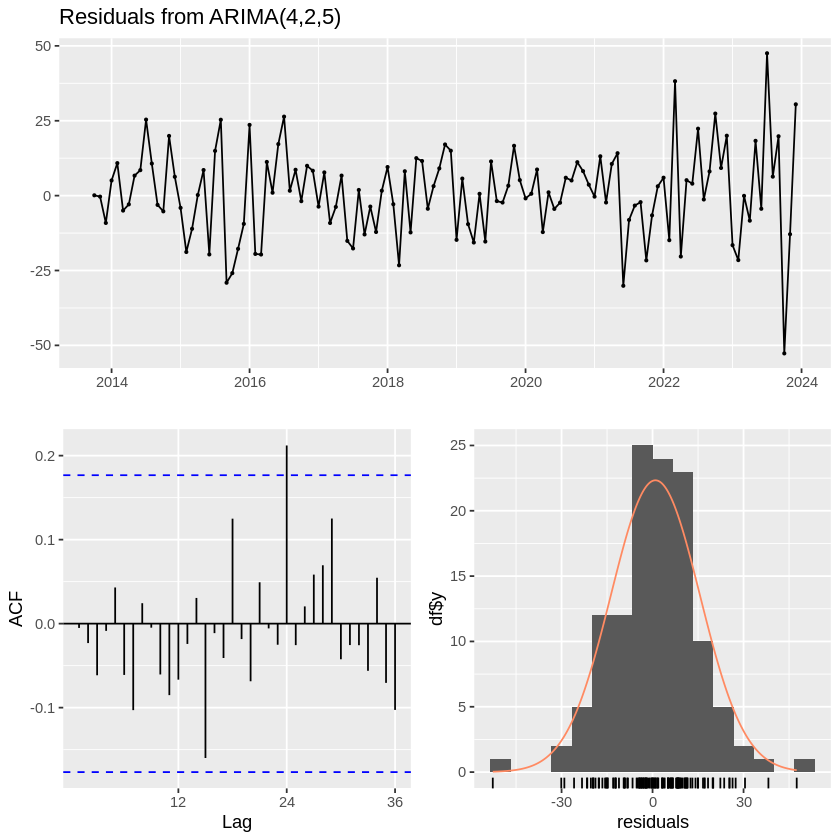

In [71]:
#Manual Arima model based on theory (p,d,q)
a1<- Arima(monthly_ts, order=c(4,2,5)) #, seasonal=c(02,0,0))
fit1<- fitted(a1)

# plot(monthly_ts)
# lines(fit1, col=2)

# f1<- forecast(a1)
# plot(f1)

r1<- residuals(a1)
tsdisplay(r1)

checkresiduals(a1)
AIC(a1)

In [72]:
#Auto Arima model

auto.ar<- auto.arima(monthly_ts, seasonal=FALSE, stepwise = FALSE, approximation = FALSE)
auto.ar

Series: monthly_ts 
ARIMA(3,2,2) 

Coefficients:
         ar1      ar2      ar3      ma1     ma2
      1.0820  -0.4527  -0.2682  -1.5334  0.7609
s.e.  0.1428   0.1523   0.1118   0.1236  0.1253

sigma^2 = 242.9:  log likelihood = -502.55
AIC=1017.1   AICc=1017.83   BIC=1033.87

In [73]:
summary(auto.ar)

Series: monthly_ts 
ARIMA(3,2,2) 

Coefficients:
         ar1      ar2      ar3      ma1     ma2
      1.0820  -0.4527  -0.2682  -1.5334  0.7609
s.e.  0.1428   0.1523   0.1118   0.1236  0.1253

sigma^2 = 242.9:  log likelihood = -502.55
AIC=1017.1   AICc=1017.83   BIC=1033.87

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 1.035645 15.13558 11.40594 0.3633708 3.298093 0.1233493
                     ACF1
Training set -0.003303788


	Ljung-Box test

data:  Residuals from ARIMA(3,2,2)
Q* = 22.141, df = 19, p-value = 0.2773

Model df: 5.   Total lags used: 24



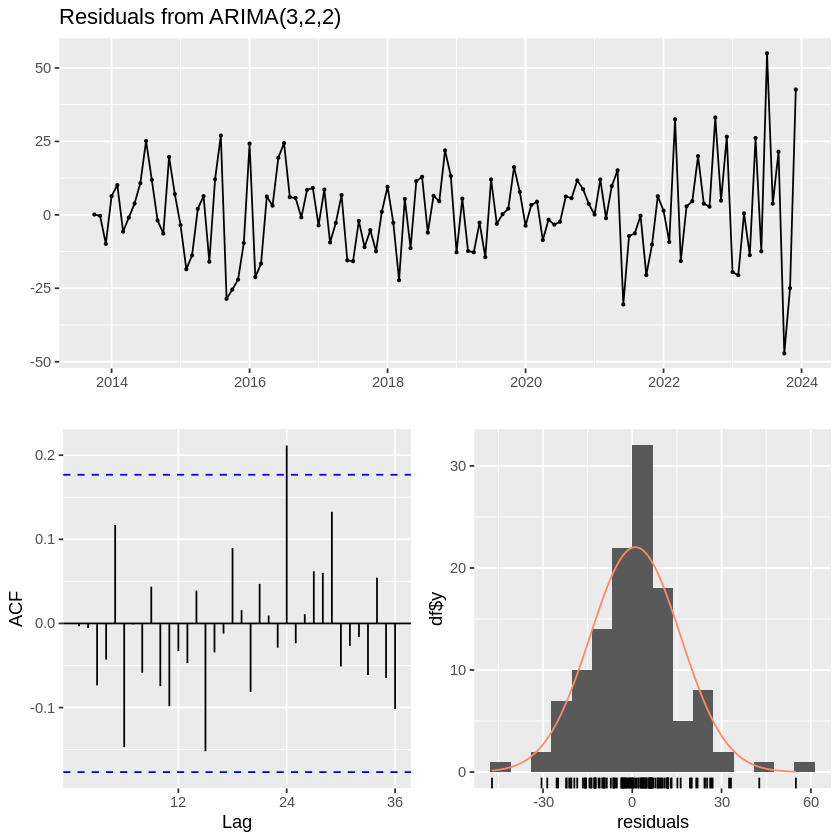

In [74]:
checkresiduals(auto.ar)

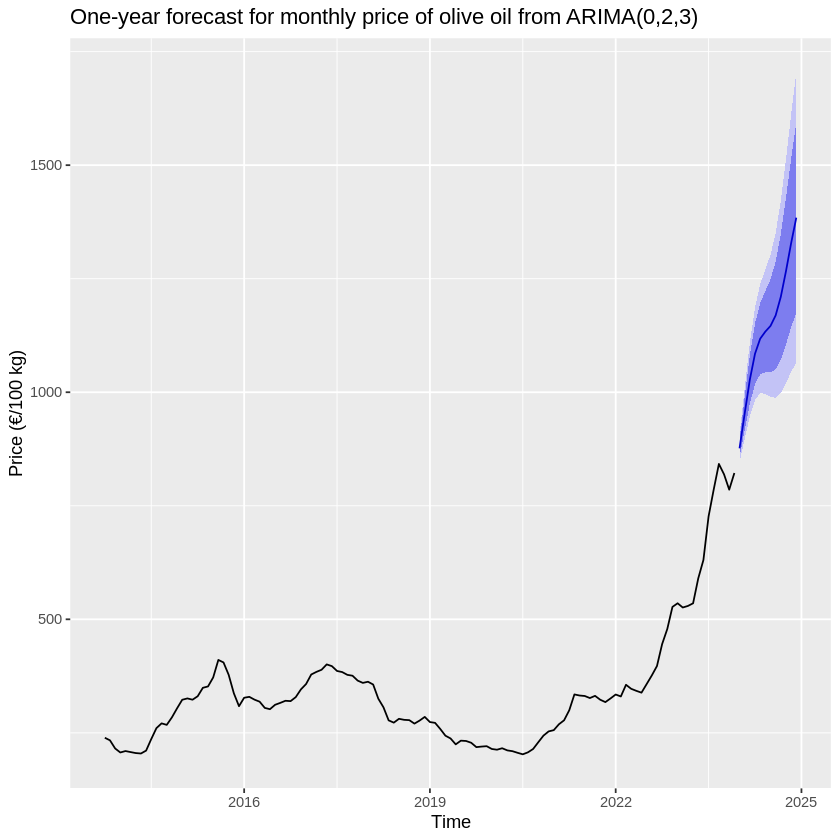

In [75]:
autoplot(forecast(auto.ar, h = 12), xlab = "Time", ylab = "Price (€/100 kg)", main = "One-year forecast for monthly price of olive oil from ARIMA(0,2,3)")

In [76]:
#Auto Arima model

auto.a<- auto.arima(monthly_ts)
auto.a

Series: monthly_ts 
ARIMA(3,2,2) 

Coefficients:
         ar1      ar2      ar3      ma1     ma2
      1.0820  -0.4527  -0.2682  -1.5334  0.7609
s.e.  0.1428   0.1523   0.1118   0.1236  0.1253

sigma^2 = 242.9:  log likelihood = -502.55
AIC=1017.1   AICc=1017.83   BIC=1033.87


	Ljung-Box test

data:  Residuals from ARIMA(3,2,2)
Q* = 22.141, df = 19, p-value = 0.2773

Model df: 5.   Total lags used: 24



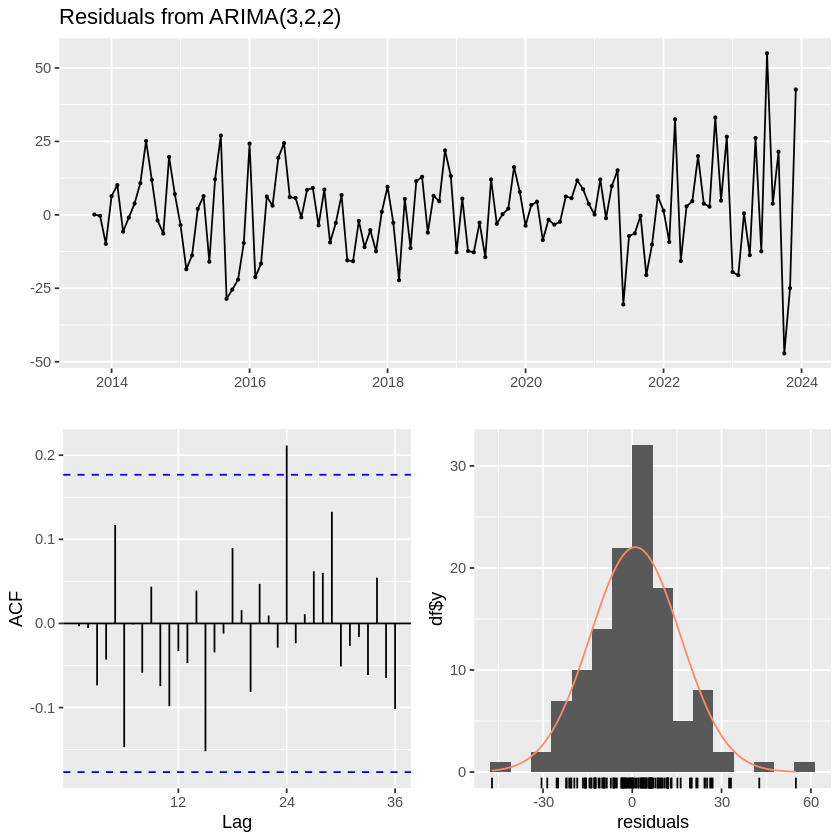

In [77]:
checkresiduals(auto.a)

In [78]:
Box.test(residuals(auto.a), lag=36,fitdf=2, type="Ljung")


	Box-Ljung test

data:  residuals(auto.a)
X-squared = 30.628, df = 34, p-value = 0.6337


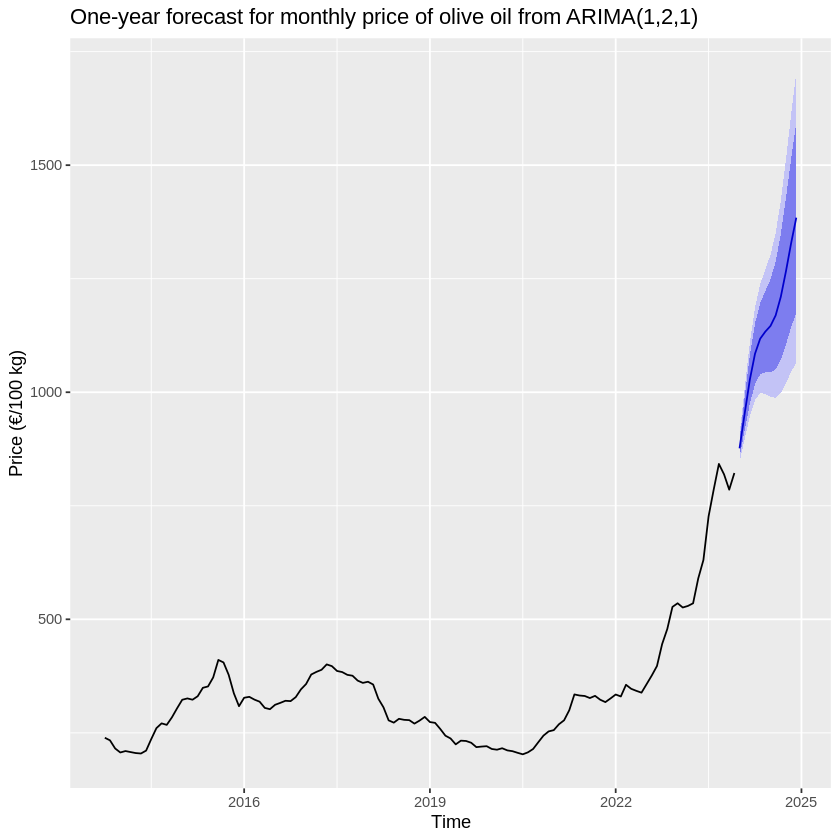

In [79]:
autoplot(forecast(auto.a, h = 12), xlab = "Time", ylab = "Price (€/100 kg)", main = "One-year forecast for monthly price of olive oil from ARIMA(1,2,1)")

In [80]:
summary(auto.ar)

Series: monthly_ts 
ARIMA(3,2,2) 

Coefficients:
         ar1      ar2      ar3      ma1     ma2
      1.0820  -0.4527  -0.2682  -1.5334  0.7609
s.e.  0.1428   0.1523   0.1118   0.1236  0.1253

sigma^2 = 242.9:  log likelihood = -502.55
AIC=1017.1   AICc=1017.83   BIC=1033.87

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 1.035645 15.13558 11.40594 0.3633708 3.298093 0.1233493
                     ACF1
Training set -0.003303788


	Box-Ljung test

data:  residuals(fit)
X-squared = 26.759, df = 24, p-value = 0.3158


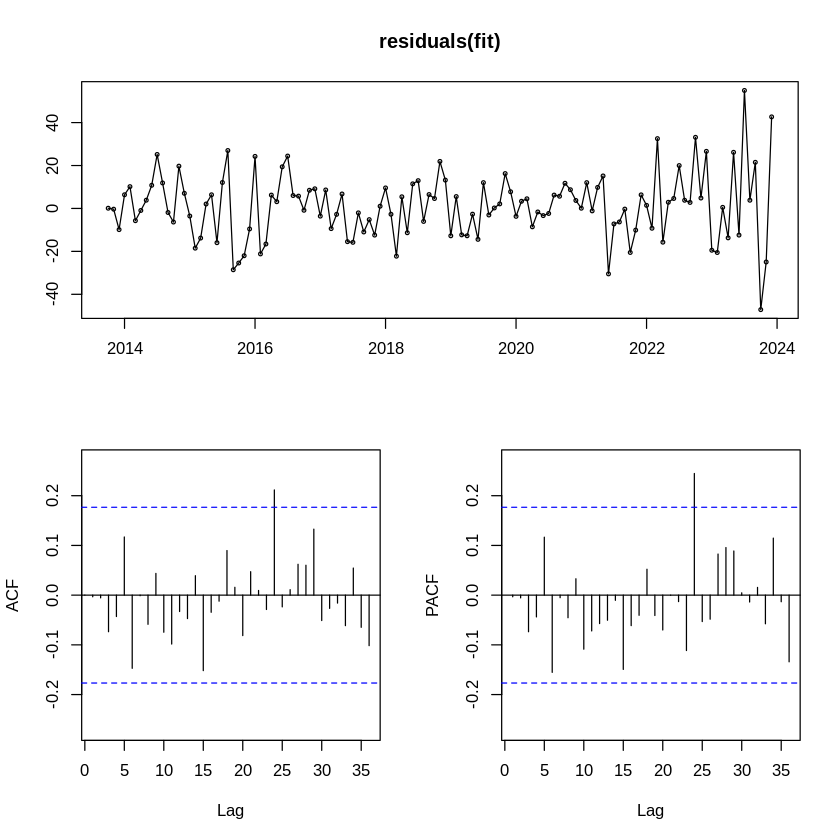

In [81]:
fit <- auto.ar

##Check residuals
tsdisplay(residuals(fit))
Box.test(residuals(fit), lag=30,fitdf=6, type="Ljung")

In [82]:
durbinWatsonTestTimeSeries <- function(residuals_ts) {
  # Calcola il numeratore e il denominatore del test di Durbin-Watson
  numerator <- sum(diff(residuals_ts)^2)
  denominator <- sum(residuals_ts^2)

  # Calcola la statistica di Durbin-Watson
  dw_statistic <- numerator / denominator

  # Restituisci la statistica di Durbin-Watson
  return(dw_statistic)
}


dw_result <- durbinWatsonTestTimeSeries(residuals(fit))
print(dw_result)

[1] 1.93566


ME       RMSE     MAE      MPE       MAPE     MASE     ACF1      
Training set 0.633861 12.29392 9.226041 0.2556359 2.989028 0.134979 0.01792273

ME       RMSE     MAE      MPE       MAPE     MASE ACF1     
Training set 4.288308 35.01973 25.06431 0.8473444 3.477615 NaN  0.0121363

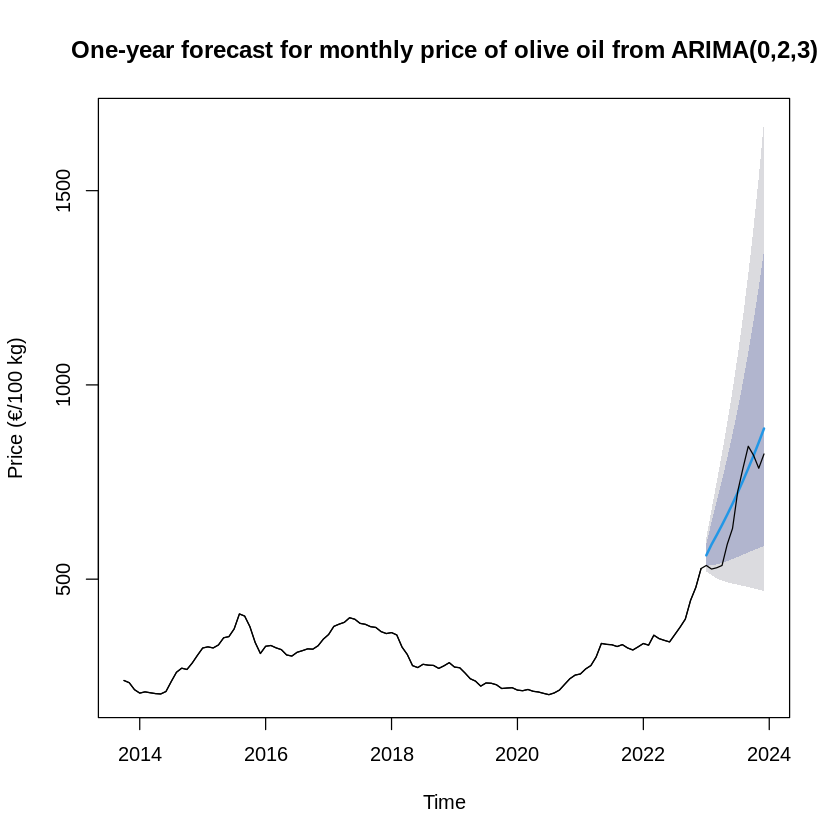

In [83]:
# Fit model to first few years
m.model <- Arima(window(monthly_ts,end=2022+11/12),order=c(0,2,3),
                   seasonal=list(order=c(0,0,0),period=12),lambda=0)
plot(forecast(m.model,h=12), xlab = "Time", ylab = "Price (€/100 kg)", main = "One-year forecast for monthly price of olive oil from ARIMA(0,2,3)")
lines(monthly_ts)

# Apply fitted model to later data
m.model2 <- Arima(window(monthly_ts,start=2023),model=m.model)

# in-sample one-step forecasts
accuracy(m.model)
# out-of-sample one-step forecasts
accuracy(m.model2)

# Exponential Smoothing

In [84]:
# Exponential Smoothing
fit1<- ses(monthly_ts, alpha=0.2, initial="simple", h=5)
fit2<- ses(monthly_ts, alpha=0.6, initial="simple", h=5)
fit3<- ses(monthly_ts, h=5)

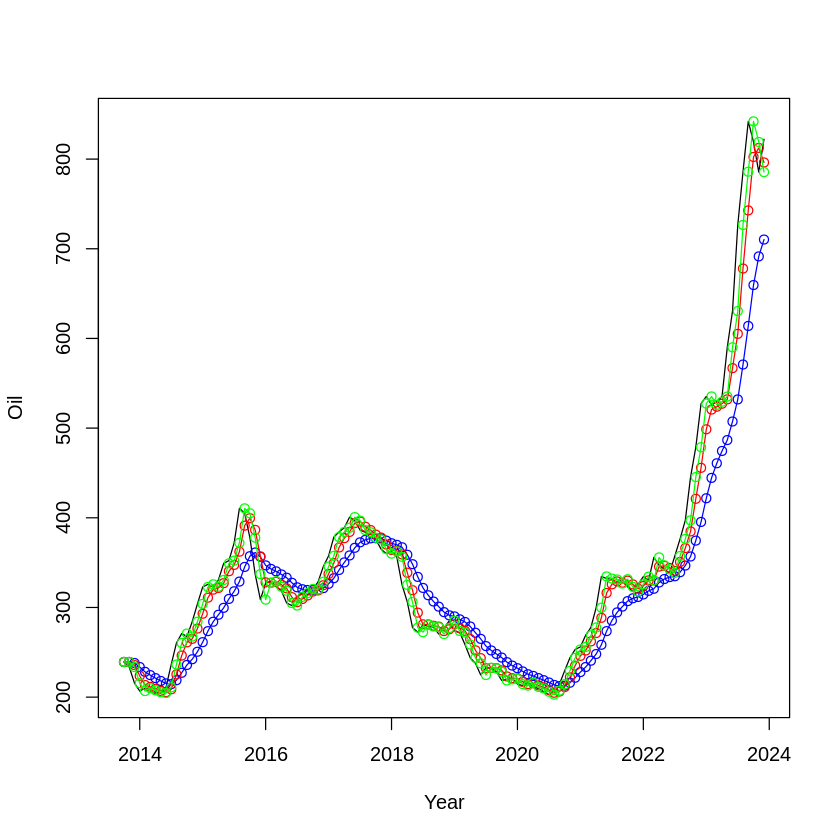

In [85]:
plot(monthly_ts, ylab="Oil", xlab="Year")
lines(fitted(fit1), col="blue", type="o")
lines(fitted(fit2), col="red", type="o")
lines(fitted(fit3), col="green", type="o")

In [86]:
fc<- ses(monthly_ts, h=12)
round(accuracy(fc), 2)

summary(fc)

ME   RMSE  MAE  MPE  MAPE MASE ACF1
Training set 4.74 19.84 13.2 0.89 3.59 0.14 0.54


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = monthly_ts, h = 12) 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 239.2513 

  sigma:  20.0011

     AIC     AICc      BIC 
1332.846 1333.048 1341.283 

Error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 4.739689 19.83783 13.19945 0.8918953 3.588147 0.1427451 0.5449325

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2024       822.1747 796.5422 847.8071 782.9732 861.3761
Feb 2024       822.1747 785.9267 858.4226 766.7382 877.6111
Mar 2024       822.1747 777.7809 866.5684 754.2803 890.0690
Apr 2024       822.1747 770.9136 873.4357 743.7776 900.5717
May 2024       822.1747 764.8633 879.4860 734.5246 909.8248
Jun 2024       822.1747 759.3935 884.9559 726.1591 918.1902
Jul 2024       822.1747 754.3634 889.9859 718.4663 925.8831
Aug 2024       822.1747 749.6815 894.6678

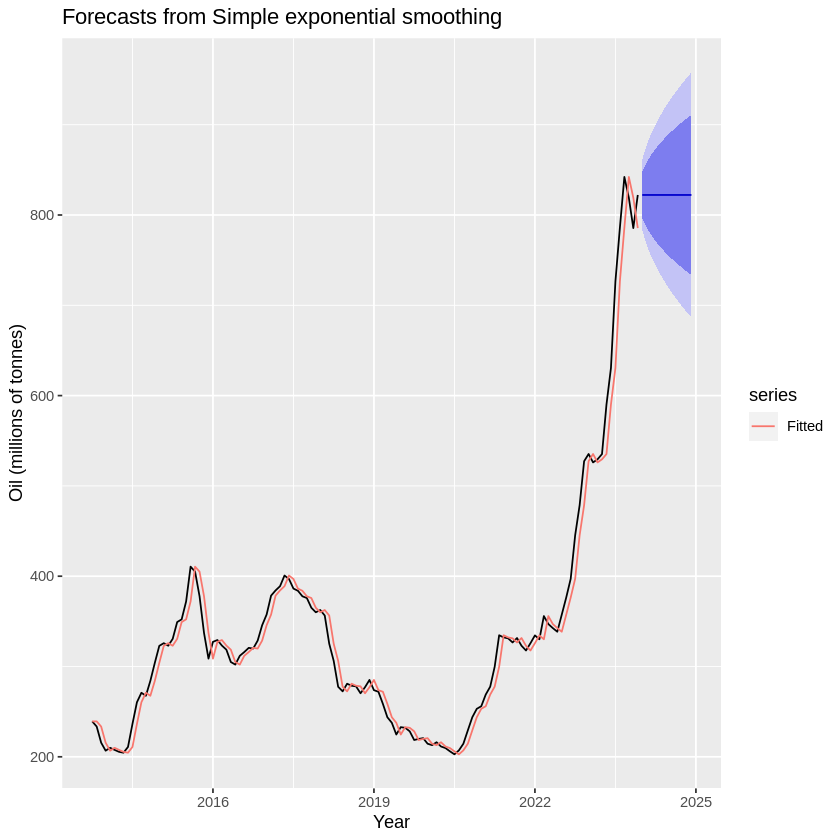

In [87]:
autoplot(fc)+
autolayer(fitted(fc), series="Fitted")+ylab("Oil (millions of tonnes)")+xlab("Year")

Holt

In [88]:
mo<- window(monthly_ts, start=2012)
fc<- holt(mo, h=15)
fc2<- holt(mo, damped=T, phi=0.9, h=15)

Warning message in window.default(x, ...):
“'start' value not changed”


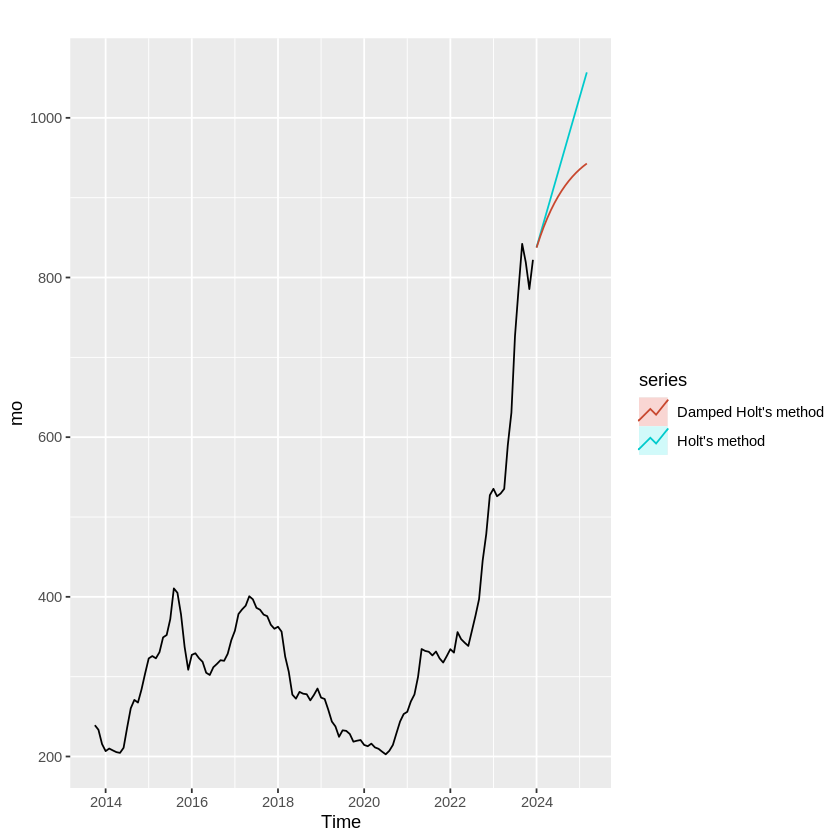

In [89]:
autoplot(mo)+
autolayer(fc, series="Holt's method", PI=F)+
autolayer(fc2, series="Damped Holt's method", PI=F)

Holt-Winter

In [90]:
fit1<- hw(mo, seasonal="additive")
fit2<- hw(mo, seasonal="multiplicative")

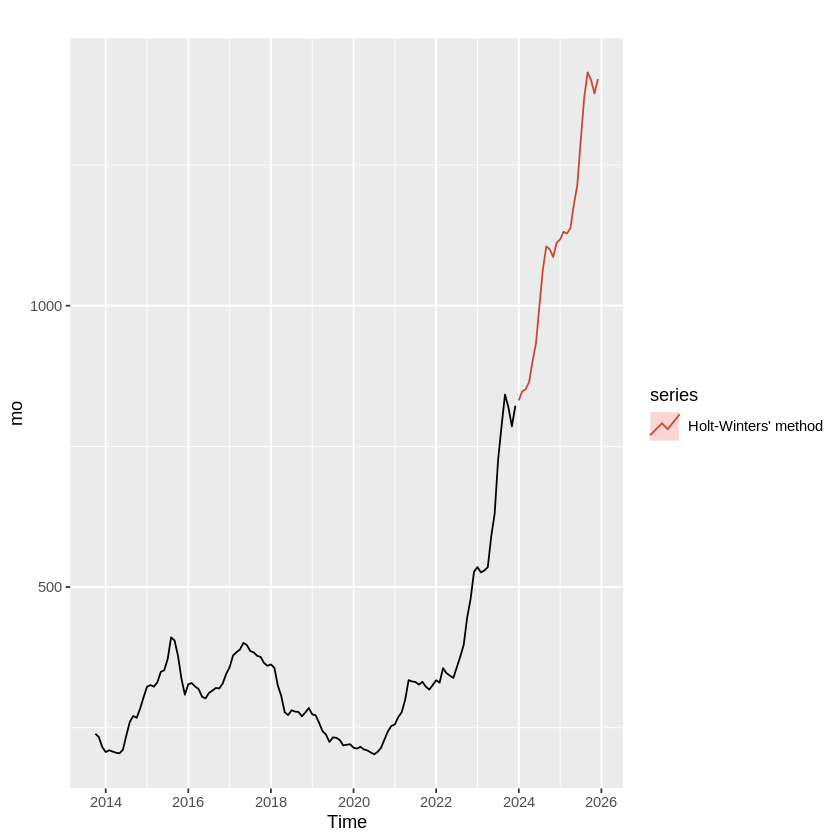

In [91]:
autoplot(mo)+
autolayer(fit2, series="Holt-Winters' method", PI=F)

# Gradient Boosting

### Data

In [92]:
colnames(combined_data)[1] <- "Price"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  202.8   250.9   320.3   327.4   358.1   842.1 

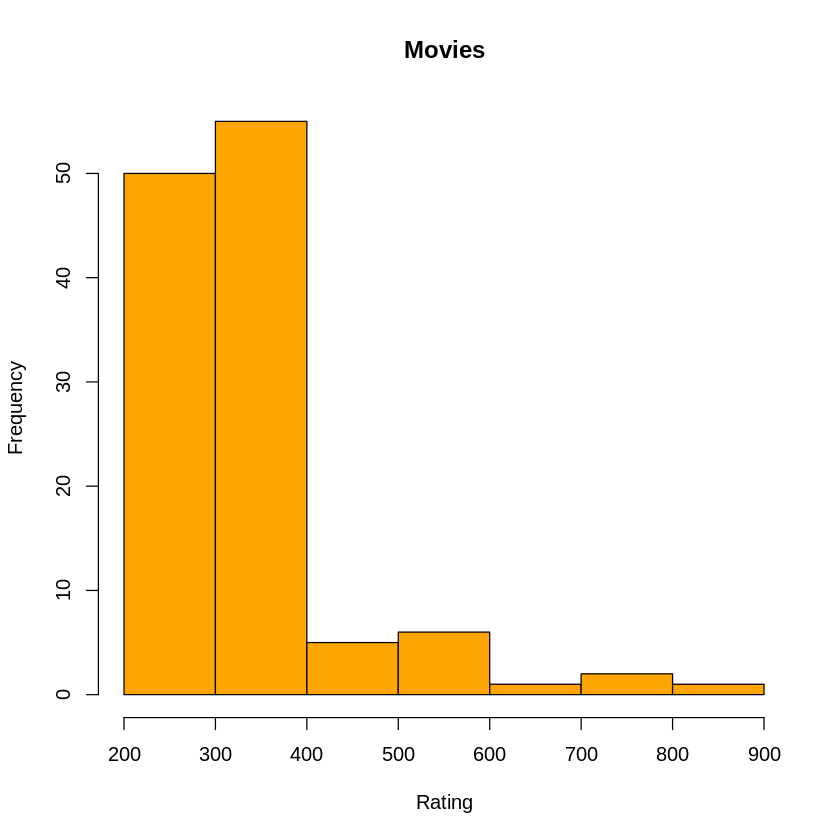

In [93]:
# Response variable
summary(combined_data$Price)
#boxplot(data$vote_average, col="orange", ylim=c(0,10), main="Movies", ylab="Rating")

hist(combined_data$Price, col="orange", main="Movies", xlab="Rating")

In [94]:
#explanatory variables
summary(combined_data)

     Price         Inflation        Production         Export     
 Min.   :202.8   Min.   :-1.500   Min.   : 665.8   Min.   :17685  
 1st Qu.:250.9   1st Qu.:-0.300   1st Qu.:1125.3   1st Qu.:25991  
 Median :320.3   Median : 0.900   Median :1337.8   Median :30311  
 Mean   :327.4   Mean   : 1.678   Mean   :1301.9   Mean   :31280  
 3rd Qu.:358.1   3rd Qu.: 2.300   3rd Qu.:1491.5   3rd Qu.:35963  
 Max.   :842.1   Max.   :10.700   Max.   :1789.9   Max.   :51700  
    Imports         
 Min.   :    6.042  
 1st Qu.: 3560.864  
 Median : 6283.417  
 Mean   : 6854.412  
 3rd Qu.: 9611.105  
 Max.   :23915.753  

In [95]:
# summary(combined_data[,c(1,2,5,6)])
# par(mfrow=c(3,3))
# for(i in c(1,2,3,5,6)){
#   hist(combined_data[,i], col="orange", main=paste(colnames(combined_data)[i]), xlab="")
# }

In [96]:
# #transform quantitative variables in log scale
# combined_data$Inflation <- log(combined_data$Inflation)
# combined_data$Production <- log(combined_data$Production)
# combined_data$Stock <- log(combined_data$Stock)

# summary(combined_data[,c(1,2,5,6)])

In [97]:
# par(mfrow=c(3,1))
# for(i in c(1,2,5,6)){
#   hist(combined_data[,i], col="orange", main=paste(colnames(combined_data)[i]), xlab="")
# }
# #go back to orginal panel
# par(mfrow=c(1,1))

In [98]:
# #transform release_date in numeric
# data$release_date<-as.numeric(data$release_date)
# summary(data$release_date)

In [99]:
# Set train and test
set.seed(1)
train = sample (1:nrow(combined_data), 0.7*nrow(combined_data))
combined_data.train=combined_data[train ,]
combined_data.test=combined_data[-train ,]

In [100]:
# # make some variables factor
# combined_data.train[,c(3,7, 10:24)]= lapply(combined_data.train[,c(3,7, 10:24)],factor)
# combined_data.test[,c(3,7, 10:24)]= lapply(combined_data.test[,c(3,7, 10:24)],factor)

In [101]:
str(combined_data.train)

'data.frame':	84 obs. of  5 variables:
 $ Price     : num  238 346 239 312 253 ...
 $ Inflation : num  1.6 0.5 0.5 -0.9 -0.8 2.1 -0.2 -0.3 2.3 1.8 ...
 $ Production: num  1790 1287 1776 1398 1389 ...
 $ Export    : num  34450 23993 25027 28054 37778 ...
 $ Imports   : num  6042 6808 6066 2215 9823 ...


### Hyperparameter tuning

In [102]:
# create hyperparameter grid
hyper_grid <- expand.grid(
  shrinkage = c(.01, .1, .2, .3, .4, .001),
  interaction.depth = c(2, 3, 4, 5, 15, 20),
  n.minobsinnode = c(1,2, 5, 7, 10, 15),
  bag.fraction = c( .65, .8, 1, 2),
  optimal_trees = 0,               # a place to dump results
  min_RMSE = 0                     # a place to dump results
)

# total number of combinations
nrow(hyper_grid)

[1] 864

In [103]:
# grid search
for(i in 1:nrow(hyper_grid)) {

  # reproducibility
  set.seed(123)

  # train model
  boost.oil <- gbm(
    formula = Price ~ .,
    distribution = "gaussian",
    data = combined_data.train,
    n.trees = 5000,
    interaction.depth = hyper_grid$interaction.depth[i],
    shrinkage = hyper_grid$shrinkage[i],
    n.minobsinnode = hyper_grid$n.minobsinnode[i],
    bag.fraction = hyper_grid$bag.fraction[i],
    train.fraction = .75,
    n.cores = NULL, # will use all cores by default
    verbose = FALSE
  )

  # add min training error and trees to grid
  hyper_grid$optimal_trees[i] <- which.min(boost.oil$valid.error)
  hyper_grid$min_RMSE[i] <- sqrt(min(boost.oil$valid.error))
}

In [104]:
# Ordina il dataframe in base alla colonna min_RMSE e seleziona le prime 10 righe
top_10_results <- head(arrange(hyper_grid, min_RMSE), 10)

# Visualizza i risultati
print(top_10_results)

   shrinkage interaction.depth n.minobsinnode bag.fraction optimal_trees
1        0.1                 5              1         0.65            31
2        0.4                15              1         0.65             4
3        0.1                 5              1         0.80            24
4        0.1                15              1         0.65            17
5        0.4                20              1         0.65             5
6        0.3                 2              1         0.65            19
7        0.1                 4              1         0.80            25
8        0.2                20              1         1.00            11
9        0.2                20              1         2.00            11
10       0.1                20              1         0.65            17
   min_RMSE
1  34.05626
2  34.43800
3  35.34448
4  35.53520
5  35.57010
6  35.74959
7  35.81433
8  35.86989
9  35.86989
10 35.93462


### Training

In [105]:
# reproducibility
set.seed(123)

# train model
boost.oil <- gbm(
  formula = Price ~ .,
  distribution = "gaussian",
  data = combined_data.train,
  n.trees = 2000,
  interaction.depth = 4,
  shrinkage = 0.1,
  n.minobsinnode = 5,
  bag.fraction = 0.65,
  train.fraction = 1,
  n.cores = NULL, # will use all cores by default
  verbose = FALSE
)

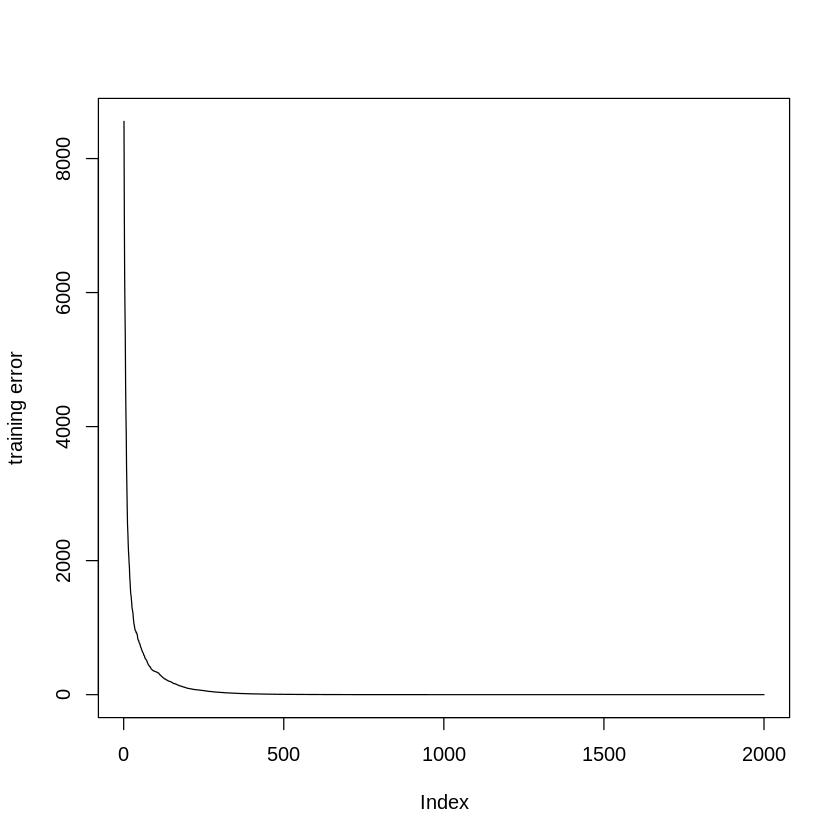

In [106]:
#for the plot
par(mfrow=c(1,1))

#plot of training error
plot(boost.oil$train.error, type="l", ylab="training error")

var        rel.inf  
Production Production 54.847277
Inflation  Inflation  20.429938
Export     Export     18.455572
Imports    Imports     6.267213

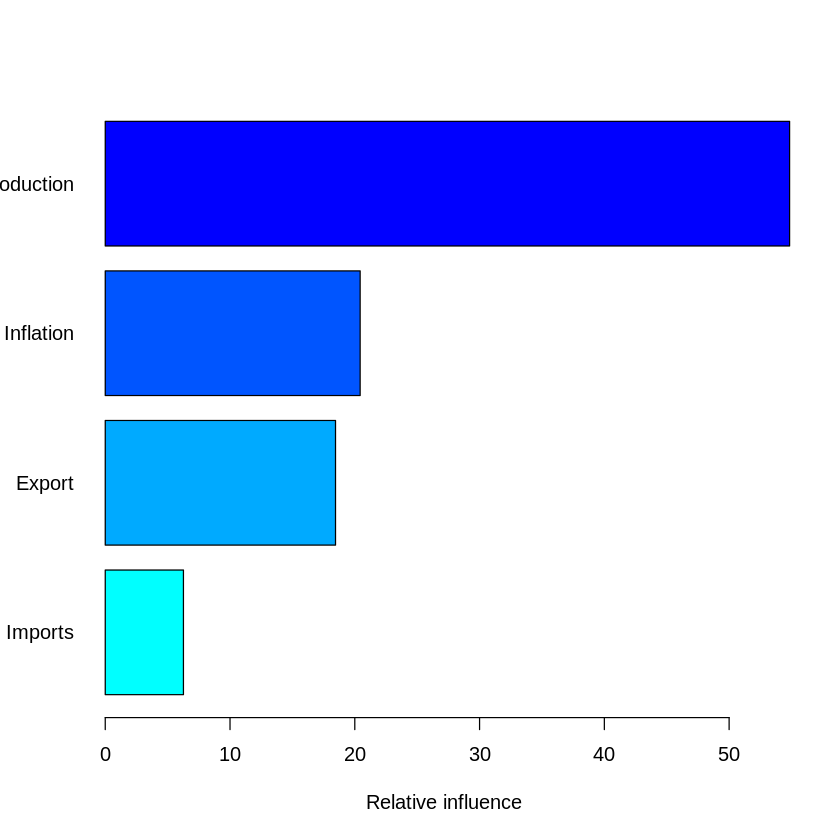

In [107]:
#relative influence plot
summary(boost.oil, las=1, cBar=8)

### Results

In [108]:
# test set prediction for every iteration (1:5000)
yhat.boost=predict(boost.oil, newdata=combined_data.test, n.trees=1:2000)

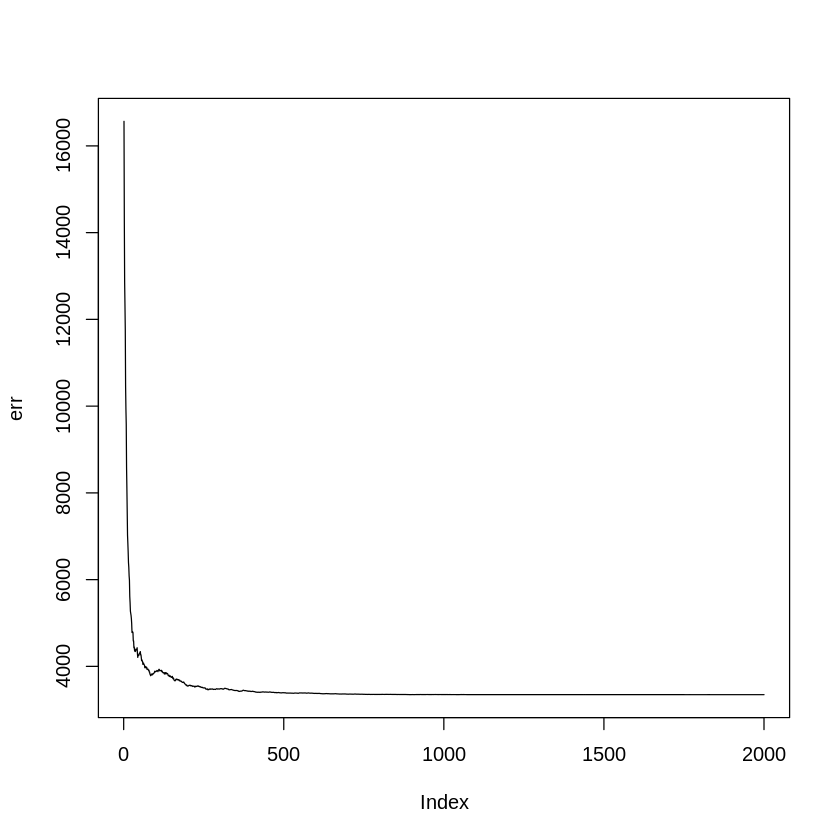

In [109]:
# calculate the error for each iteration
#use 'apply' to perform a 'cycle for'
# the first element is the matrix we want to use, 2 means 'by column',
#and the third element indicates the function we want to calculate

err = apply(yhat.boost, 2, function(pred) mean((combined_data.test$Price - pred)^2))

plot(err, type="l")

[1] 3347.849

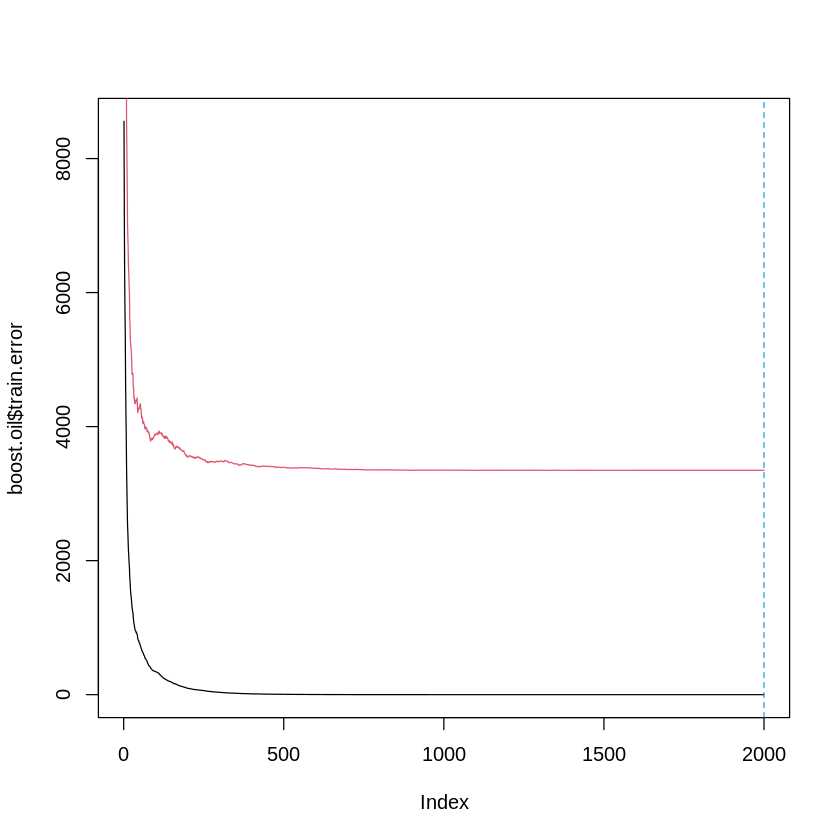

In [110]:
# error comparison (train e test)
plot(boost.oil$train.error, type="l")
lines(err, type="l", col=2)

#minimum error in test set
best=which.min(err)
abline(v=best, lty=2, col=4)

min(err) #minimum error

In [111]:
# Comparing the model
dev.gbm<- (sum((yhat.boost[,best]-combined_data.test$Price)^2))
dev.gbm
# dev.gam
# dev.lm

[1] 120522.6

gbm(formula = Price ~ ., distribution = "gaussian", data = combined_data.train, 
    n.trees = 2000, interaction.depth = 4, n.minobsinnode = 5, 
    shrinkage = 0.1, bag.fraction = 0.65, train.fraction = 1, 
    verbose = FALSE, n.cores = NULL)
A gradient boosted model with gaussian loss function.
2000 iterations were performed.
There were 4 predictors of which 4 had non-zero influence.

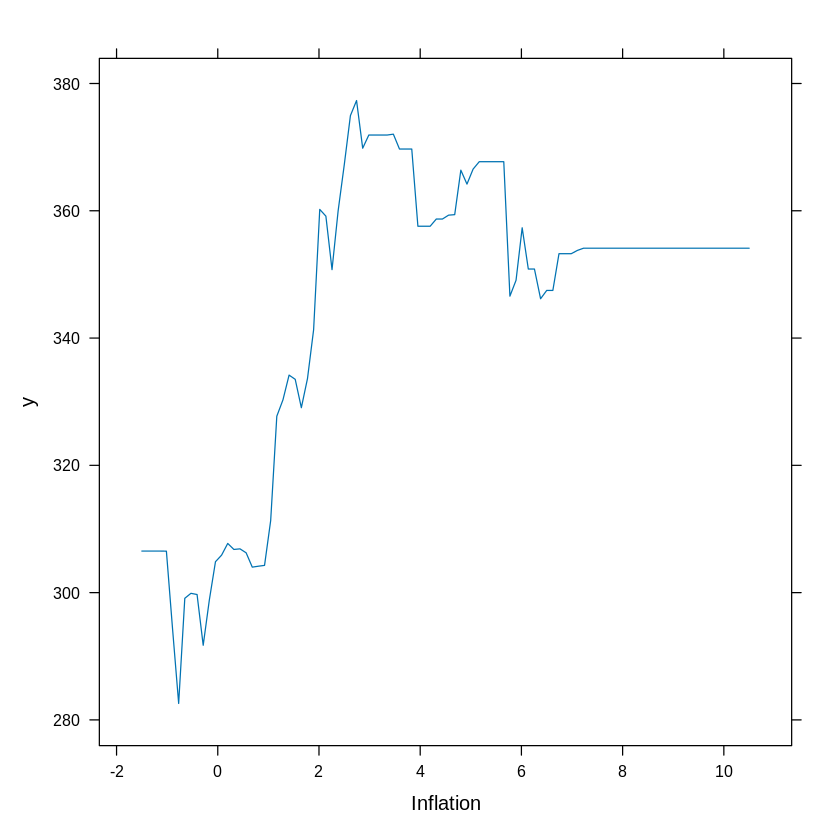

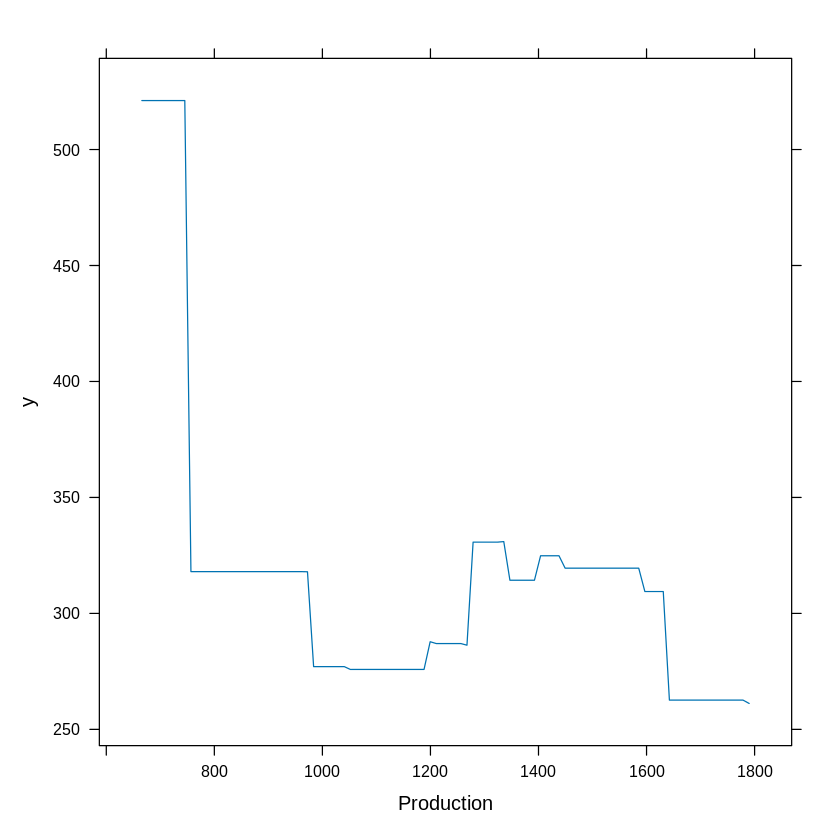

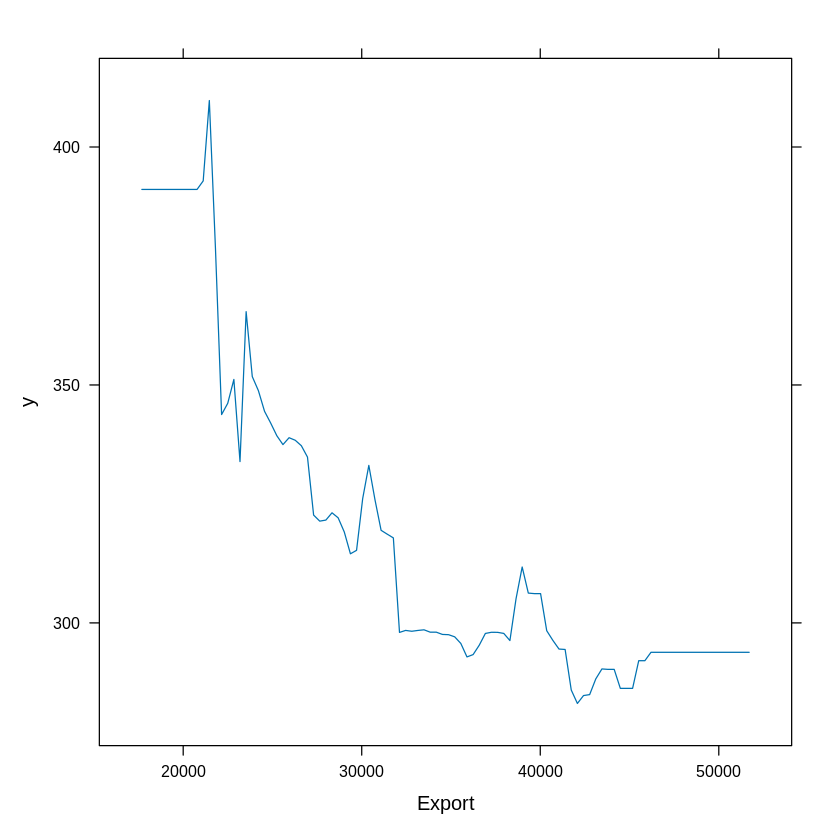

In [112]:
boost.oil
# partial dependence plots
plot(boost.oil, i.var=1, n.trees = best)
plot(boost.oil, i.var=2, n.trees = best)
plot(boost.oil, i.var=3, n.trees = best)
#plot(boost.oil, i.var=7, n.trees = best)

In [113]:
#plot(boost.oil, i.var=c(2,7), n.trees = best) #bivariate (library(viridis) may be necessary)

In [114]:
monthly_ts

Jan      Feb      Mar      Apr      May      Jun      Jul      Aug     
2013                                                                        
2014 206.7748 209.9646 207.6734 205.4914 204.5412 210.9054 236.3946 260.4204
2015 322.8689 325.8221 323.0178 330.6593 349.2110 352.2080 372.0511 410.5674
2016 327.3158 329.3148 323.1769 318.6403 304.9472 302.1268 311.8450 316.0032
2017 357.5192 378.5029 384.2371 388.9276 400.7384 396.9032 386.2812 383.8599
2018 362.5448 356.4360 325.2282 306.2229 277.5177 272.4863 280.9422 278.6943
2019 273.7804 272.0430 258.6317 243.8068 237.6697 224.6821 232.8216 232.1251
2020 214.4880 212.9094 216.1258 211.4166 209.6566 206.0473 202.7522 207.1297
2021 255.9972 268.9425 277.6863 299.7367 334.6228 332.2314 331.2008 326.6415
2022 334.4418 330.1524 355.8378 347.0250 342.5226 338.5267 357.4315 376.4337
2023 535.3333 526.0208 529.4516 535.2778 590.1398 630.5917 726.5457 785.9839
     Sep      Oct      Nov      Dec     
2013          239.2256 233.5117 215.6319
2014 270.9074 267.5895 284.1029 304.0380
2015 405.0469 377.8158 337.2299 308.7229
2016 320.6419 319.8794 328.6993 345.7099
2017 377.7544 375.8137 365.0686 360.0296
2018 278.0146 270.3498 277.0479 285.1386
2019 228.2097 218.5912 219.8036 220.6543
2020 214.5151 229.3472 243.8786 253.1803
2021 331.5152 322.9737 317.7287 325.8022
2022 397.2017 445.4420 478.7389 527.3495
2023 842.1250 819.1371 785.5250 822.1783

In [115]:
ts(combined_data[c(1)], start=c(2013,10),end=c(2023,9),frequency=12)

Jan      Feb      Mar      Apr      May      Jun      Jul      Aug     
2013                                                                        
2014 206.7748 209.9646 207.6734 205.4914 204.5412 210.9054 236.3946 260.4204
2015 322.8689 325.8221 323.0178 330.6593 349.2110 352.2080 372.0511 410.5674
2016 327.3158 329.3148 323.1769 318.6403 304.9472 302.1268 311.8450 316.0032
2017 357.5192 378.5029 384.2371 388.9276 400.7384 396.9032 386.2812 383.8599
2018 362.5448 356.4360 325.2282 306.2229 277.5177 272.4863 280.9422 278.6943
2019 273.7804 272.0430 258.6317 243.8068 237.6697 224.6821 232.8216 232.1251
2020 214.4880 212.9094 216.1258 211.4166 209.6566 206.0473 202.7522 207.1297
2021 255.9972 268.9425 277.6863 299.7367 334.6228 332.2314 331.2008 326.6415
2022 334.4418 330.1524 355.8378 347.0250 342.5226 338.5267 357.4315 376.4337
2023 535.3333 526.0208 529.4516 535.2778 590.1398 630.5917 726.5457 785.9839
     Sep      Oct      Nov      Dec     
2013          239.2256 233.5117 215.6319
2014 270.9074 267.5895 284.1029 304.0380
2015 405.0469 377.8158 337.2299 308.7229
2016 320.6419 319.8794 328.6993 345.7099
2017 377.7544 375.8137 365.0686 360.0296
2018 278.0146 270.3498 277.0479 285.1386
2019 228.2097 218.5912 219.8036 220.6543
2020 214.5151 229.3472 243.8786 253.1803
2021 331.5152 322.9737 317.7287 325.8022
2022 397.2017 445.4420 478.7389 527.3495
2023 842.1250

Using 2000 trees...




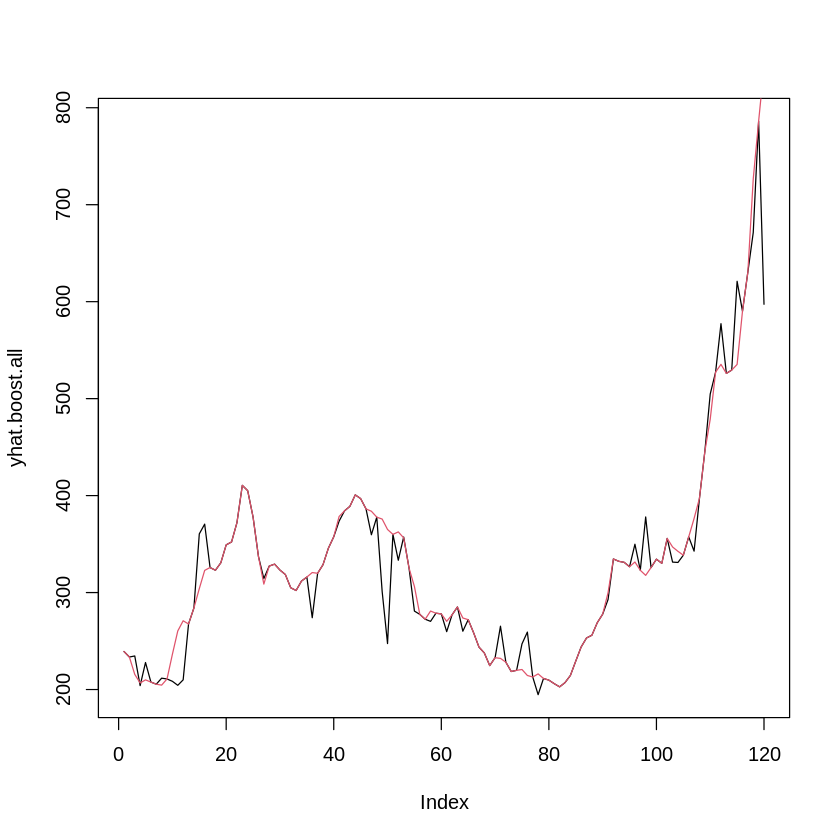

In [116]:
yhat.boost.all=predict(boost.oil, newdata=combined_data[,-1])

plot(yhat.boost.all, type="l")
lines(combined_data$Price, type="l", col=2)

dev.gbm.final <- (sum((yhat.boost.all-combined_data$Price)^2))

In [117]:
y_hat_ts <- ts(yhat.boost.all, start=c(2013,10),end=c(2023,9),frequency=12)
monthly_ts

Jan      Feb      Mar      Apr      May      Jun      Jul      Aug     
2013                                                                        
2014 206.7748 209.9646 207.6734 205.4914 204.5412 210.9054 236.3946 260.4204
2015 322.8689 325.8221 323.0178 330.6593 349.2110 352.2080 372.0511 410.5674
2016 327.3158 329.3148 323.1769 318.6403 304.9472 302.1268 311.8450 316.0032
2017 357.5192 378.5029 384.2371 388.9276 400.7384 396.9032 386.2812 383.8599
2018 362.5448 356.4360 325.2282 306.2229 277.5177 272.4863 280.9422 278.6943
2019 273.7804 272.0430 258.6317 243.8068 237.6697 224.6821 232.8216 232.1251
2020 214.4880 212.9094 216.1258 211.4166 209.6566 206.0473 202.7522 207.1297
2021 255.9972 268.9425 277.6863 299.7367 334.6228 332.2314 331.2008 326.6415
2022 334.4418 330.1524 355.8378 347.0250 342.5226 338.5267 357.4315 376.4337
2023 535.3333 526.0208 529.4516 535.2778 590.1398 630.5917 726.5457 785.9839
     Sep      Oct      Nov      Dec     
2013          239.2256 233.5117 215.6319
2014 270.9074 267.5895 284.1029 304.0380
2015 405.0469 377.8158 337.2299 308.7229
2016 320.6419 319.8794 328.6993 345.7099
2017 377.7544 375.8137 365.0686 360.0296
2018 278.0146 270.3498 277.0479 285.1386
2019 228.2097 218.5912 219.8036 220.6543
2020 214.5151 229.3472 243.8786 253.1803
2021 331.5152 322.9737 317.7287 325.8022
2022 397.2017 445.4420 478.7389 527.3495
2023 842.1250 819.1371 785.5250 822.1783

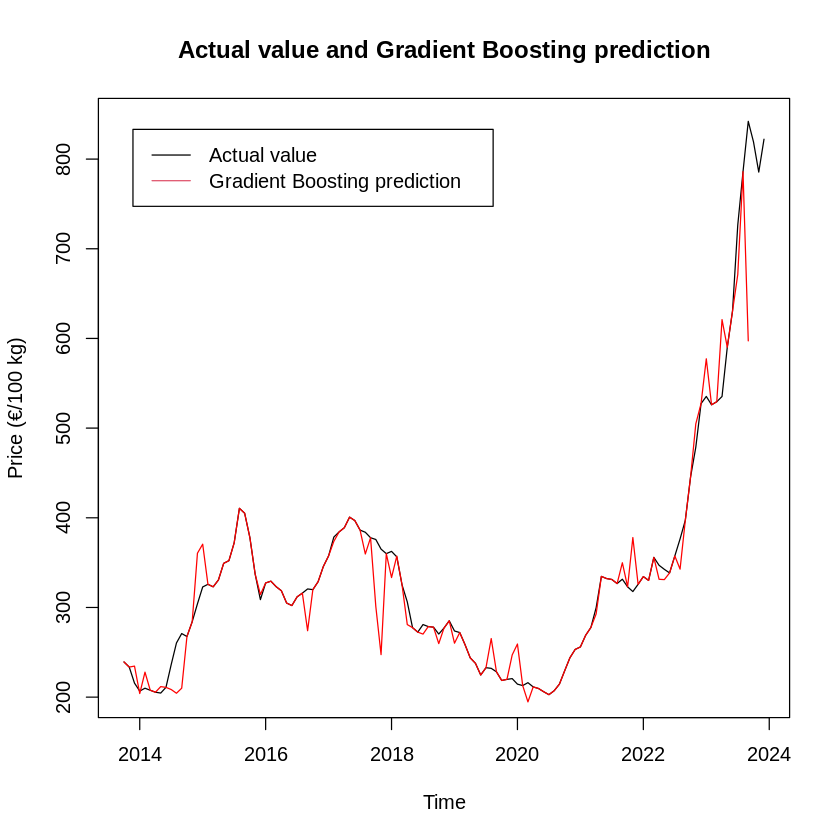

In [118]:
plot(monthly_ts, xlab = "Time", ylab = "Price (€/100 kg)", main = "Actual value and Gradient Boosting prediction")
lines(y_hat_ts, col = "red")
legend(x = "topleft",   # Position
       inset = 0.05,
       legend = c("Actual value", "Gradient Boosting prediction"),
       lty = c(1, 1),
       col = c(1, 2))

In [119]:
residuals <- (yhat.boost.all-combined_data$Price)
residuals_ts <- ts(residuals)
durbinWatsonTestTimeSeries(residuals_ts)

[1] 1.209116


	Ljung-Box test

data:  Residuals
Q* = 13.445, df = 10, p-value = 0.1998

Model df: 0.   Total lags used: 10



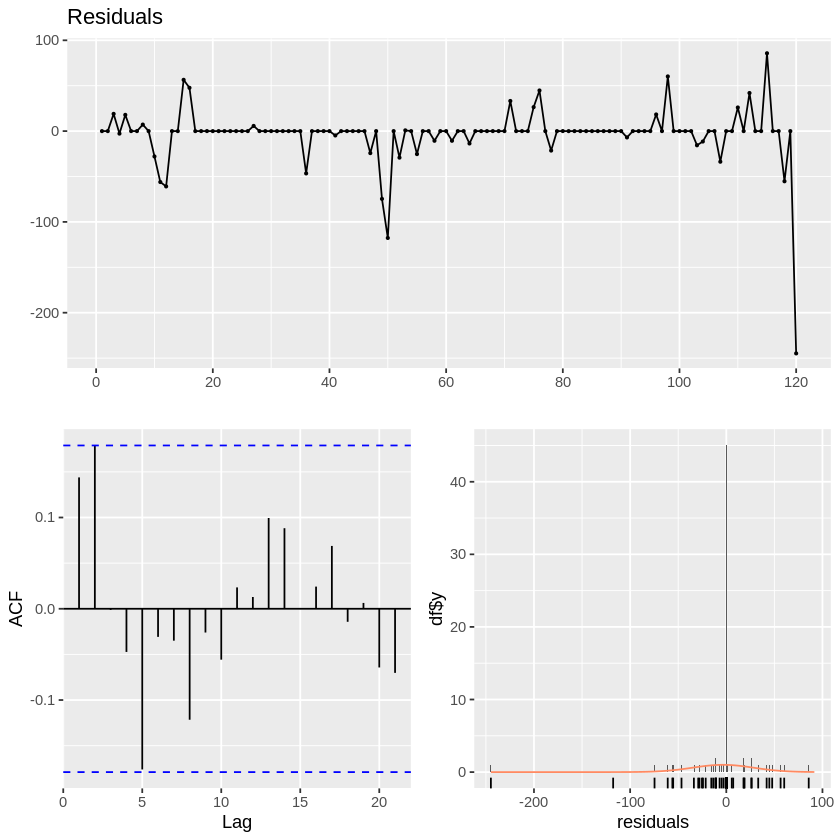

In [120]:
checkresiduals(residuals_ts)

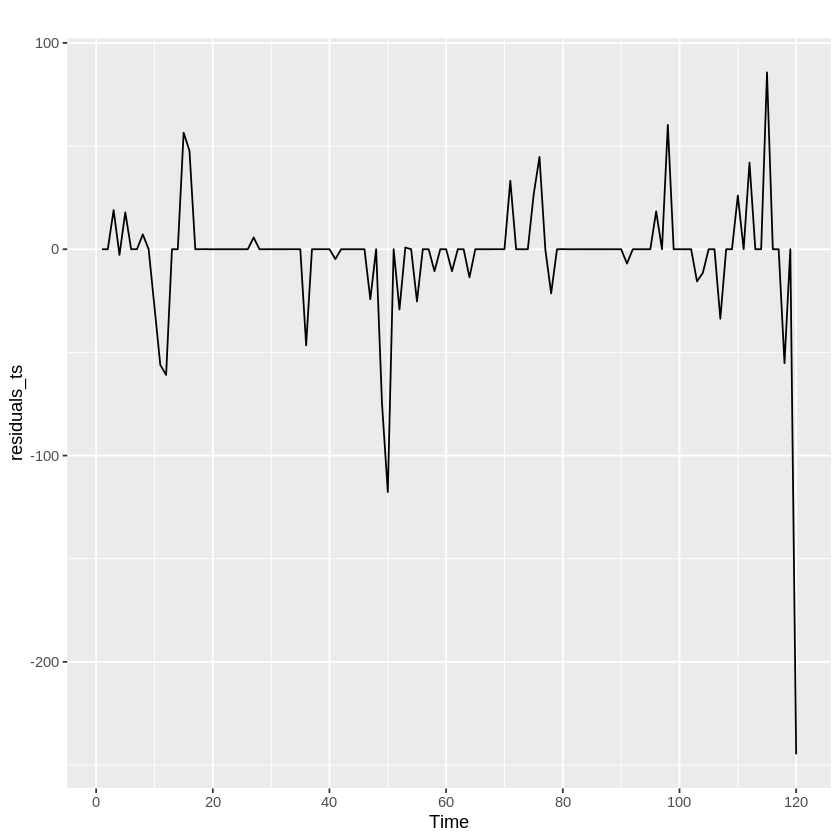

In [121]:
autoplot(residuals_ts)

In [122]:
RMSE <- sqrt(dev.gbm.final/length(yhat.boost.all))
RMSE

[1] 31.69156